# Context & Objective:

The dataset being used here has 7 years' historical loan data taken from [LendingClub](https://www.lendingclub.com/). By looking at the loan status, we can check if the loan was sanctioned to the customers or not. If the loan status is "charged off" or "default" or the issuance of loan got delayed by 31-120 days, it is a bad loan. We will analyze the characteristics of the customers whose loans belong to **"bad loan"** category and will build a **Probability of Default (PD) Model**, so that is can be used in future to predict the customer will default or not.

We have used some useful concepts:
- Binning,
- Weight of Evidence (WoE),
- Information Value (IV)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<Figure size 640x480 with 0 Axes>

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/data/loan_data_2007_2014.csv')

In [4]:

data['EAD'] = data['loan_amnt'] + data['total_rec_int'] + data['total_rec_late_fee'] + data['recoveries'] + data['collection_recovery_fee'] - data['out_prncp']


# Report generation for  Data Exploration & Business Interpretation

In [5]:
!pip install dtale


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.1 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=8ae

In [6]:
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=b48c8618e2cea3d1b6887b6a97b5e7a3d4aca0dc078d214a9af2ccedb3faca8c
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [7]:
pip install ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.8 MB/s eta 0:00:00


In [8]:
# check number of columns and data types of features
import dtale
import dtale.app as dtale_app
from pyngrok import ngrok
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
ngrok.set_auth_token("Type ur authentication token here ")

In [10]:



# Start dtale
#dtale_app.USE_NGROK = True
#dtale.show(data, port=4040)


# Assigning the Target Column to Identify Bad Loans

In [11]:
# create a new column based on the loan_status column that will be our target variable
data['bad_loan'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)
data.drop('Unnamed: 0', inplace=True, axis=1)

In [12]:
X = data.drop('bad_loan', axis = 1)
y = data['bad_loan']

In [13]:
# display some
data.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

   int_rate  installment grade sub_grade  ... open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...         NaN         NaN   
1     15.27        59.83     C        C4  ...         NaN         NaN   
2     15.96        84.33     C        C5  ...         NaN         NaN   
3     13.49       339.31     C        C1  ...         NaN         NaN   
4     12.69        67.79     B        B5  ...         NaN         NaN   
5      7.90       156.46     A        A4  ...         NaN         NaN   
6     15.96       170.08     C        C5  ...         NaN         NaN   
7     18.64       109.43     E        E1  ...         NaN         NaN   
8     21.28       152.39     F        F2  ...         NaN         NaN   
9     12.69       121.45     B        B5  ...         NaN         NaN   

  max_bal_bc  all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0        NaN       NaN              NaN    NaN         NaN          NaN   
1        NaN       NaN              NaN    NaN         NaN          NaN   
2        NaN       NaN              NaN    NaN         NaN          NaN   
3        NaN       NaN              NaN    NaN         NaN          NaN   
4        NaN       NaN              NaN    NaN         NaN          NaN   
5        NaN       NaN              NaN    NaN         NaN          NaN   
6        NaN       NaN              NaN    NaN         NaN          NaN   
7        NaN       NaN              NaN    NaN         NaN          NaN   
8        NaN       NaN              NaN    NaN         NaN          NaN   
9        NaN       NaN              NaN    NaN         NaN          NaN   

        EAD bad_loan  
0   5861.07        1  
1   3053.36        0  
2   3003.65        1  
3  12226.30        1  
4   3242.17        1  
5   5631.38        1  
6   8136.84        1  
7   3938.14        1  
8   6086.09        0  
9   6180.23        0  

[10 rows x 75 columns]

In [14]:
#cols that have > 70% missing values
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

# Data Preprocessing:

* We need to drop the columns having > 70% missing values.

* The follwing features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode and emp_title

* The sub_grade column wll also be droped as it contains the same information as the grade columns.

* Features that contain information about the future will not be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee

In [15]:
#dropping irrelevant cols & cols with missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
data.drop(columns=columns_to_drop, inplace=True, axis=1)

data.dropna(inplace=True)

# Checking Correlation among Features

<Axes: >

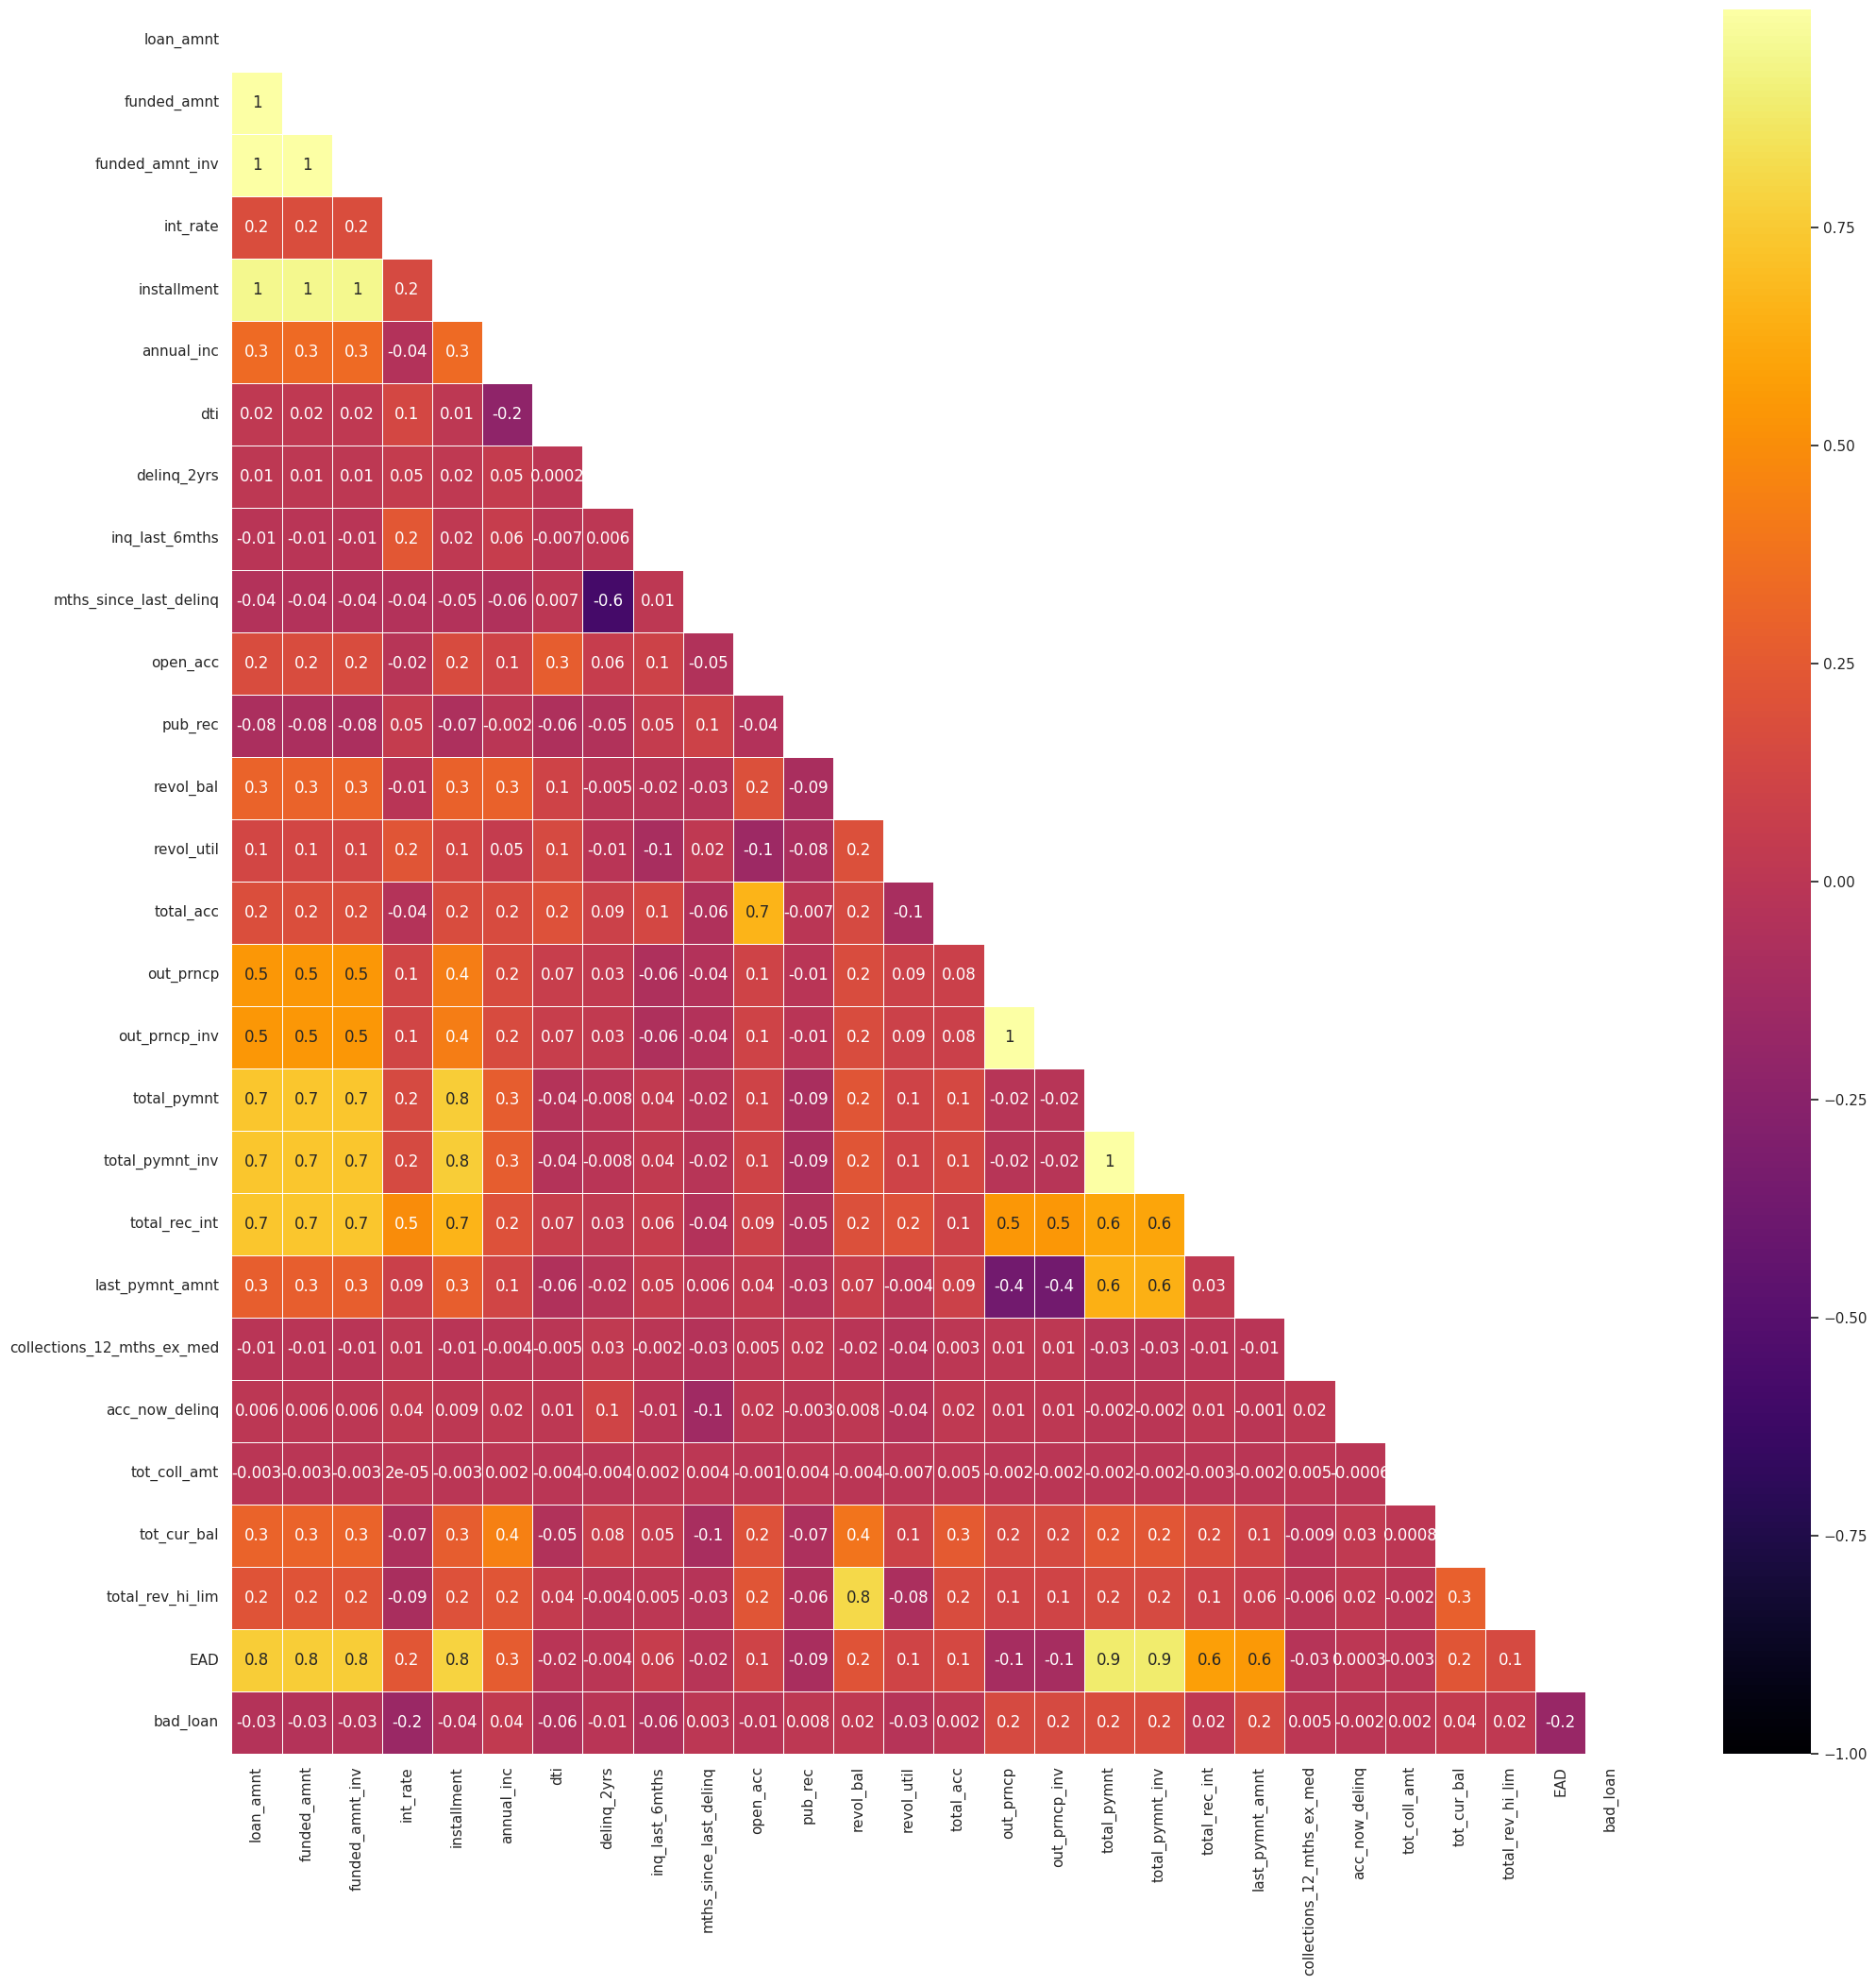

In [16]:
# correlation matrix with correlation co-effiecients
import numpy as np
mask = np.zeros_like(data.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

# Removing Multicolliear Features

In [17]:
 data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

<Axes: >

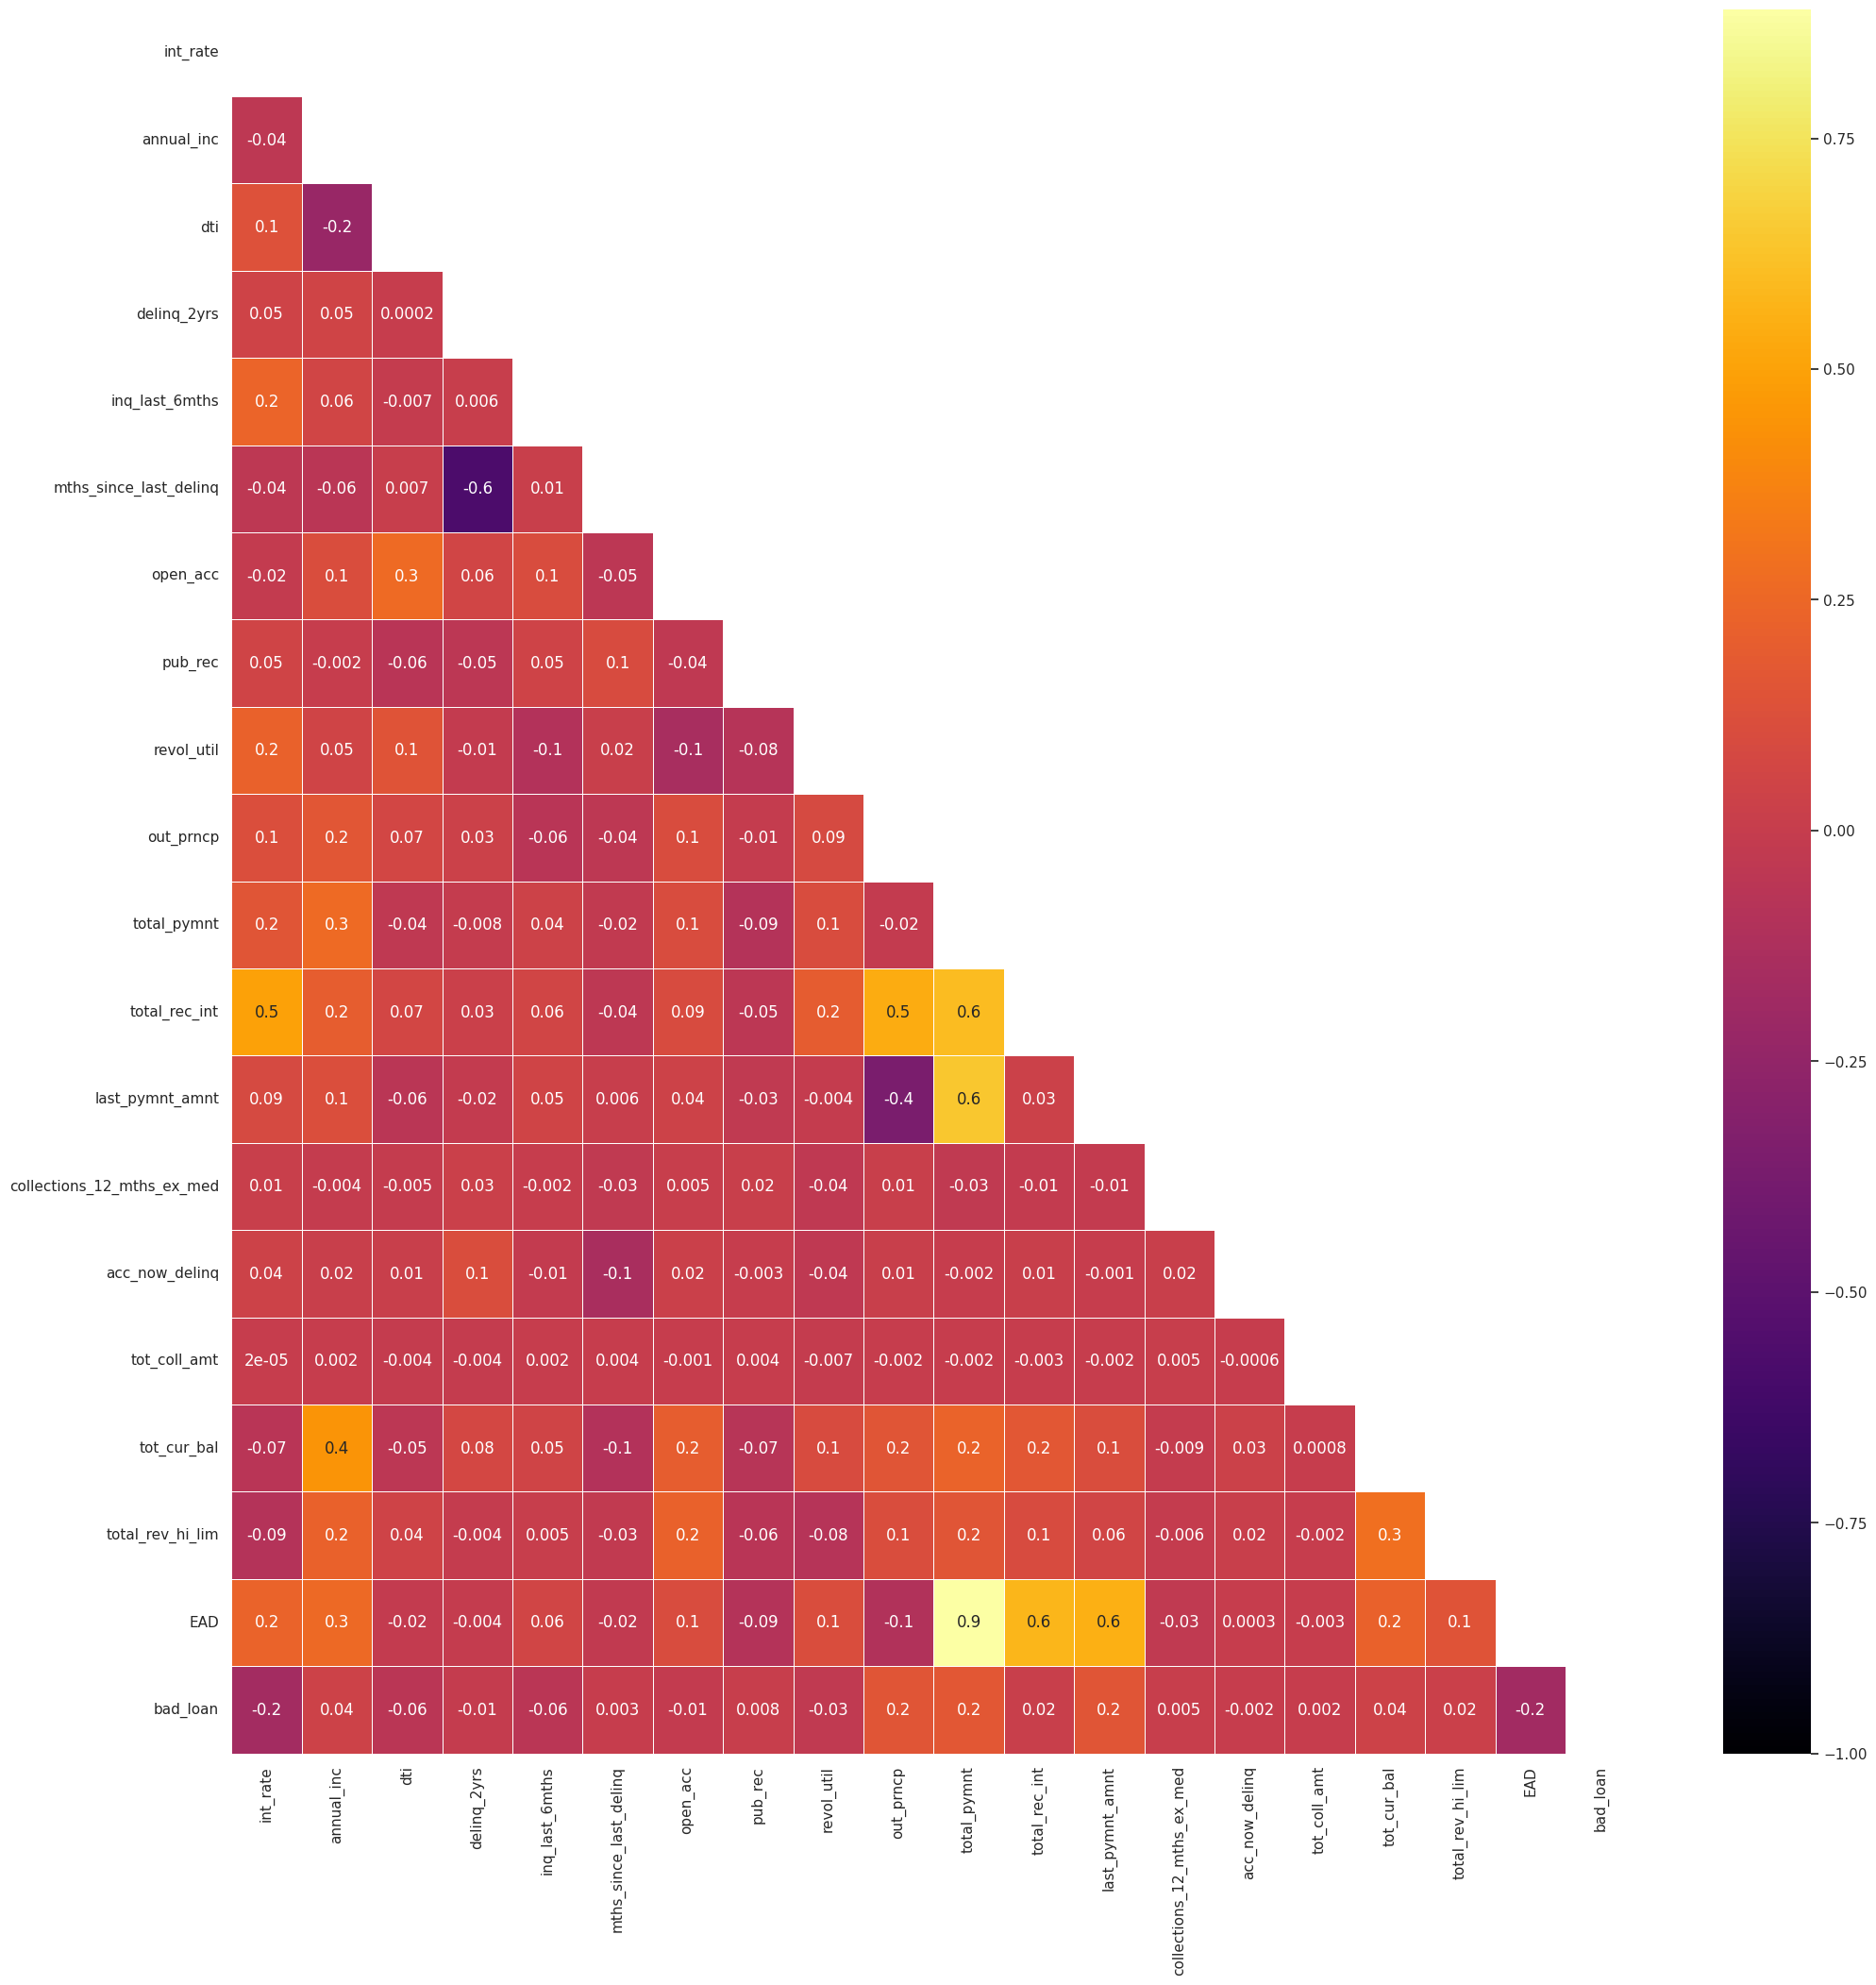

In [18]:
import numpy as np
mask = np.zeros_like(data.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [19]:
##descriptive statistics
data.describe()

int_rate    annual_inc            dti    delinq_2yrs  \
count  181686.000000  1.816860e+05  181686.000000  181686.000000   
mean       14.449868  7.886698e+04      17.389873       0.638040   
std         4.252272  6.078531e+04       7.787230       1.104461   
min         6.000000  4.000000e+03       0.000000       0.000000   
25%        11.670000  5.000000e+04      11.530000       0.000000   
50%        14.160000  6.800000e+04      16.910000       0.000000   
75%        17.140000  9.402825e+04      22.900000       1.000000   
max        26.060000  7.500000e+06      39.990000      29.000000   

       inq_last_6mths  mths_since_last_delinq       open_acc        pub_rec  \
count   181686.000000           181686.000000  181686.000000  181686.000000   
mean         0.822942               33.724167      11.756382       0.189244   
std          1.059299               21.716923       4.997763       0.557625   
min          0.000000                0.000000       1.000000       0.000000   
25%          0.000000               15.000000       8.000000       0.000000   
50%          0.000000               30.000000      11.000000       0.000000   
75%          1.000000               49.000000      14.000000       0.000000   
max          7.000000              188.000000      84.000000      21.000000   

          revol_util      out_prncp    total_pymnt  total_rec_int  \
count  181686.000000  181686.000000  181686.000000  181686.000000   
mean       56.548318    5291.496180   11215.608032    2679.857733   
std        22.583195    6660.857513    7986.951463    2470.226061   
min         0.000000       0.000000      35.690000       0.000000   
25%        40.300000       0.000000    5485.875000    1037.310000   
50%        57.400000    2637.215000    9127.115000    1925.520000   
75%        73.900000    8883.127500   14685.300000    3432.090000   
max       892.300000   31898.770000   56087.909920   21840.000000   

       last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  \
count    181686.000000               181686.000000   181686.000000   
mean       3146.519033                    0.016418        0.009808   
std        5633.250884                    0.149082        0.107319   
min           0.010000                    0.000000        0.000000   
25%         321.130000                    0.000000        0.000000   
50%         539.810000                    0.000000        0.000000   
75%        3048.777500                    0.000000        0.000000   
max       36170.140000                   20.000000        5.000000   

       tot_coll_amt   tot_cur_bal  total_rev_hi_lim            EAD  \
count  1.816860e+05  1.816860e+05      1.816860e+05  181686.000000   
mean   3.263843e+02  1.505644e+05      2.735155e+04   12170.369442   
std    2.157745e+04  1.595617e+05      4.243696e+04    8551.076545   
min    0.000000e+00  0.000000e+00      1.000000e+02     394.130000   
25%    0.000000e+00  3.245125e+04      1.230000e+04    5962.922500   
50%    0.000000e+00  9.847150e+04      2.060000e+04    9972.010000   
75%    0.000000e+00  2.255148e+05      3.400000e+04   16003.680000   
max    9.152545e+06  8.000078e+06      9.999999e+06   76968.373600   

            bad_loan  
count  181686.000000  
mean        0.901897  
std         0.297455  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

# Data Type Transformation

In [20]:
#check datatypes of data again

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_c

The following variables are not possessing appropriate data types and should be modified. Also the NaN values should be replaced with zeroes wherever applicable.

- emp_length,
- term,
- issue_d,
- last_pymnt_d,
- last_credit_pull_d
- earliest_cr_line

We will define functions to transform their data types.

In [21]:
# converting emp_length to numeric and assign NaN to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)


emp_length_convert(data, 'emp_length')

data['emp_length'].unique()

array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9])

In [22]:
data['emp_length'].dtype

dtype('int64')

In [23]:
# converting term to numeric

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

term_numeric(data, 'term')

In [24]:
data['term'].dtype

dtype('int64')

In [25]:
# preprocessing date cols

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)


date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

In [26]:
# checking for missing values again

missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

In [27]:
# seperating categorical features from numerical
categorical_features = data.select_dtypes(exclude='number')
numerical_features = data.select_dtypes(exclude='object')

In [28]:
# converting to dataframe
filled_data = data

In [29]:
preprocess_data = data

#checking for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

Finally no missing values

# Binning, Weight of Evidence (WoE), Information Value (IV)

- **Binning** create buckets of independent variables based on ranking  methods. Binning helps us converting continuous variables into categorical ones. This process allows us to understand feature performance better. The  insights from this part of the analysis can be useful in devising portfolio risk strategies. One simple binning example using "age" is given below for illustration.
![image.png](attachment:bdbdc913-4c0a-4c82-a1ab-8850d4080bd4.png)

- **Weight of Evidence (WoE)** will help us to determine which categories should be binned together. WOE measures the strength of a bin in differentiating the Good and Bad accounts. WOE < 0 indicates that the variable bin is captures higher proportion of bad accounts.


- **Information Value (IV)** will help in determining which variables are useful for prediction in the logistic regression model. IV is the measure of overall predictive power of the variables and is very useful for feature selection.

The formulae of WoE and IV are as follows:

![image.png](attachment:21787bf9-6abd-4c74-a2dc-1d6594d13625.png)

In [30]:
#function to calculate Weight of Evidence (WoE) and Information Value (IV)

def iv_woe(data, target, bins=10, show_woe=False):

    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns

    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)

    return newDF, woeDF

iv, woe = iv_woe(preprocess_data, target='bad_loan', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007174
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of last_pymnt_amnt is 1.491828
Information v

The rule of thumb says that all variables with IV < 0.02 are not useful for prediction and IV > 0.5 have a suspicious predictive power. Therefore, the follwing variables will not be included out_prncp, last_pymnt_amnt, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt and mths_since_last_pymnt_d

In [31]:
#drop columns with low IV
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq',
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [32]:
# dummy variables for cat cols
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                ]

In [33]:
# turn  data_dummies into dataframe

categorical_dummies = pd.concat(data_dummies1, axis=1)

In [34]:
# concatinating preprocess_data with categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [35]:
# function to calculate WoE of cat features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [36]:
# function to plot WoE
import numpy as np

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [37]:
#seperating data into target and features
X= preprocess_data.drop(columns='bad_loan', axis=1)
y=preprocess_data['bad_loan']

# Analyzing Categorical Variables by Plotting WoE

**1. Analyzing Grade variable**

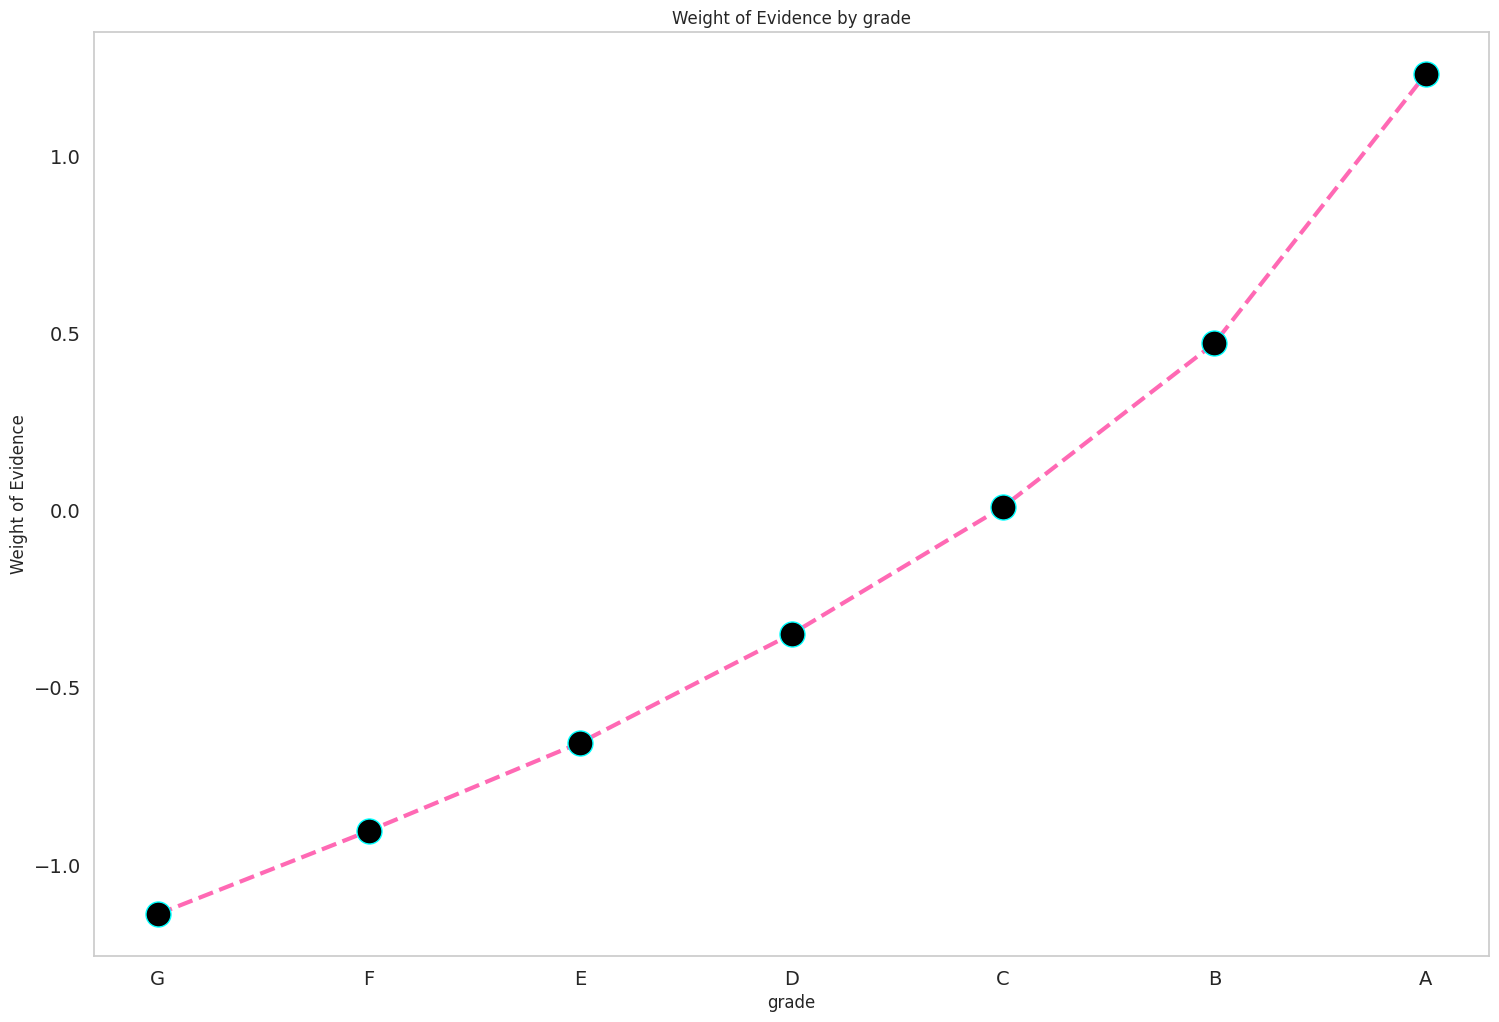

In [38]:
df_grade = woe_categorical(X, 'grade', y)
plot_by_woe(df_grade)

we can see from the above graph that the grades have significantly different woe as we grade changes. We will therefore keep each grade as a feature.

**2. Analyzing Home Ownership variable**

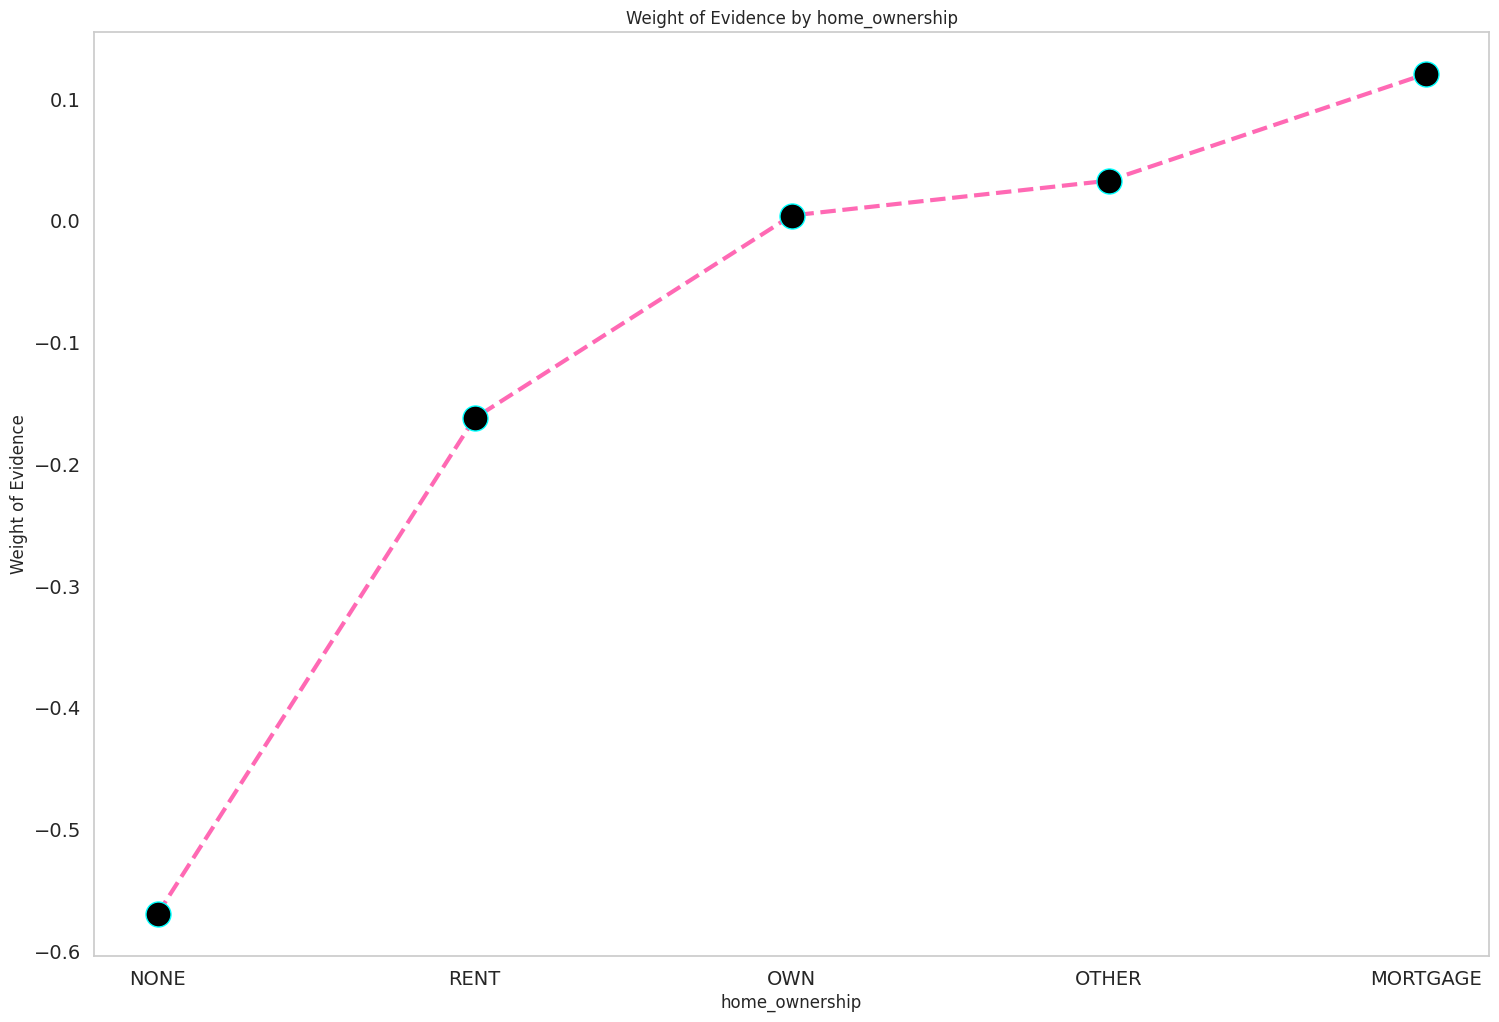

In [39]:
df_home = woe_categorical(X, 'home_ownership', y)
plot_by_woe(df_home)

OTHER, NONE and ANY have very few observations and should be combined with the category with high risk of default that is RENT

**3. Analyzing Verification status variable**

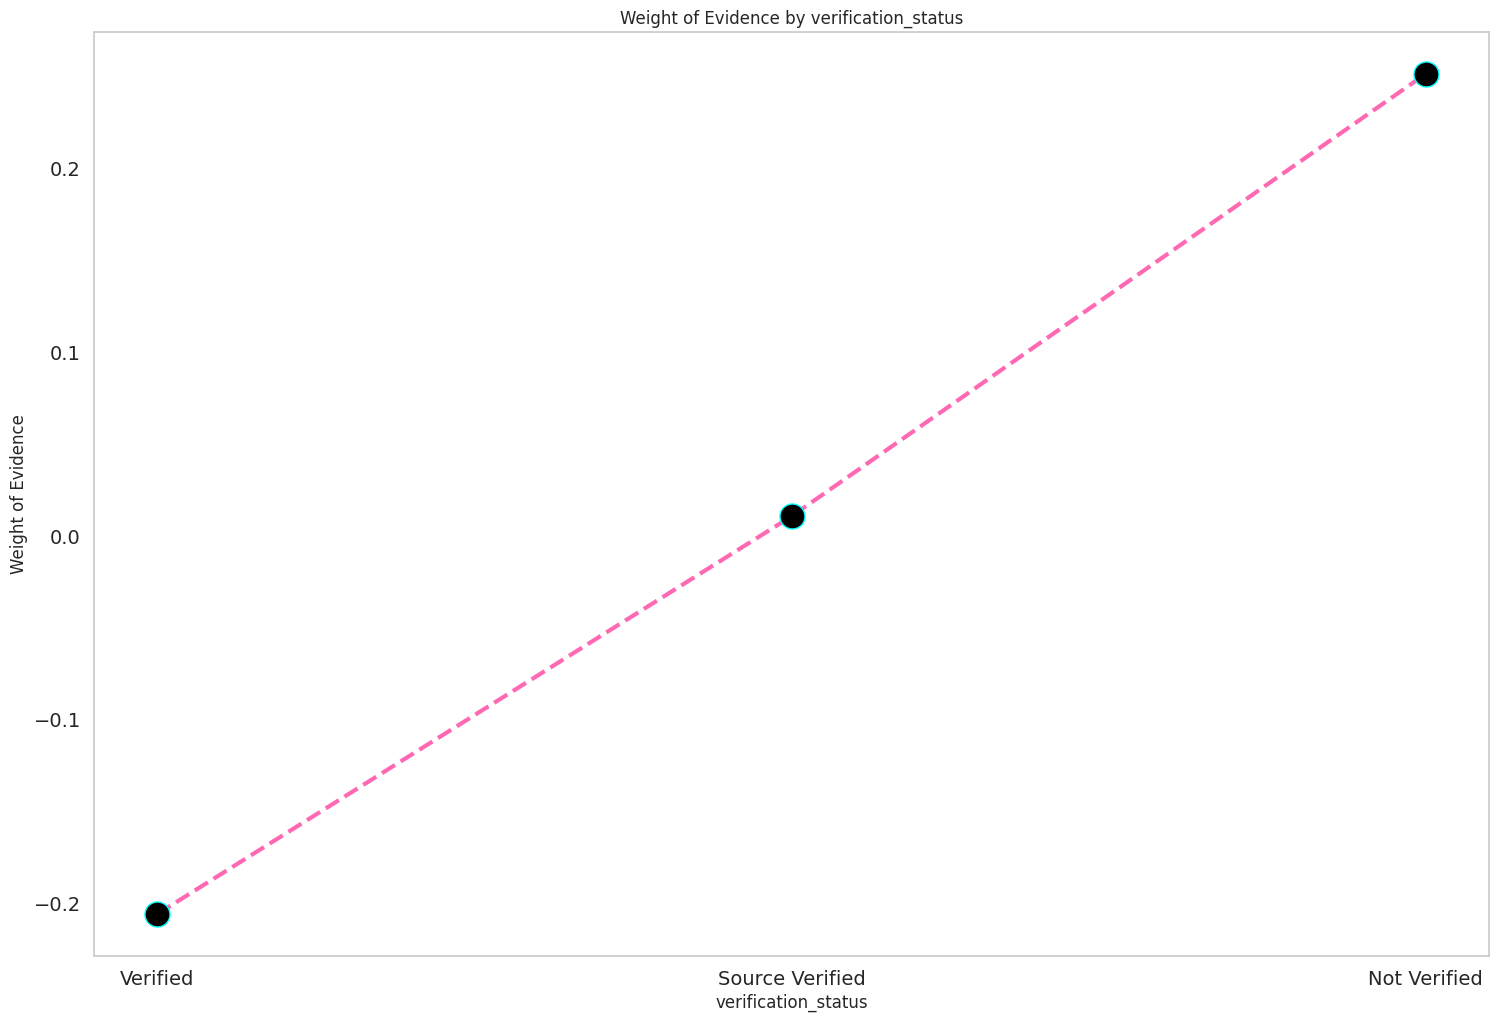

In [40]:
veri_df = woe_categorical(X, 'verification_status', y)
plot_by_woe(veri_df)

This variable has different WoE values and can be used as seperate variables

**4. Analyzing Purpose variable**

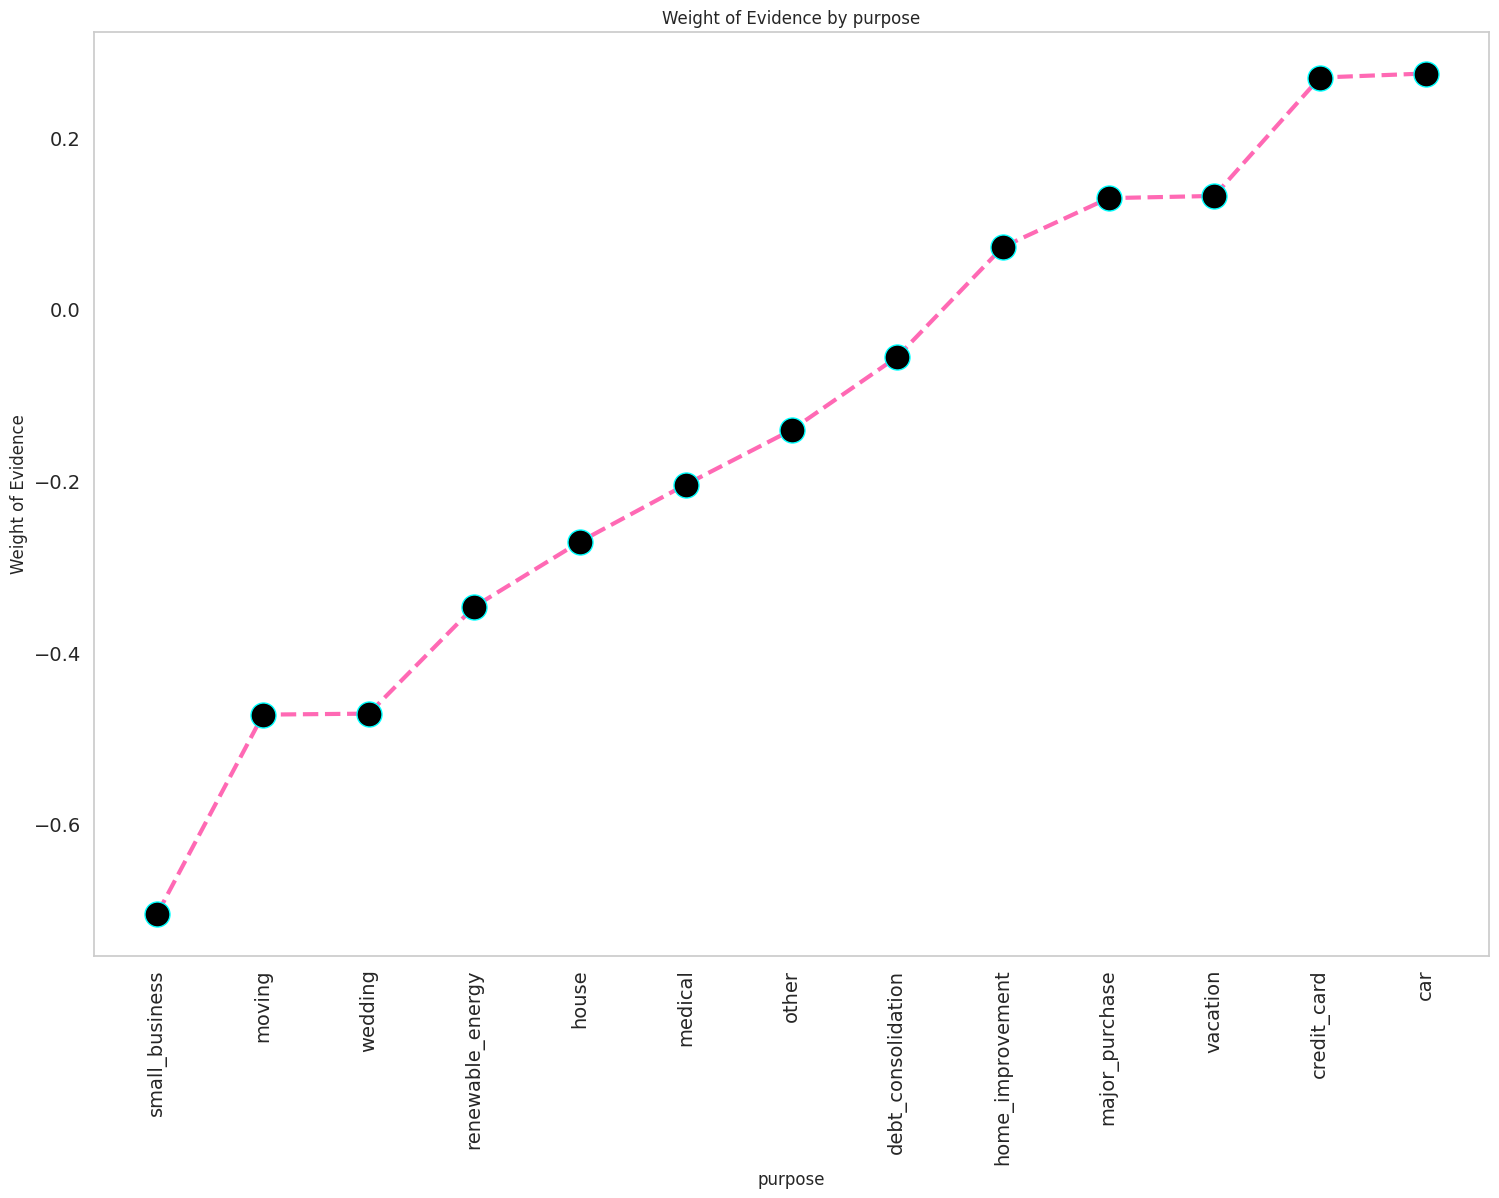

In [41]:
pur_df = woe_categorical(X, 'purpose', y)
plot_by_woe(pur_df, 90)

The following categories wil be combined together:

educational, renewable_energy, moving
other,house, medical
weeding, vacation
debt_consolidation
home_improvement, major purchase
car, credit_card

**5. Analyzing address-state variable**

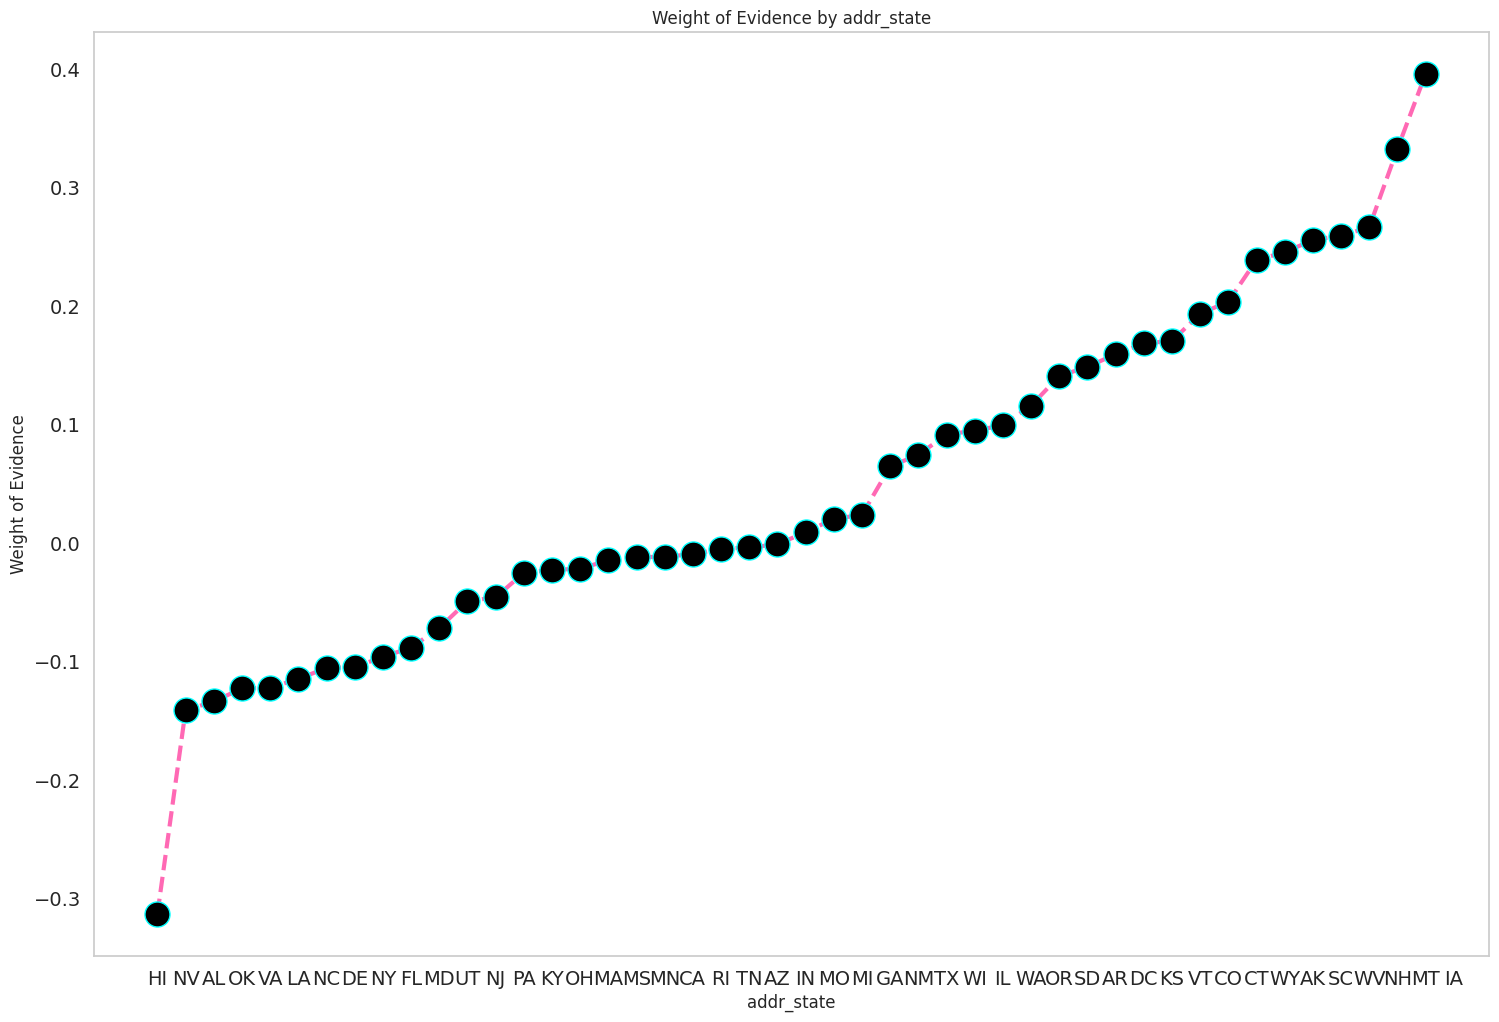

In [42]:
addr_df = woe_categorical(X, 'addr_state', y)
plot_by_woe(addr_df)

The states NE, IA, ME and ID have low observations and this may be the reason for their extreme woe. We will plot the graph again excluding these categories and see if there is any change.

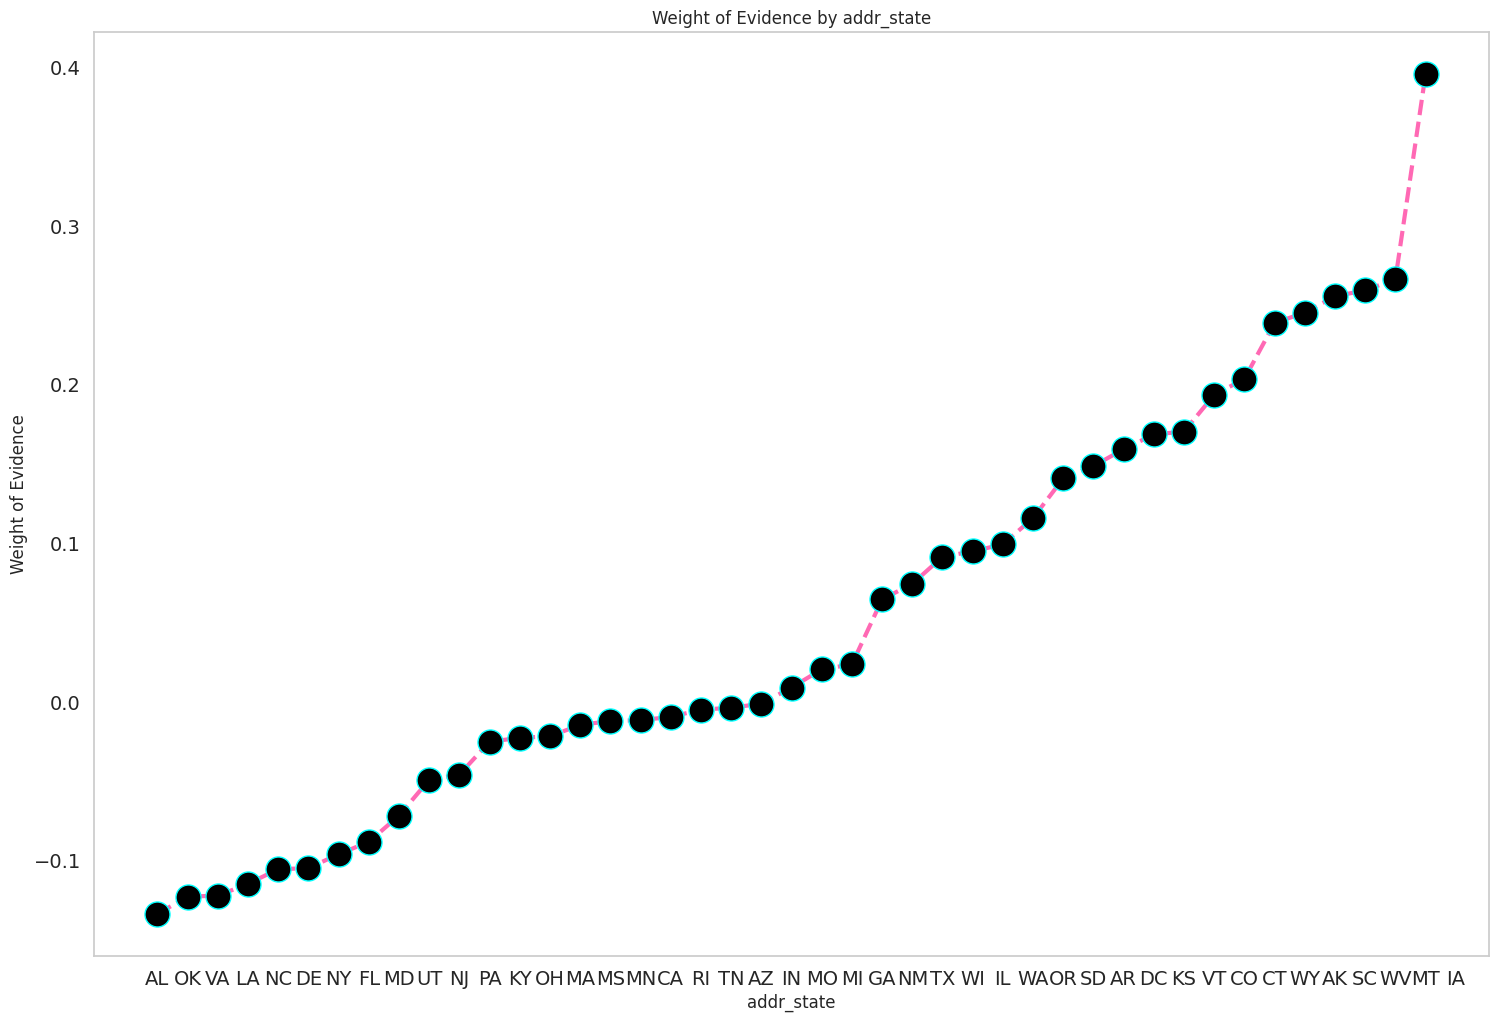

In [43]:
data1 =addr_df.iloc[2:44, :]
data2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)
plot_by_woe(low_data_woe)

In deciding which categories to combine we use both WOE and the number of observations in our analysis. Categories with similar WoE but significantly different observations will not be combined together, because the number of observations can influence the WoE values. Also, categories with both similar WoE and observations greater than 5% can be combined together to form a new category. This process will be used for the rest of analysis.The categories to be combined as follows:

- NE, IA, NV, HI, FL, AL
- NY
- LA, NM, OK, NC, MO, MD, NJ, VA
- CA
- AZ, MI, UT, TN, AR, PA
- RI, OH, KY, DE, MN, SD, MA, IN
- GA, WA
- WI, OR
- TX
- IL, CT,MT
- CO, SC
- KS, VT, AK, MS
- NH, WV, WY, DC

In total we will have to create 13 categories for the addr_variable. We will create these variables later. Let us move on to analyze the rest of the features.

**6. Analyzing initial list status variable**

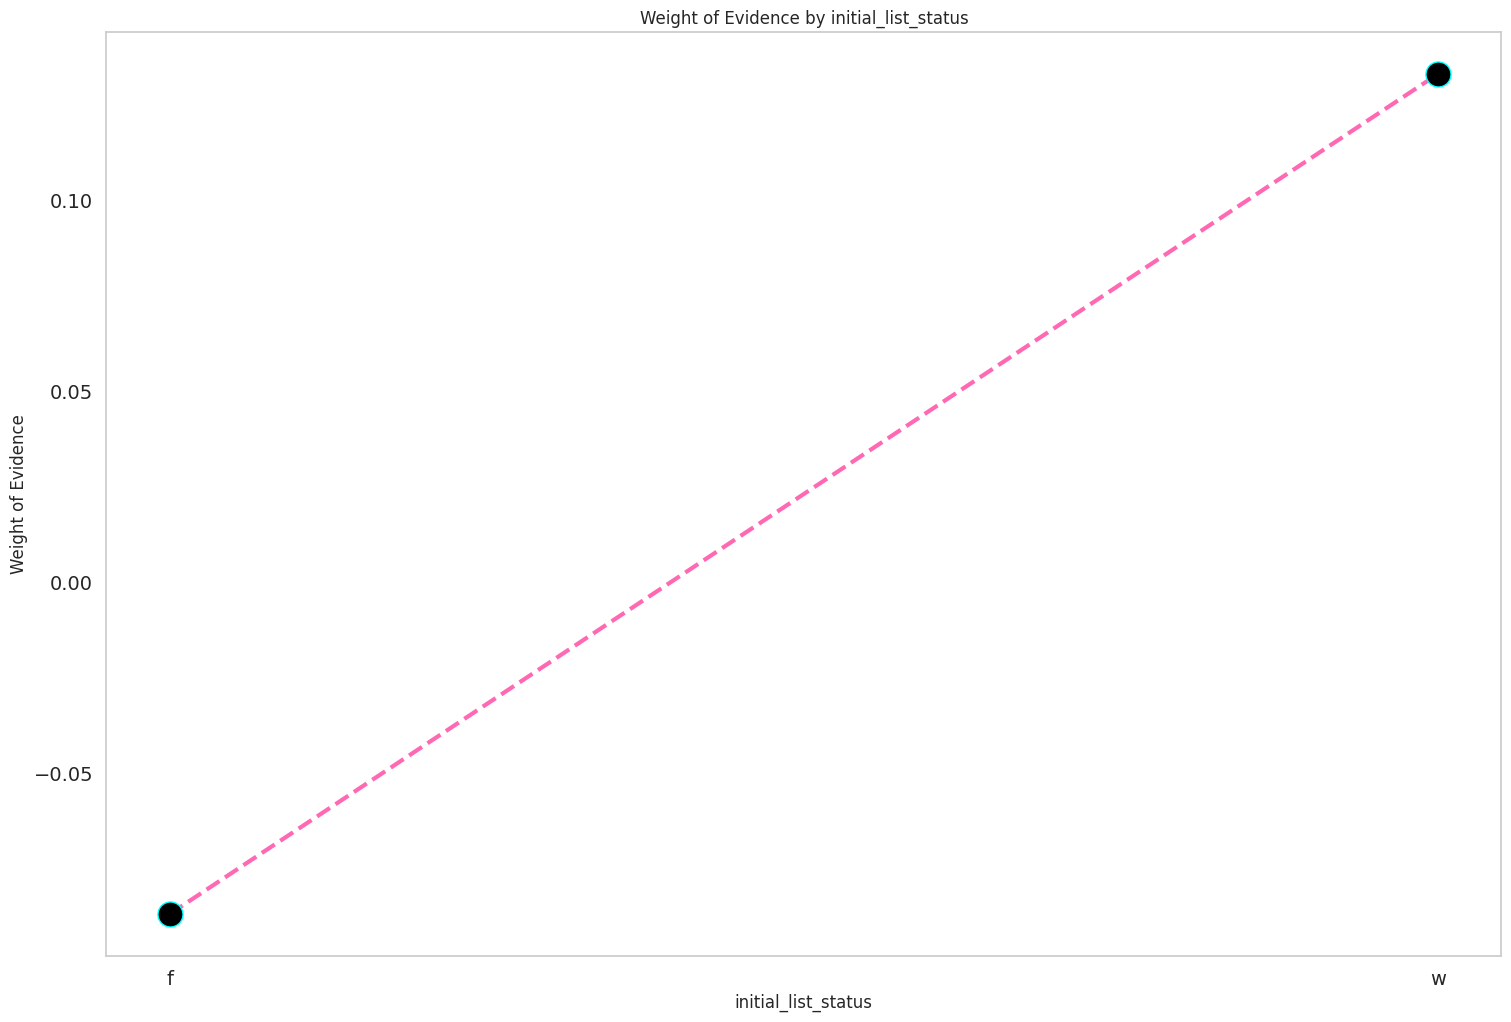

In [44]:
init_list_df = woe_categorical( X, 'initial_list_status', y)
plot_by_woe(init_list_df)

This variable has significantly different WoE values and categories should be kept as seperate variables

# Analyzing Continous Variables by Plotting WoE

In [45]:
# function to calculate WoE for continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

**1. Analyzing term variable**

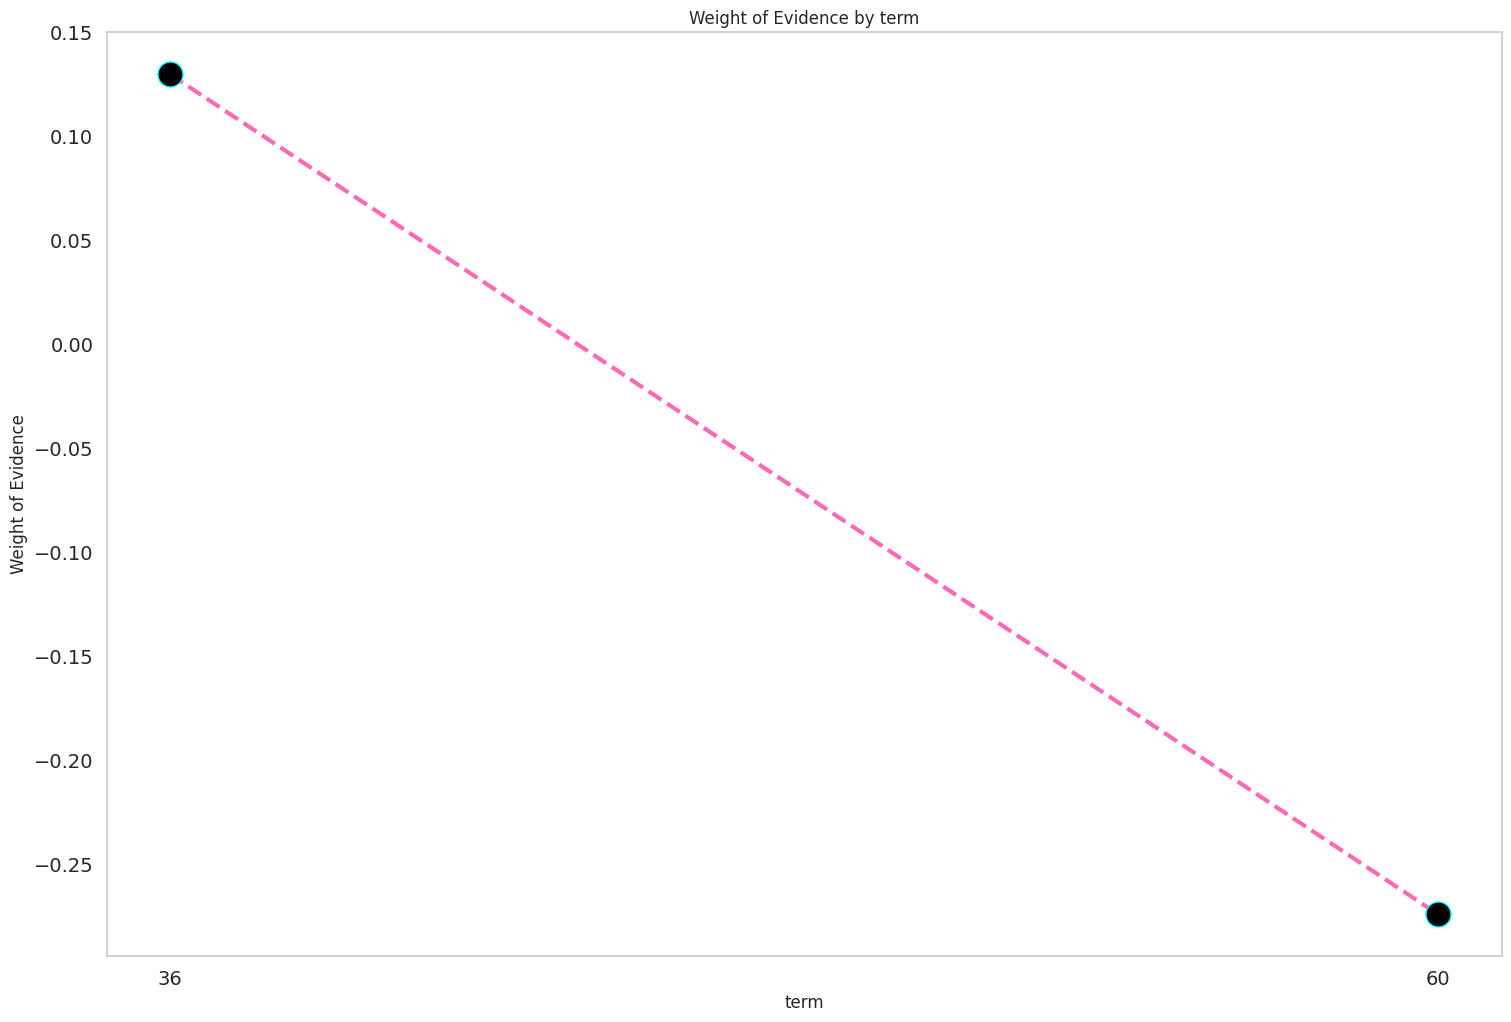

In [46]:
plot_by_woe(woe_continous(X,'term', y ))

**2. Analyzing months since issued variable**

In [47]:
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

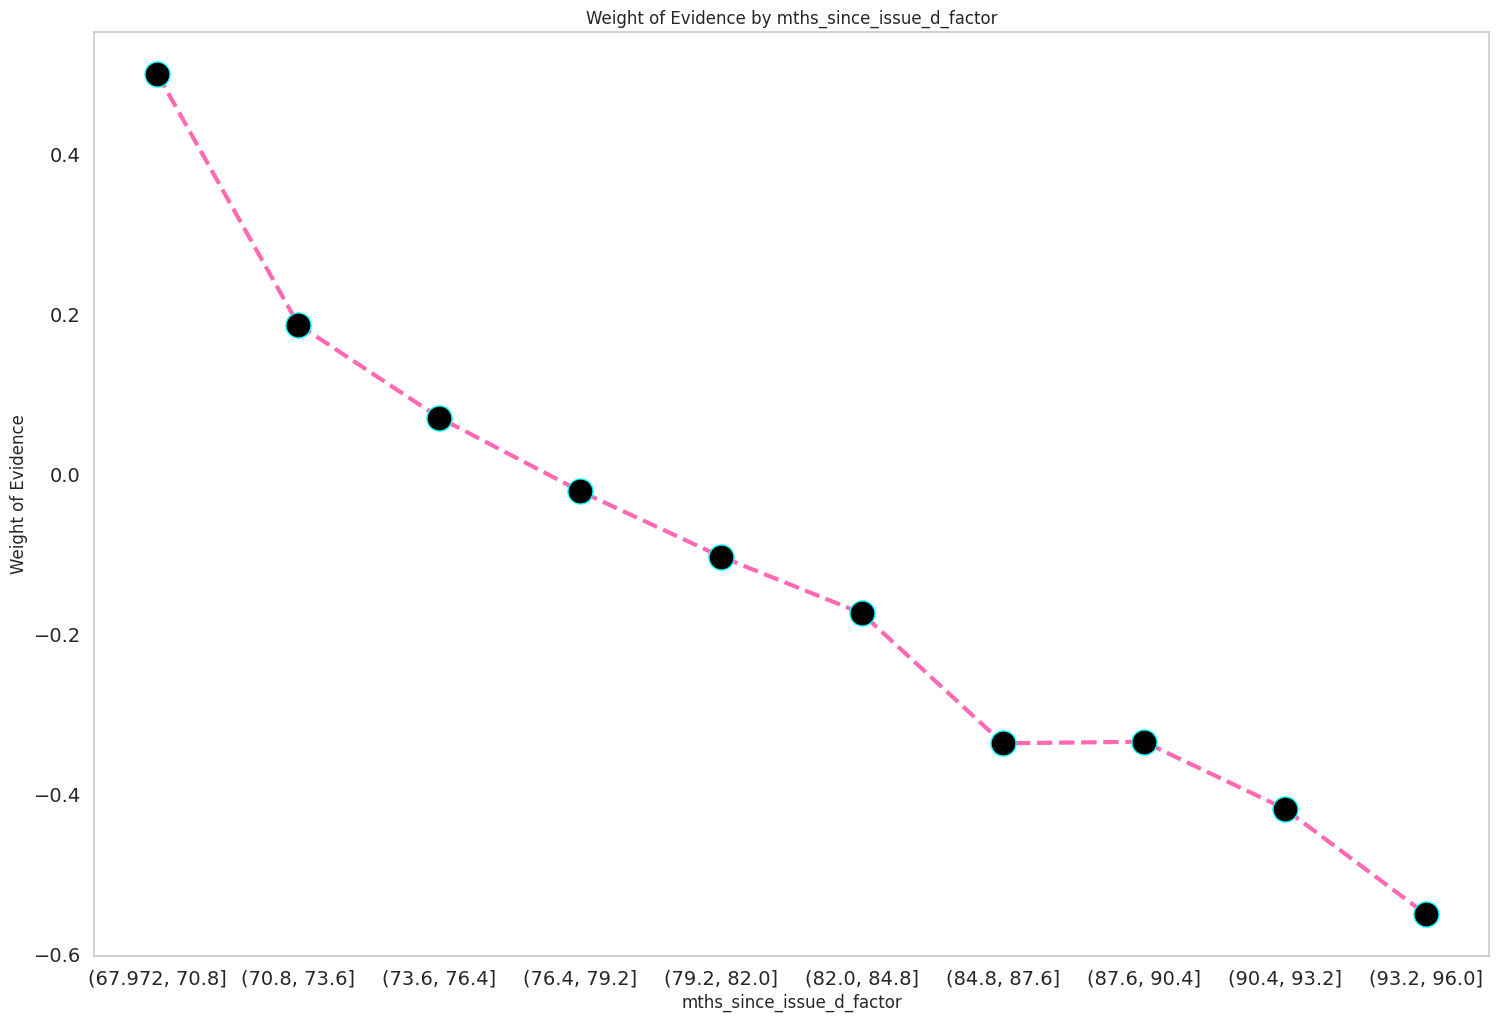

In [48]:
# fine class by creating  a new var

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
plot_by_woe(mths_since_iss_df)

The follwing categories will be created based on their WoE and number of observations

- (67.97, 70.8)
- (70.8, 73.6)
- (73.6- 76.4)
- (76.4.- 79.2)
- (79.2-82)
- (82-84)
- (84-90.4)
- (90.4-96)

**3. Analyzing interest rate variable**

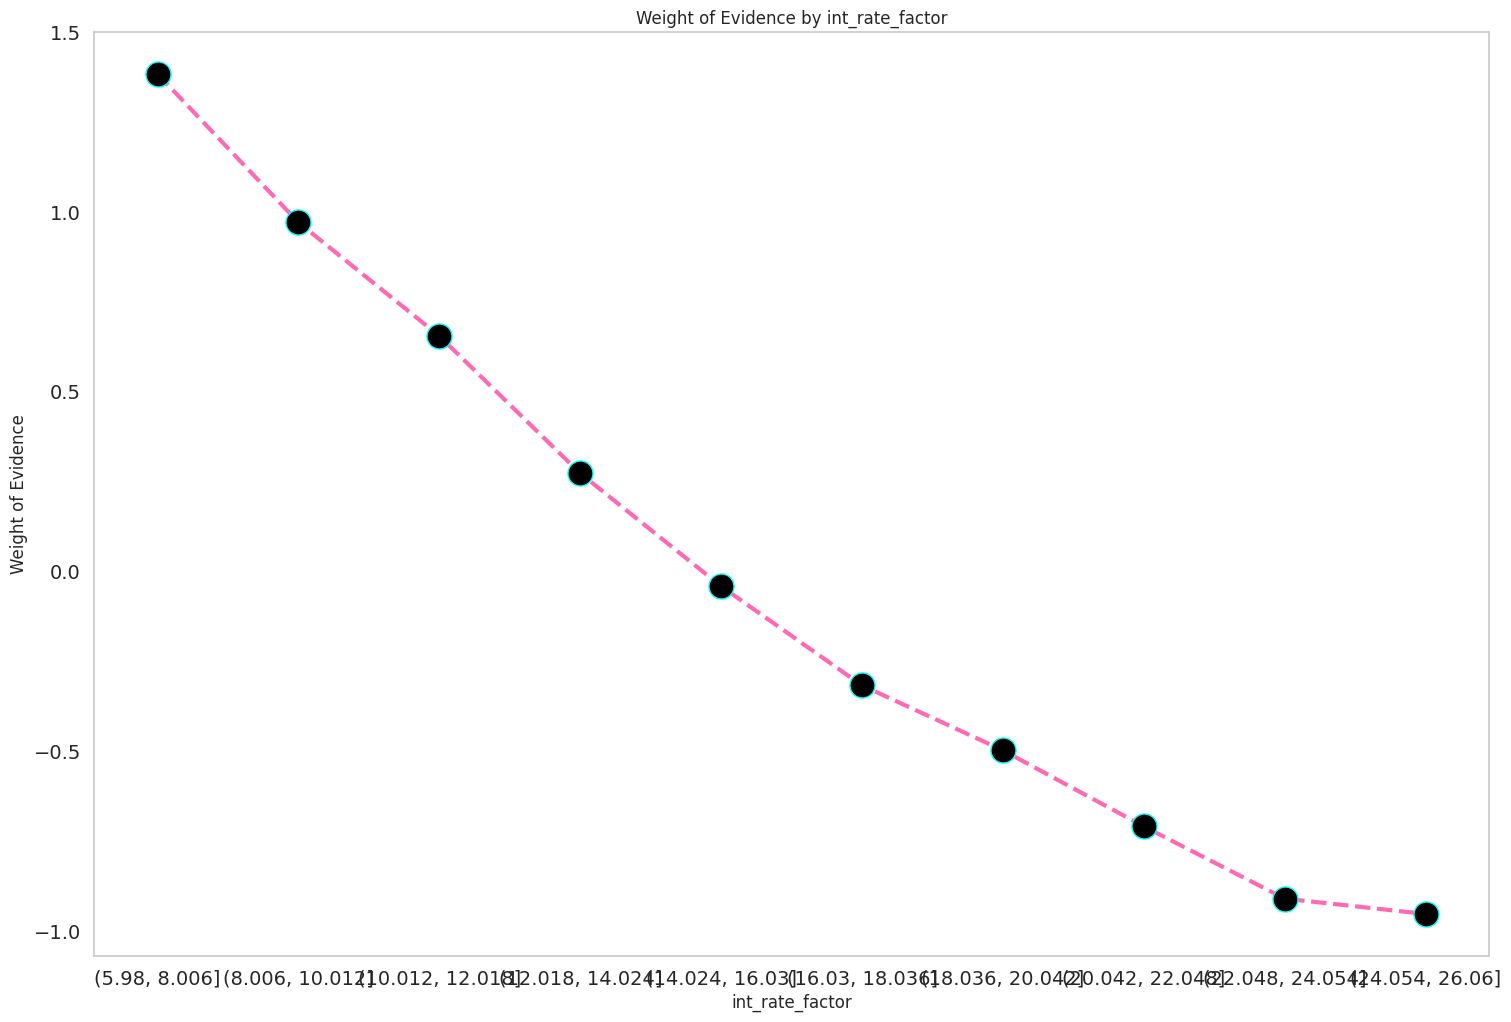

In [49]:
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)
int_rate_df = woe_continous(X, 'int_rate_factor',y)
plot_by_woe(int_rate_df)

From the graph above only the last two categories will be combined.

(22.048, 26)

**4. Analyzing total_rec_int variable**

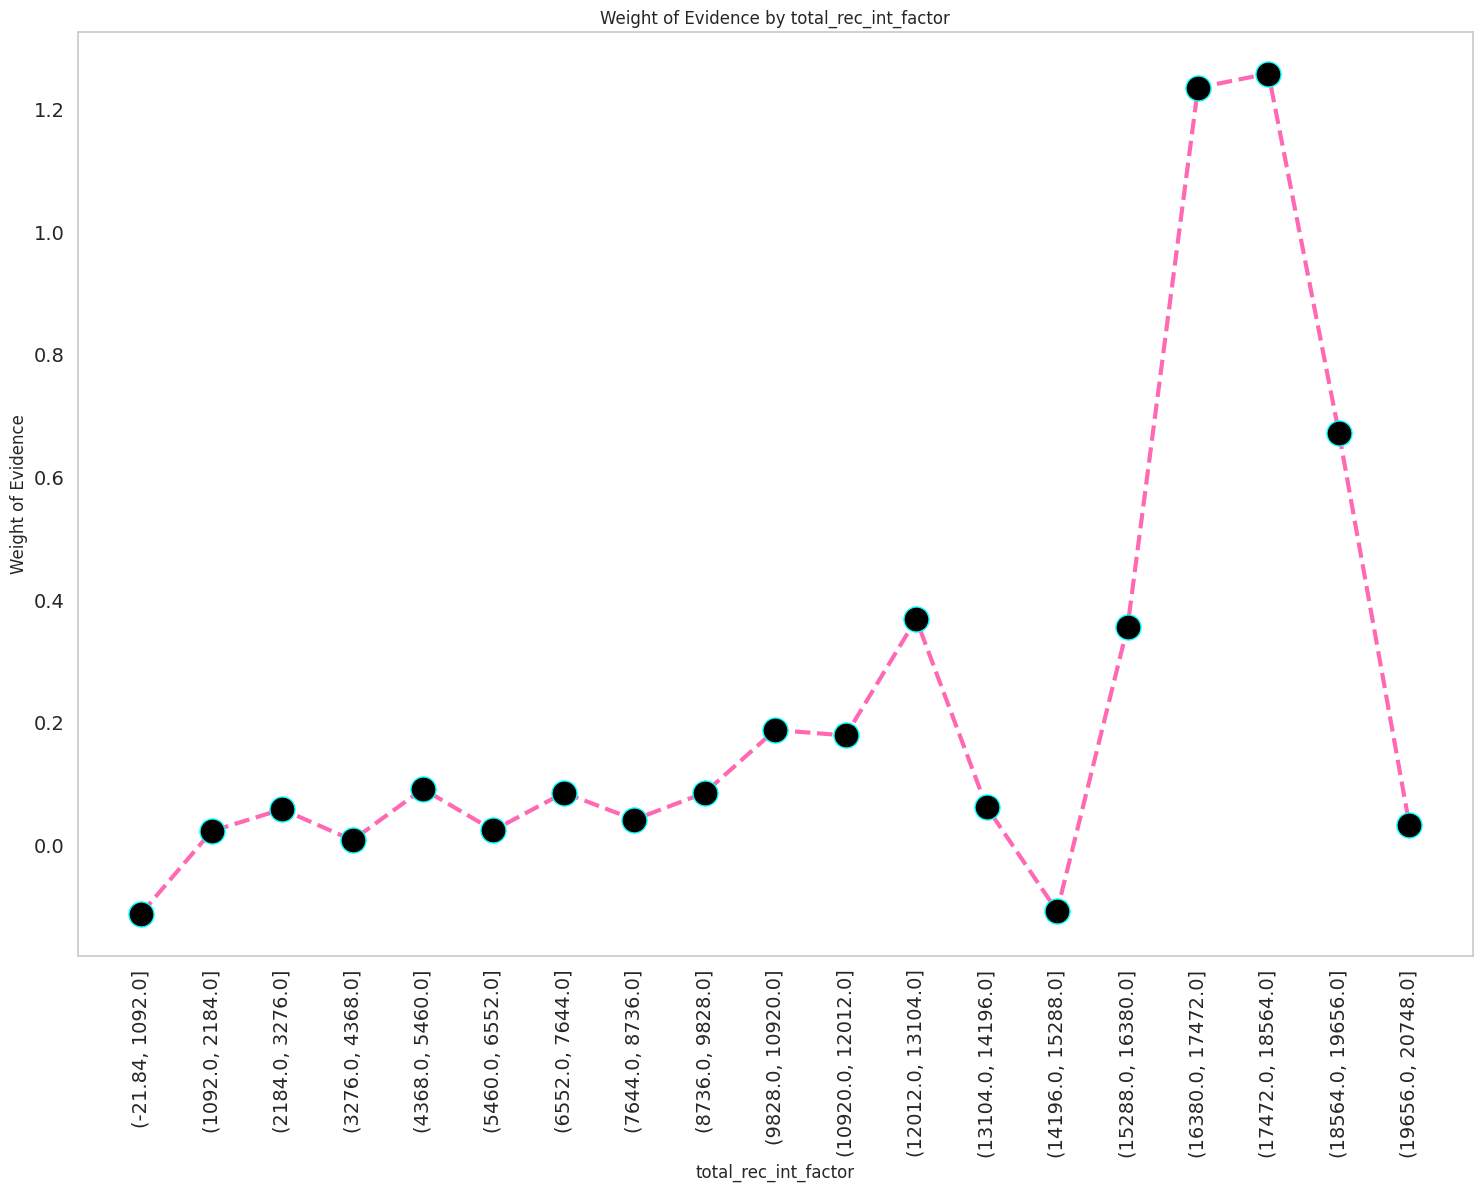

In [50]:
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
plot_by_woe(rec_int_df, 90)

**5. Analyzing toal revolving_high_limit variable**

In [51]:
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
#plot_by_woe(revol_hi_df, 90)

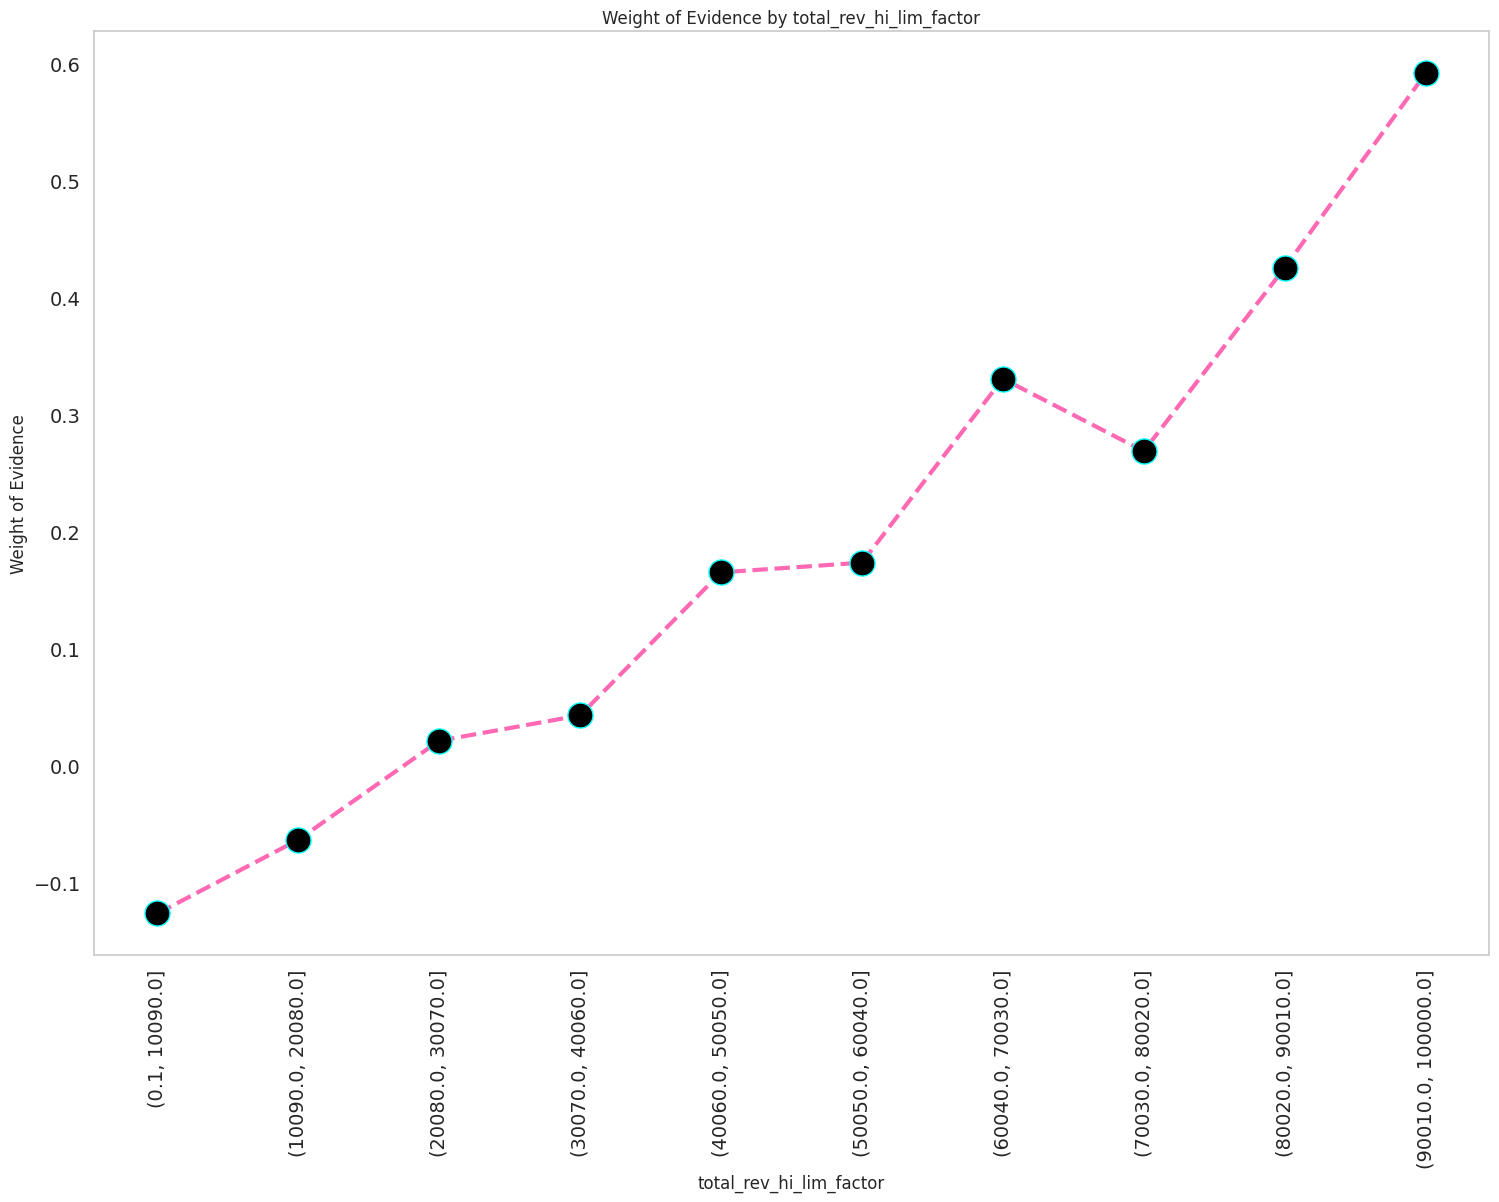

In [52]:
#analyzing below 100000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

**6. Analyzing total_payment variable**

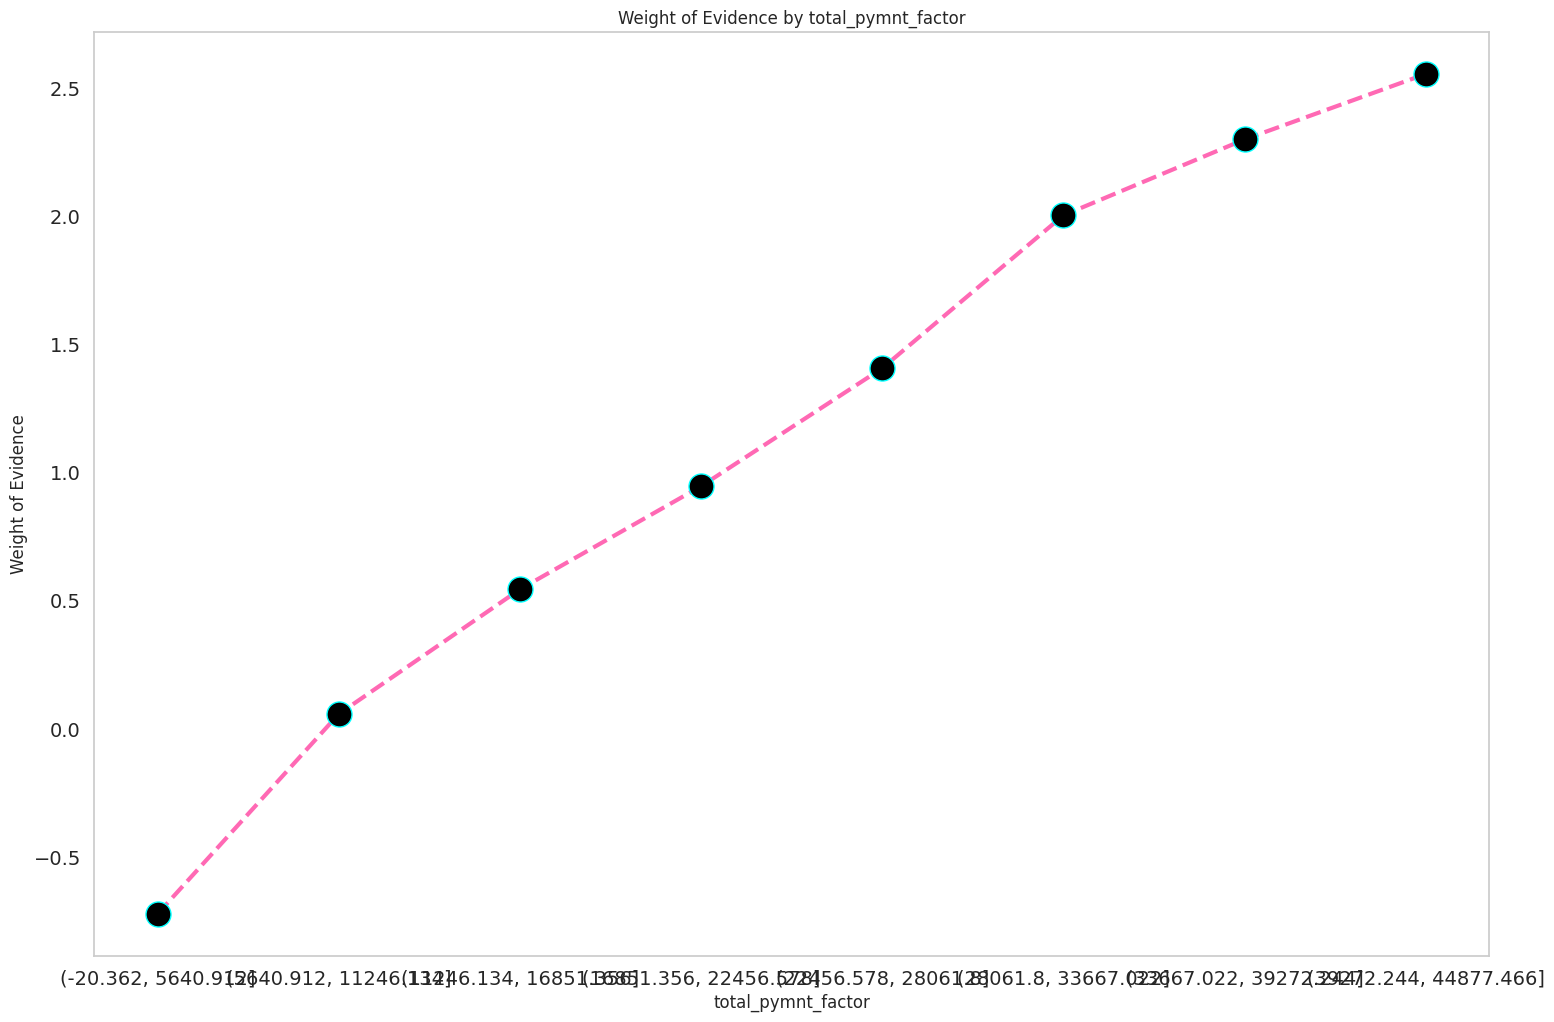

In [53]:
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
plot_by_woe(total_pym_df)

**7. Analyzing dti variable**

"dti" is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

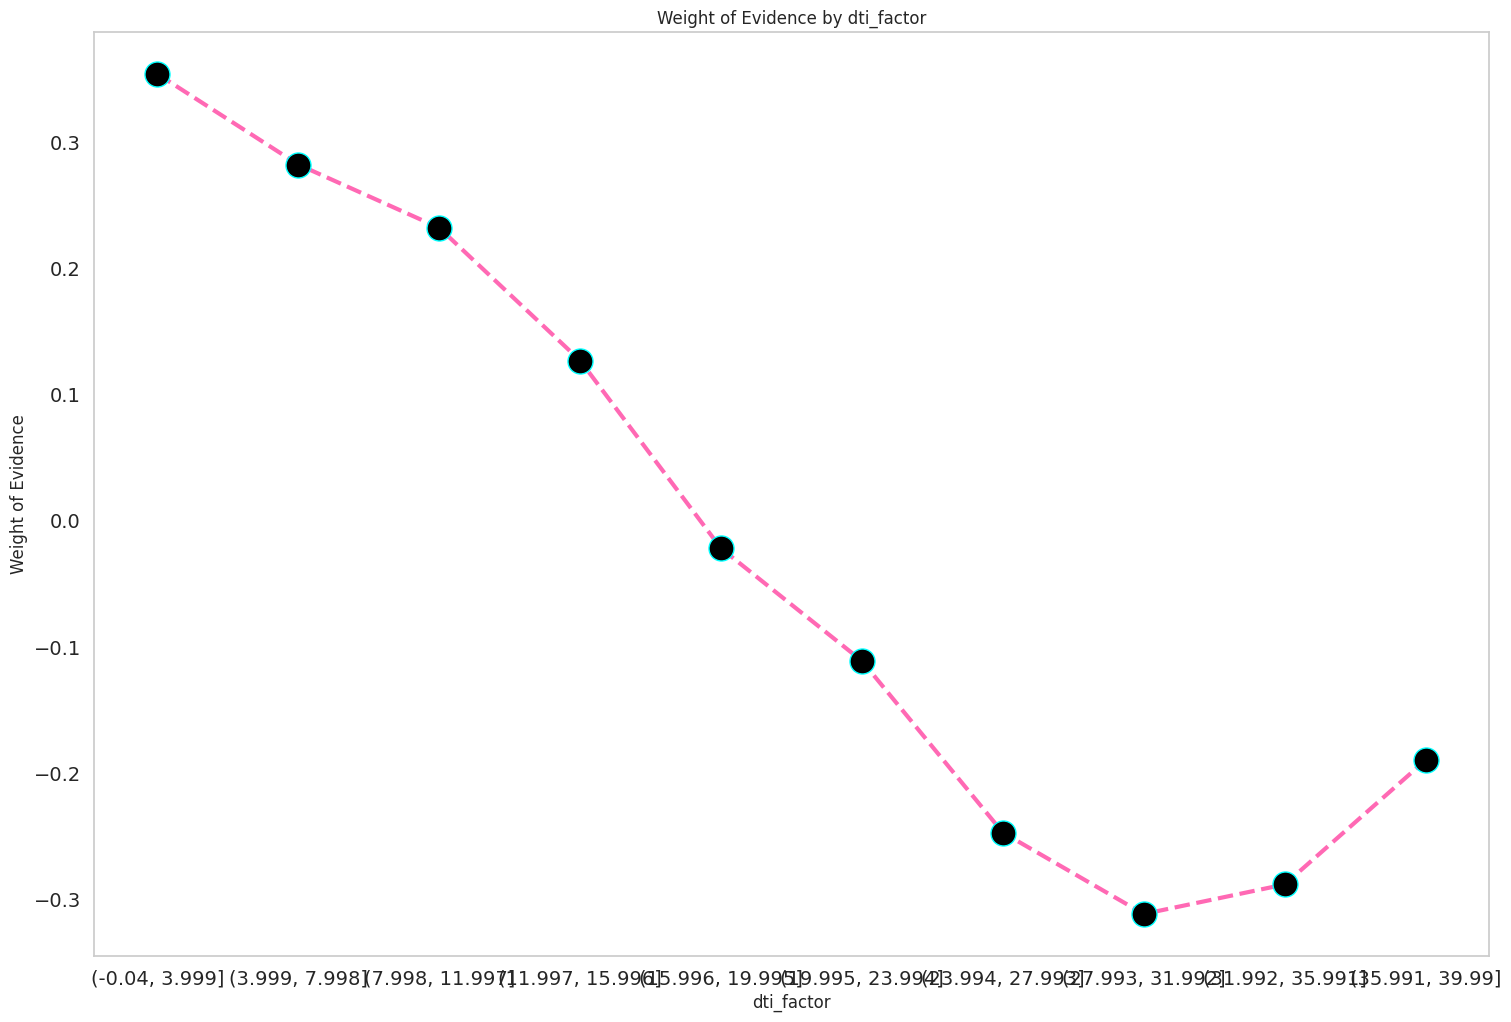

In [54]:
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
plot_by_woe(dti_df)

The following categories will be combined:

(27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

**8. Analyzing annual_income variable**

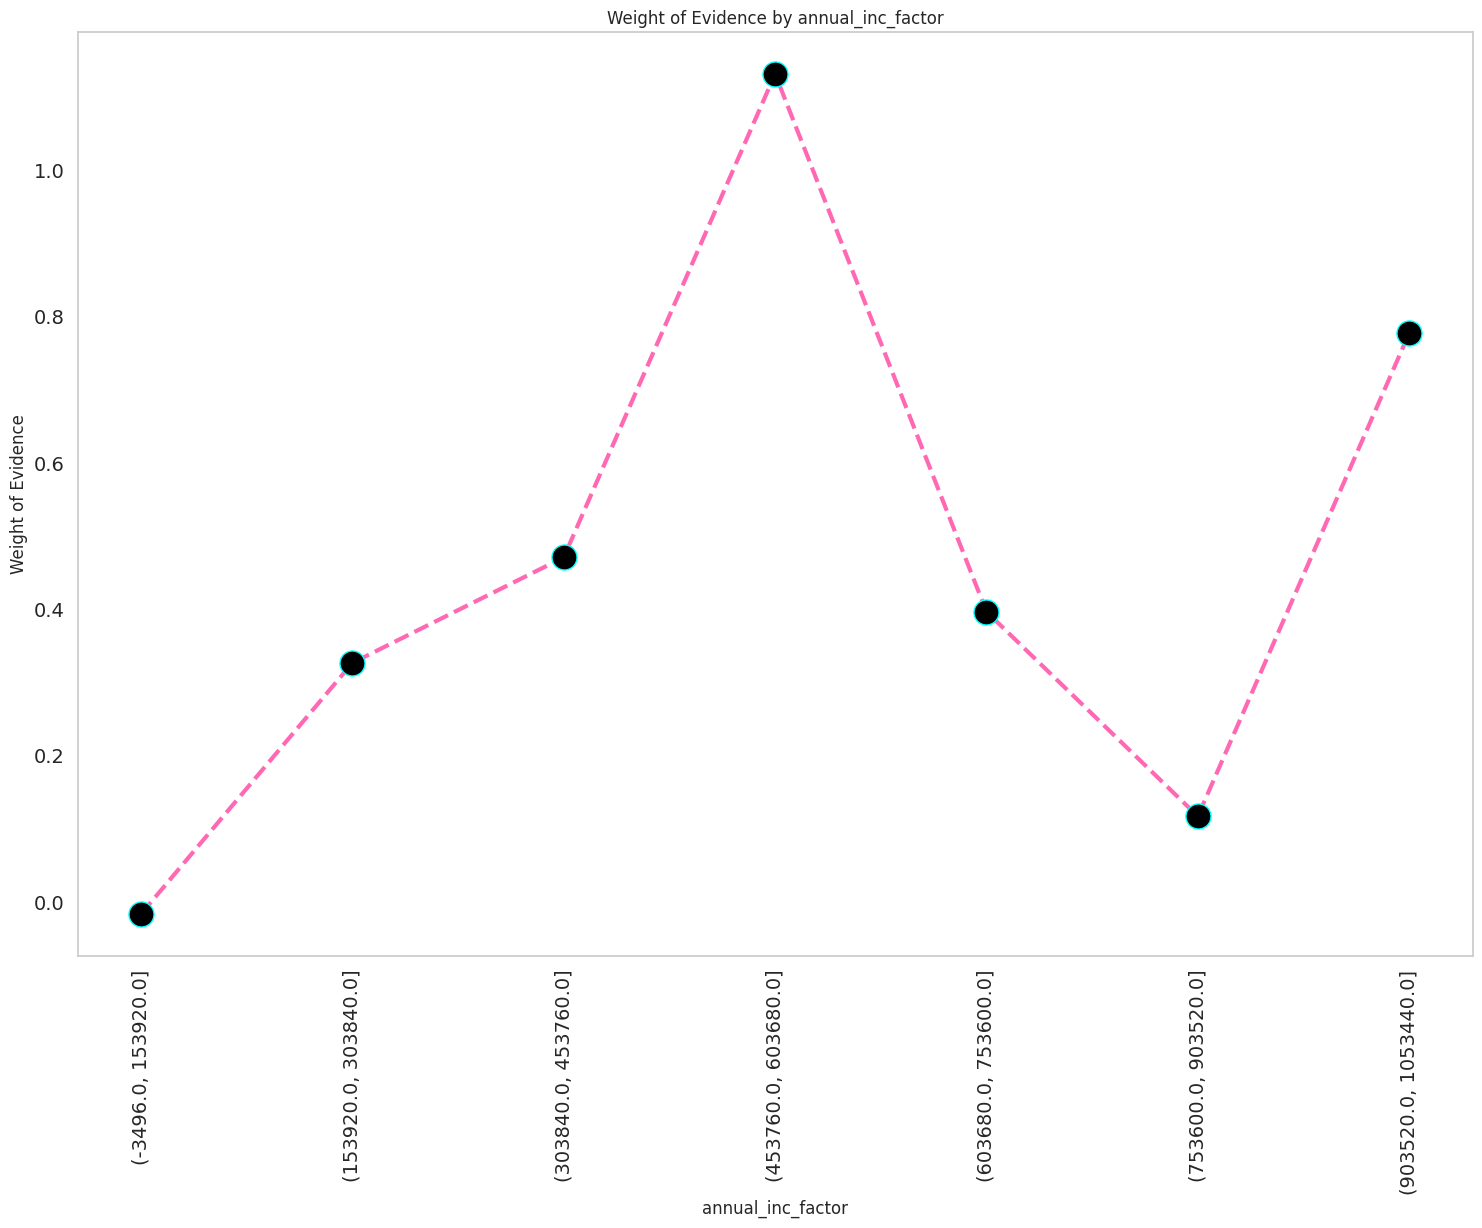

In [55]:
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
plot_by_woe(ann_inc_df, 90)

We will seperate this variable into people with higher and lower incomes. From the WoE table, we observe, when annual income increases, the the number of observations decreases. This is because only a few people earn high income. We will use a new variable for people with income above 150000 dollars. And also, analyze individuals with income below 150000 dollars.

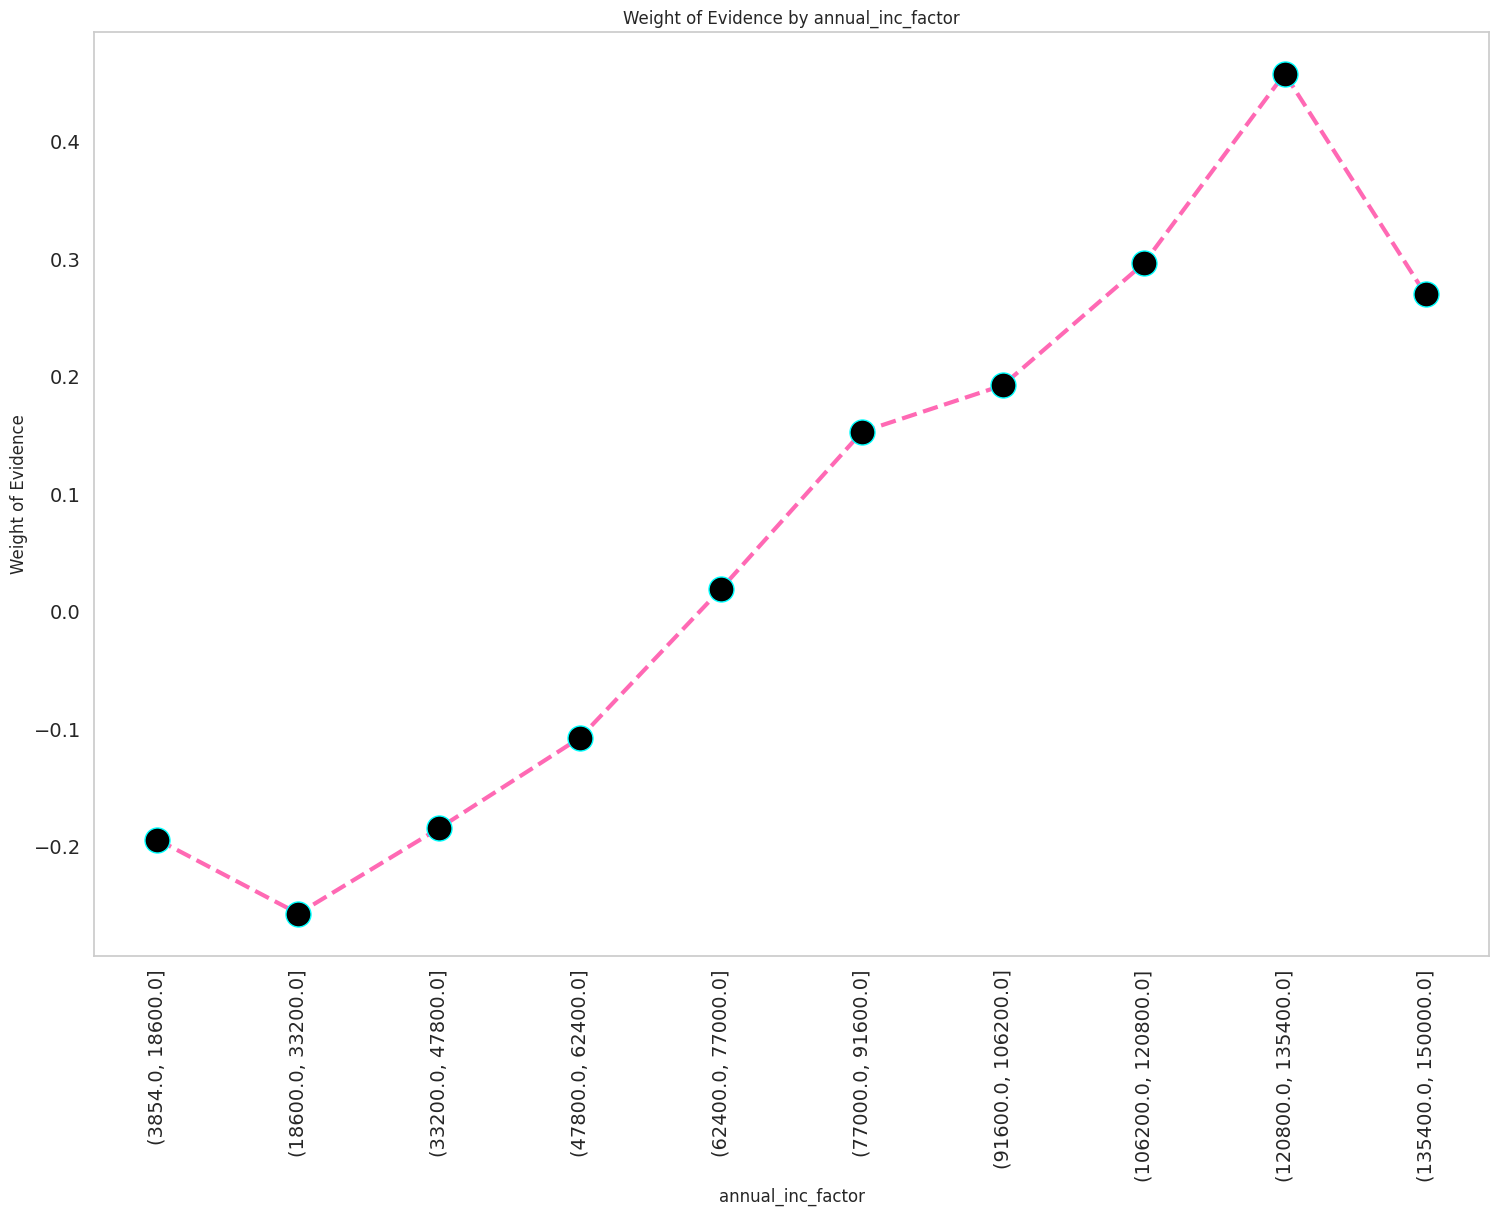

In [56]:
#Analyzing income  below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

From the graph, we will combine the follwing categories based on WoE and number of observations as follows:
- (<=32000),
- (>32000 <= 50000),
- (>50000 <= 60000),
- (>60000 <=75000),
- (>75000 <=90000),
- (>90000 <=120000),
- (>120000 <=135000),
- (>135000 <=150000),
- (>150000)

**9. Analyzing inq_last_6mths variable**

inq_last_6mths denote the number of inquiries in last 6 months

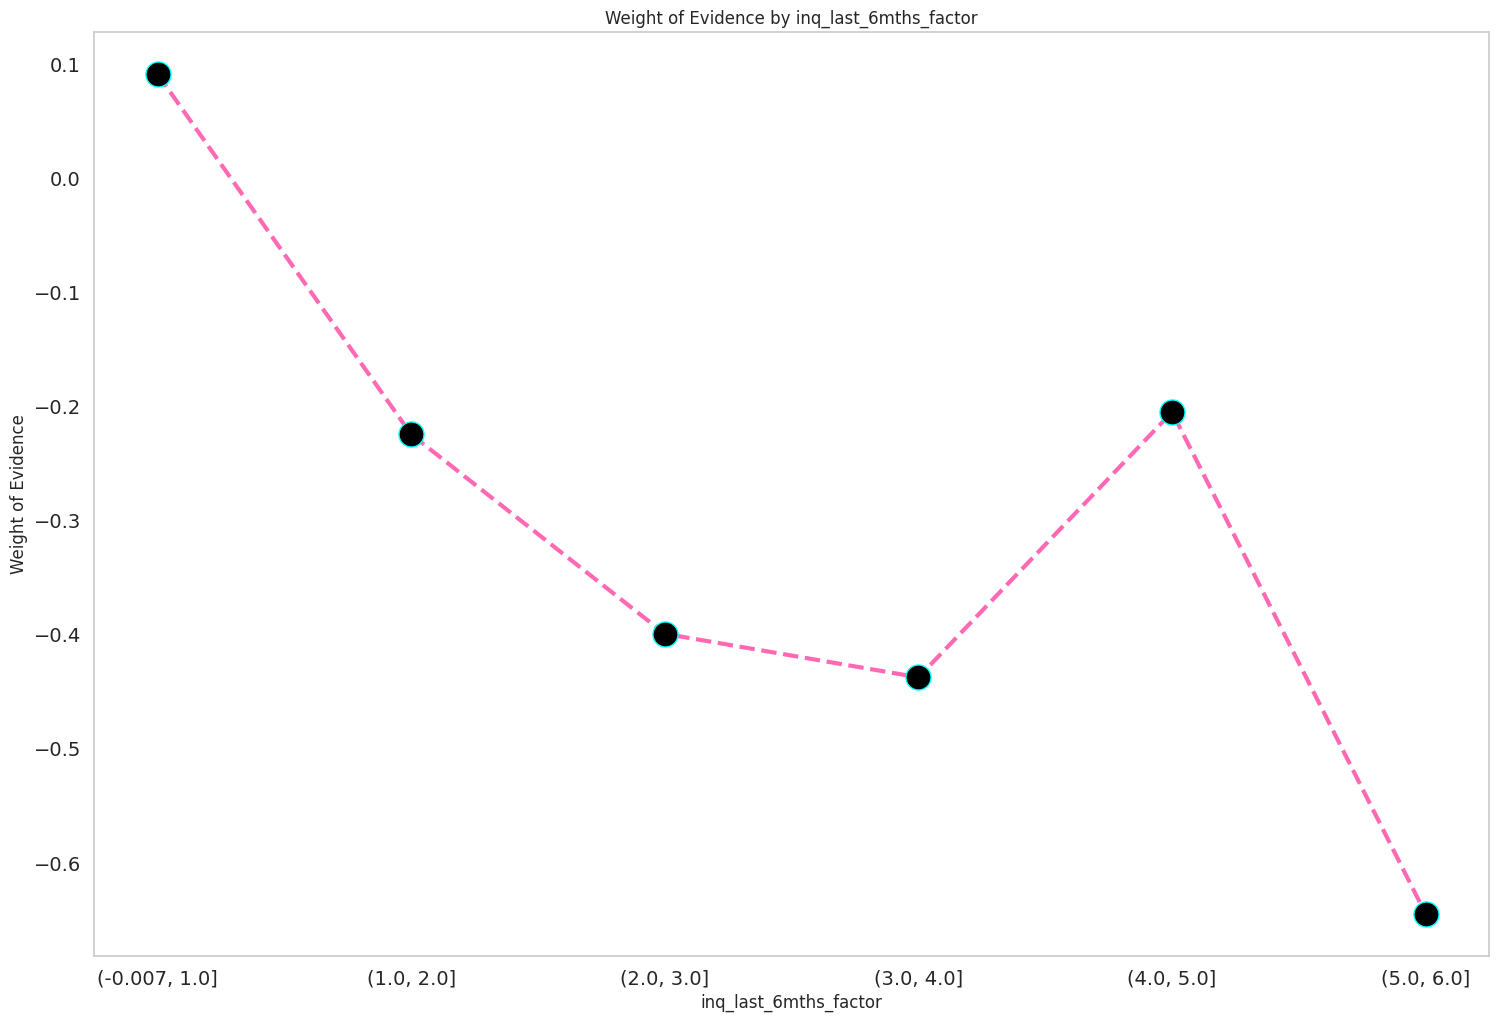

In [57]:
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
plot_by_woe(inq_fact_df)

The follwing categories will be created

- <1 months,
- 1-2,
- 2-4,
- 4-7

**10. Analyzing total current balance variable**

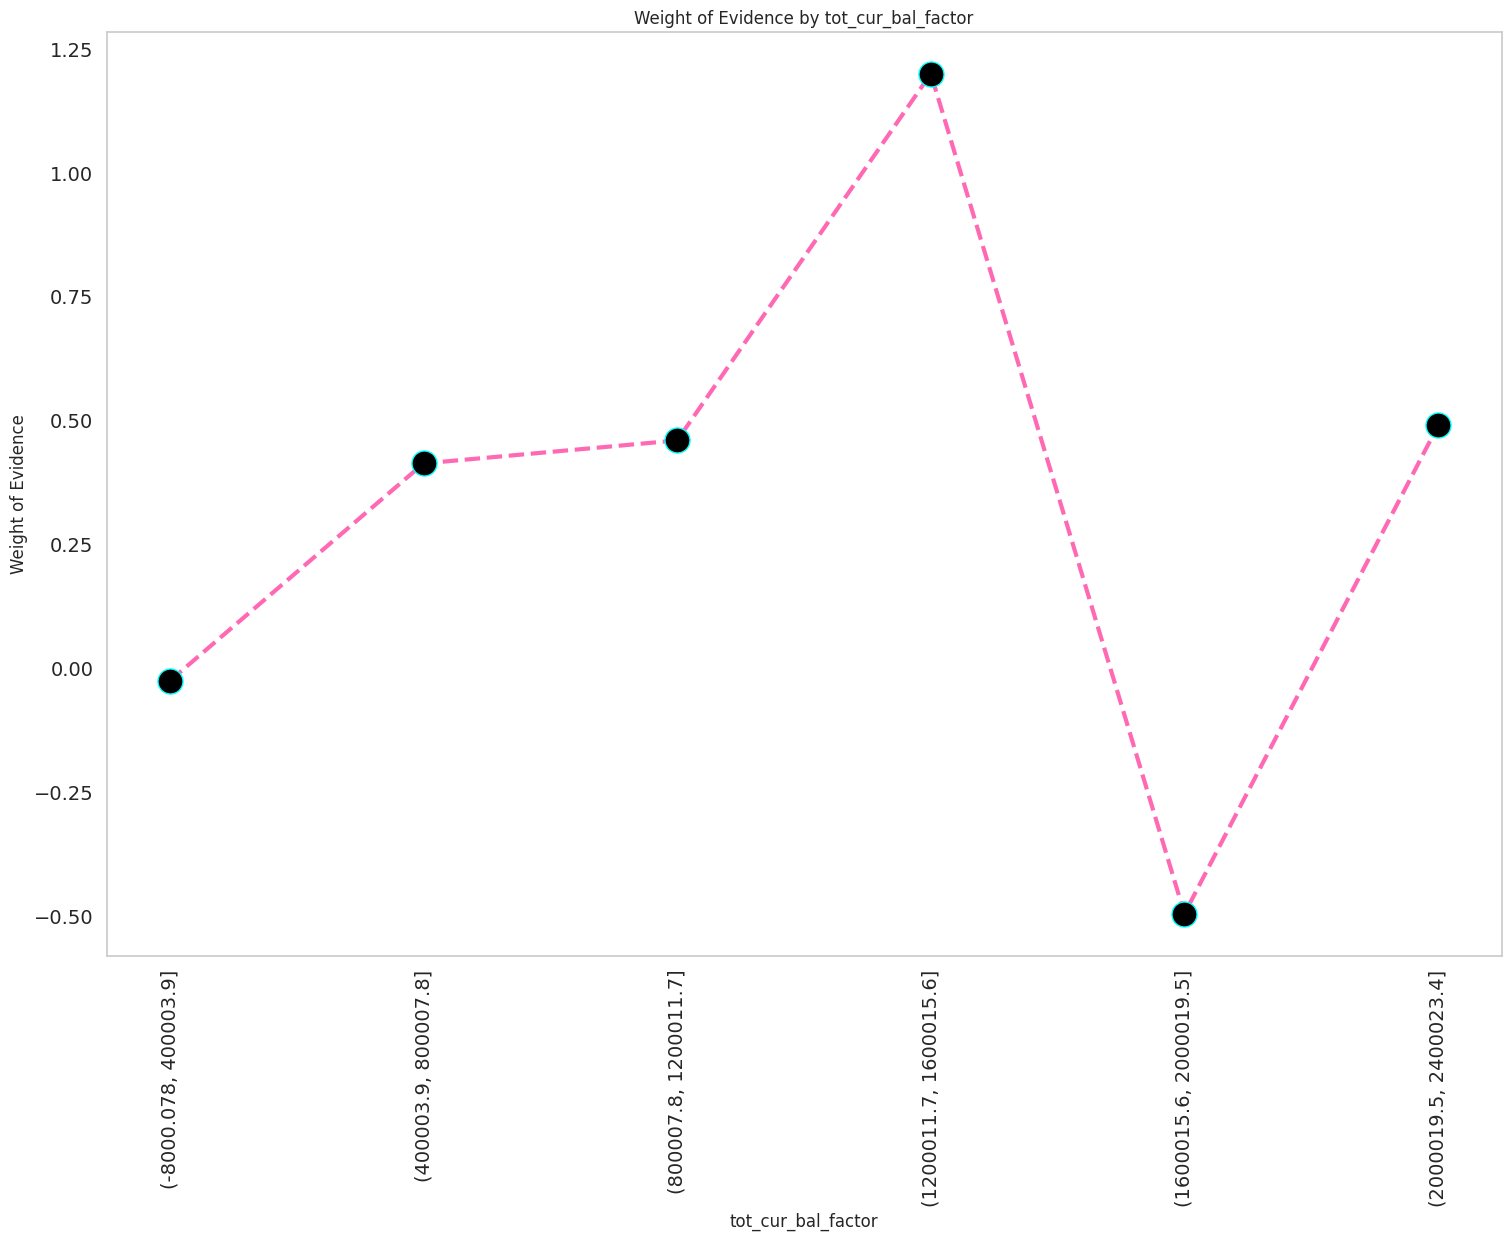

In [58]:
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
plot_by_woe(curr_bal_df, 90)

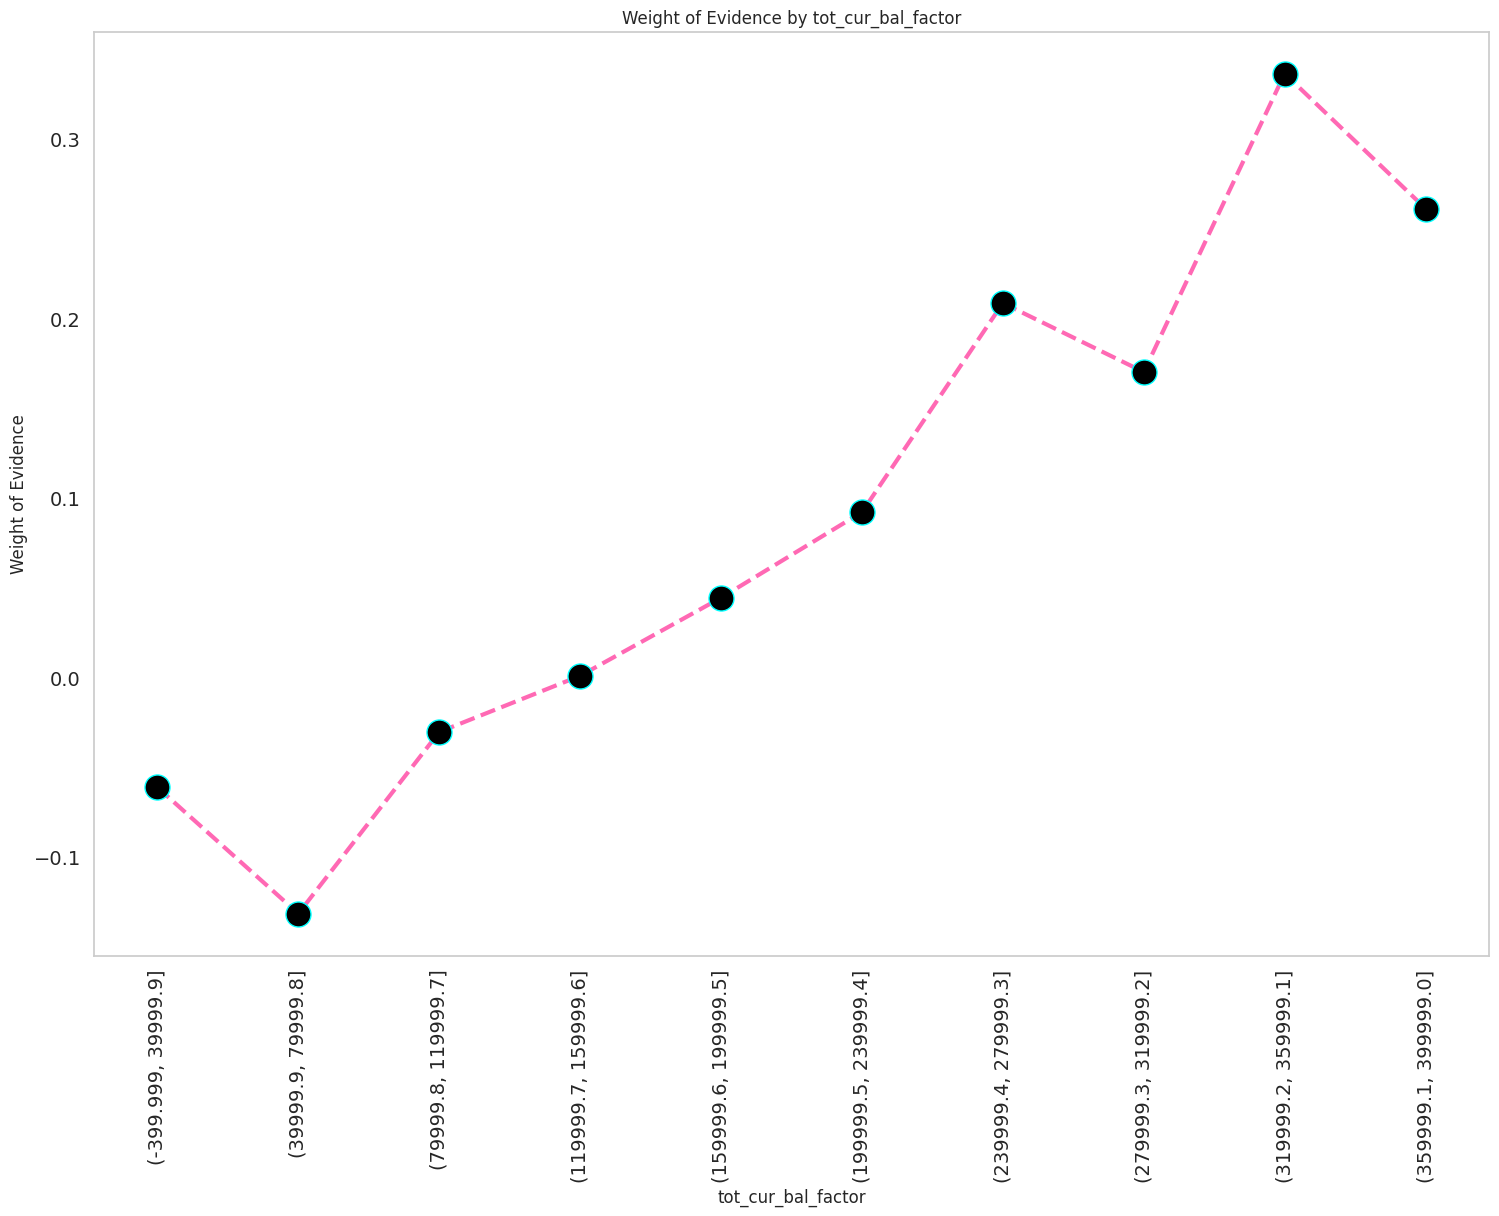

In [59]:
#Analyzing current balance  below 400000
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# select only the relevant index in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

the following variables will be created:
- <40000,
- 40000-80000,
- 80000-120000,
- 120000-160000,
- 160000-200000,
- 200000-240000,
- 240000-320000,
- 320000-400000

**11. Analyzing months since credit pulled variable**

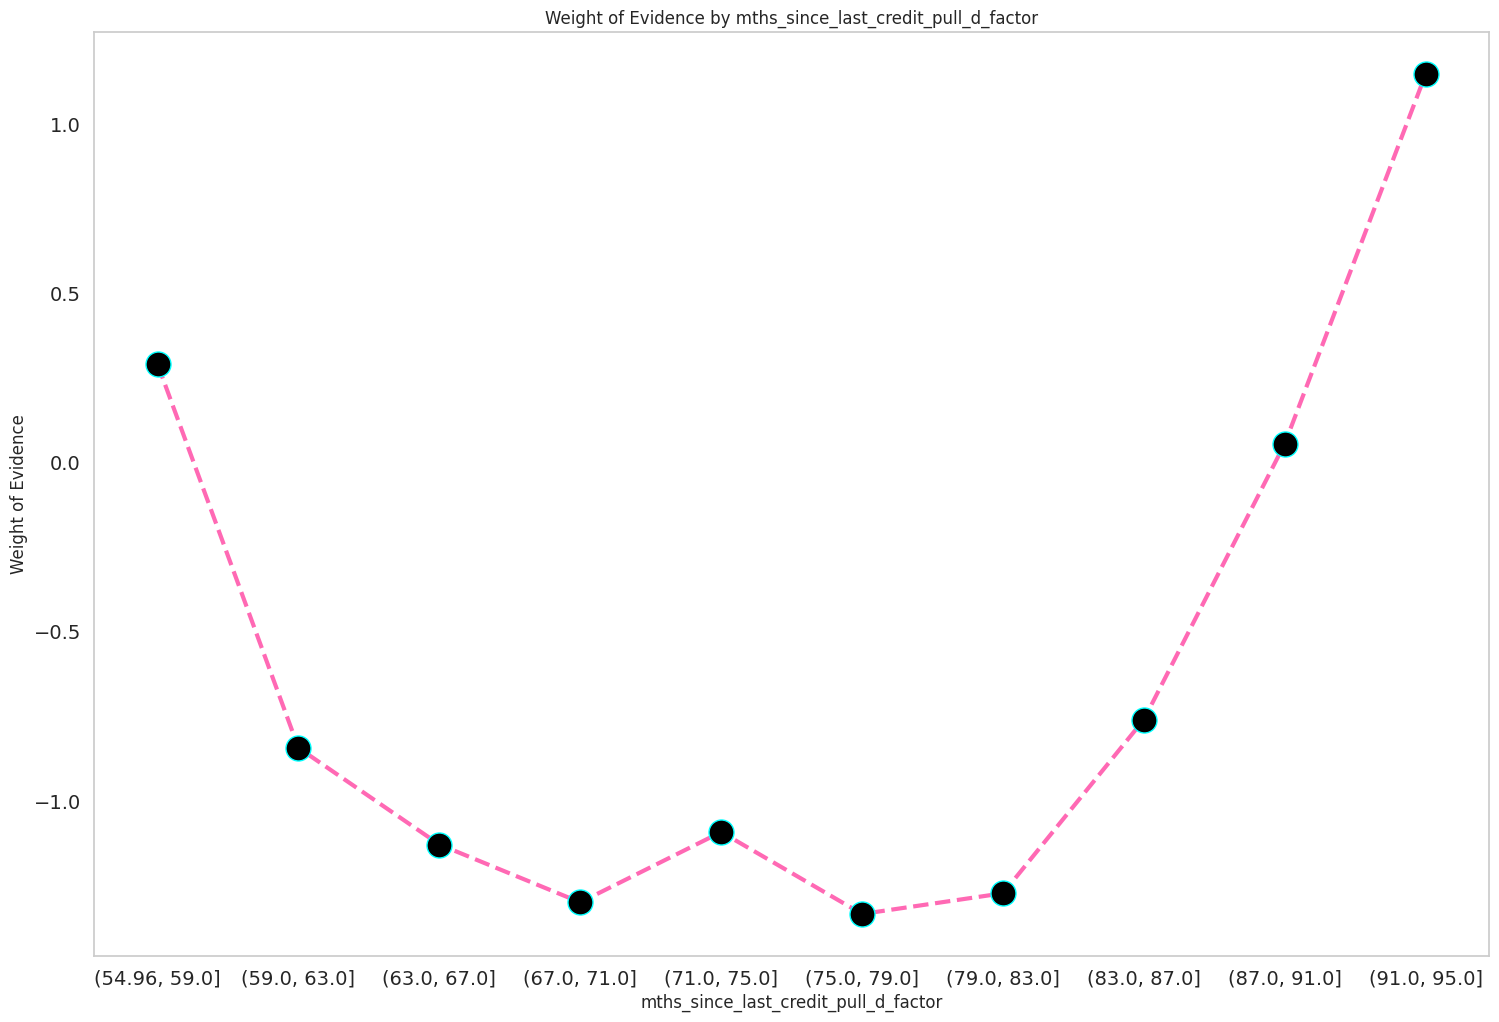

In [60]:
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
plot_by_woe(mths_cr_pull_df)

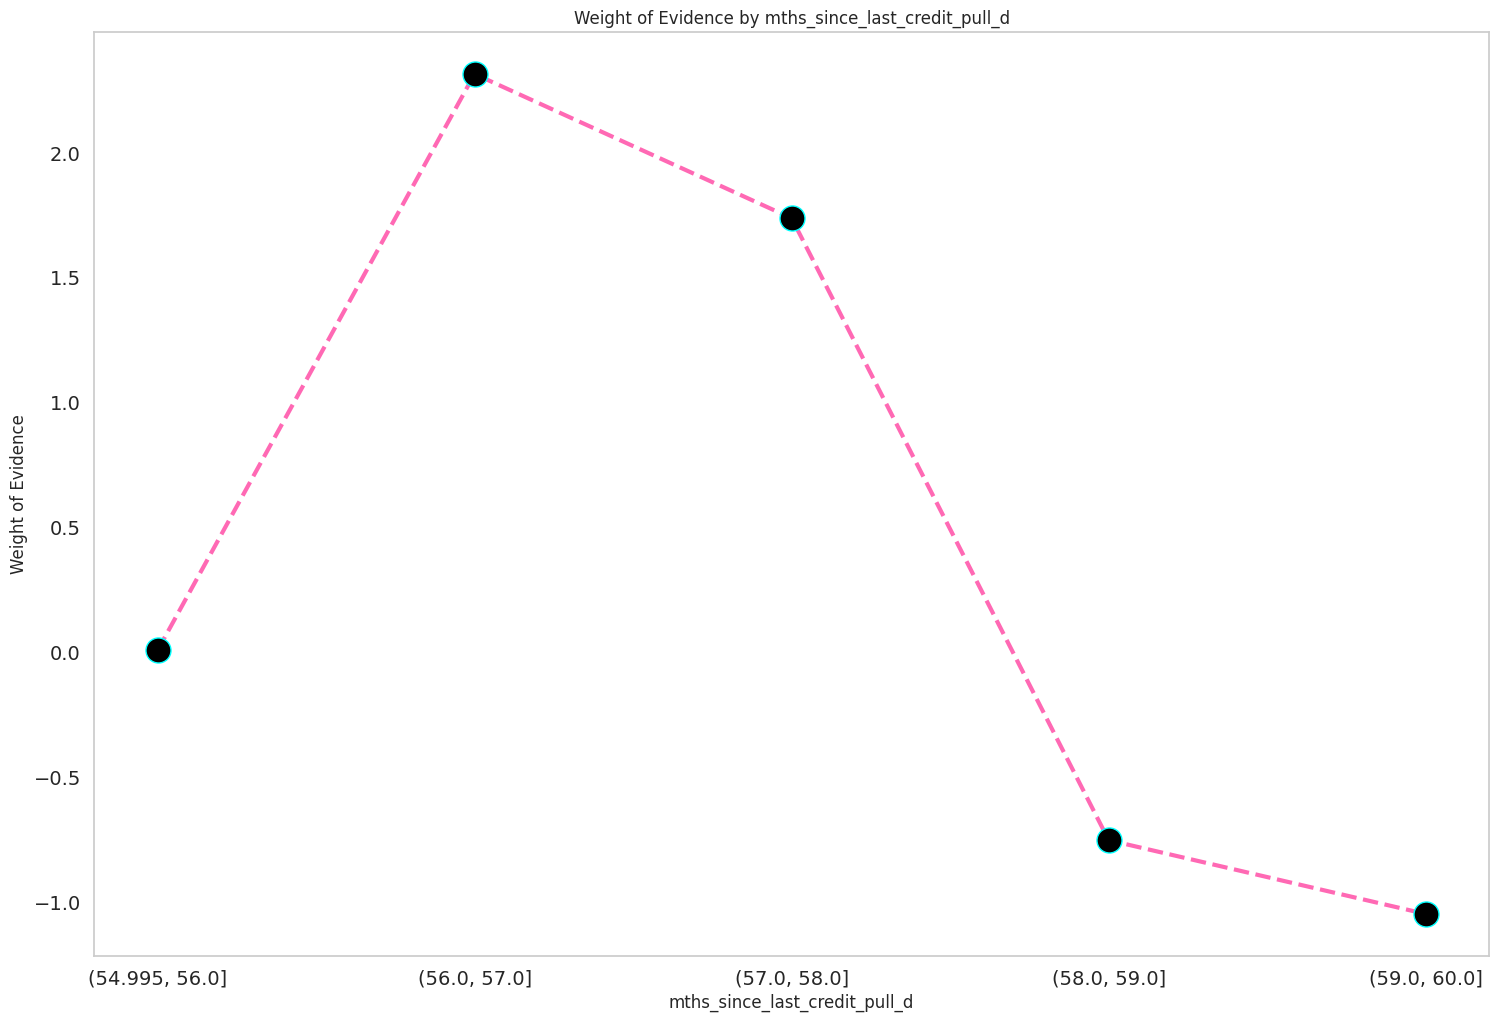

In [61]:
#Analyzing mths_since_credit_pull  below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# fine-classing
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# select only the relevant index in the target column
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
plot_by_woe(df_temp)

The following categories will be grouped together:
- 54-65,
- 65-76,
- greater than 76

**12. Analyzing out_prncp_factor variable**

"out_prncp_factor" denotes remaining outstanding principal for total amount funded

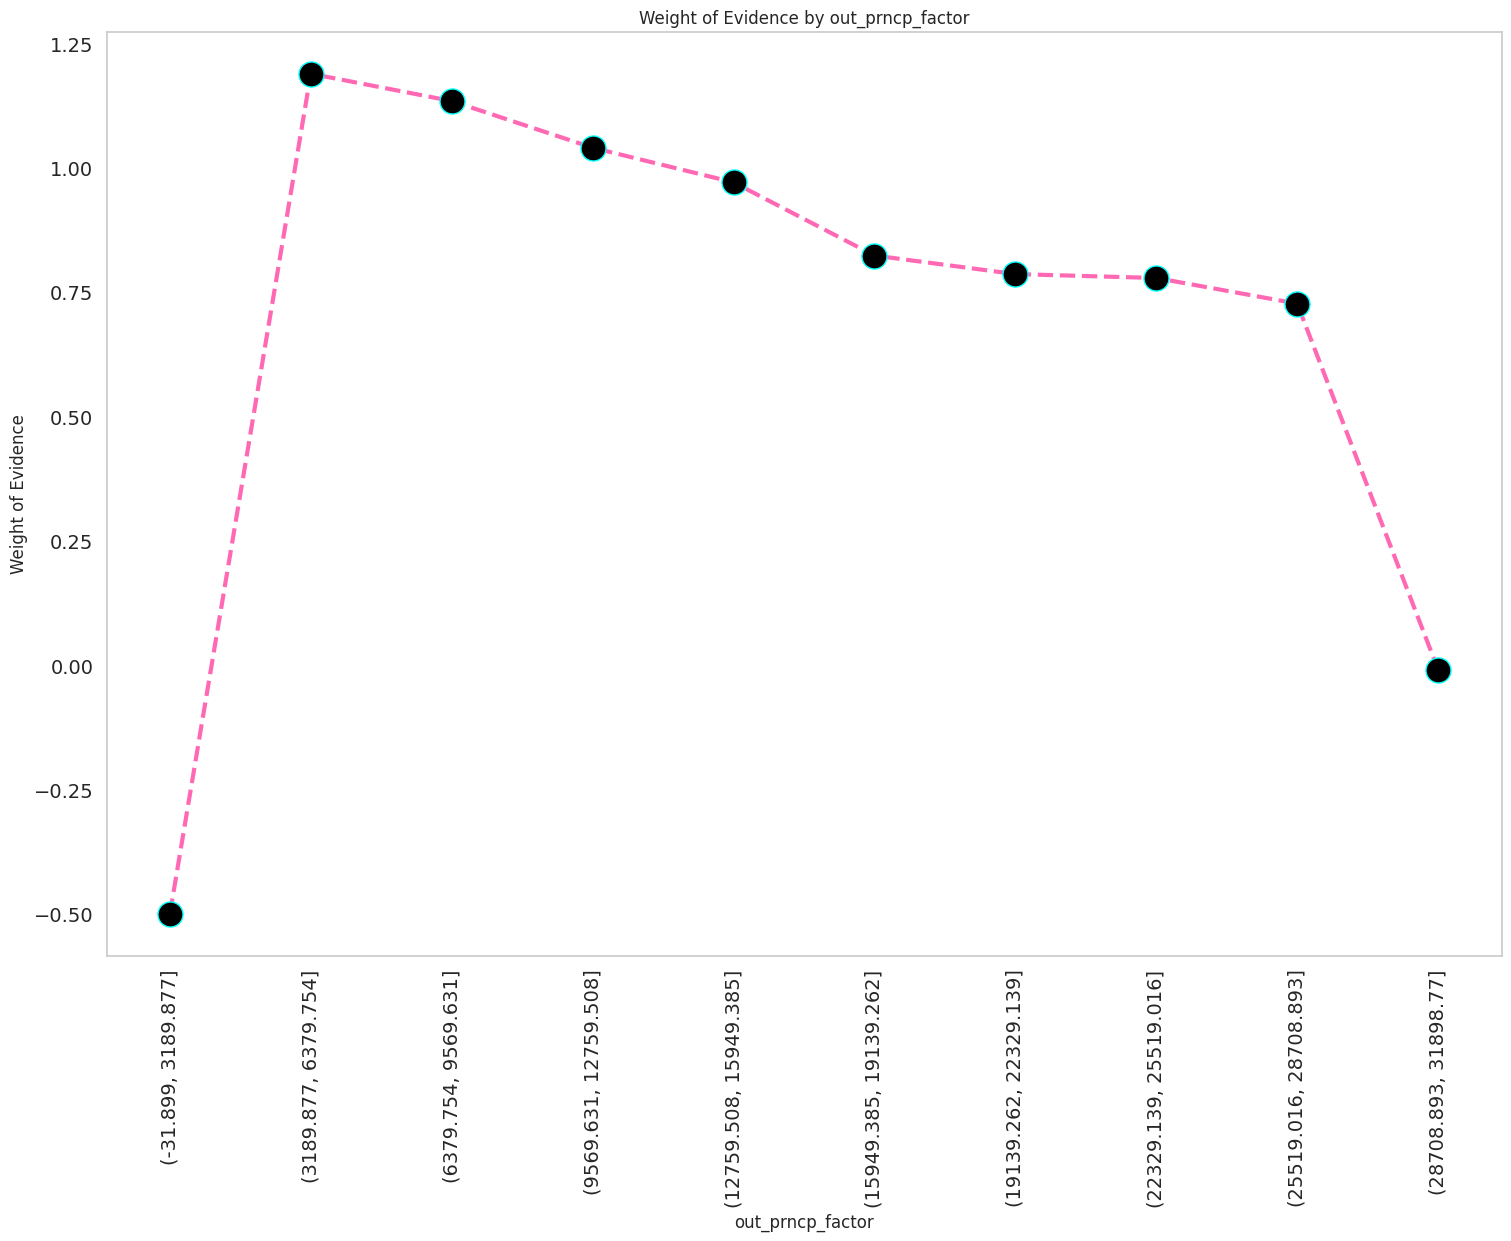

In [62]:
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
plot_by_woe(out_df, 90)

**13. Analyzing months_since_issue_date variable**

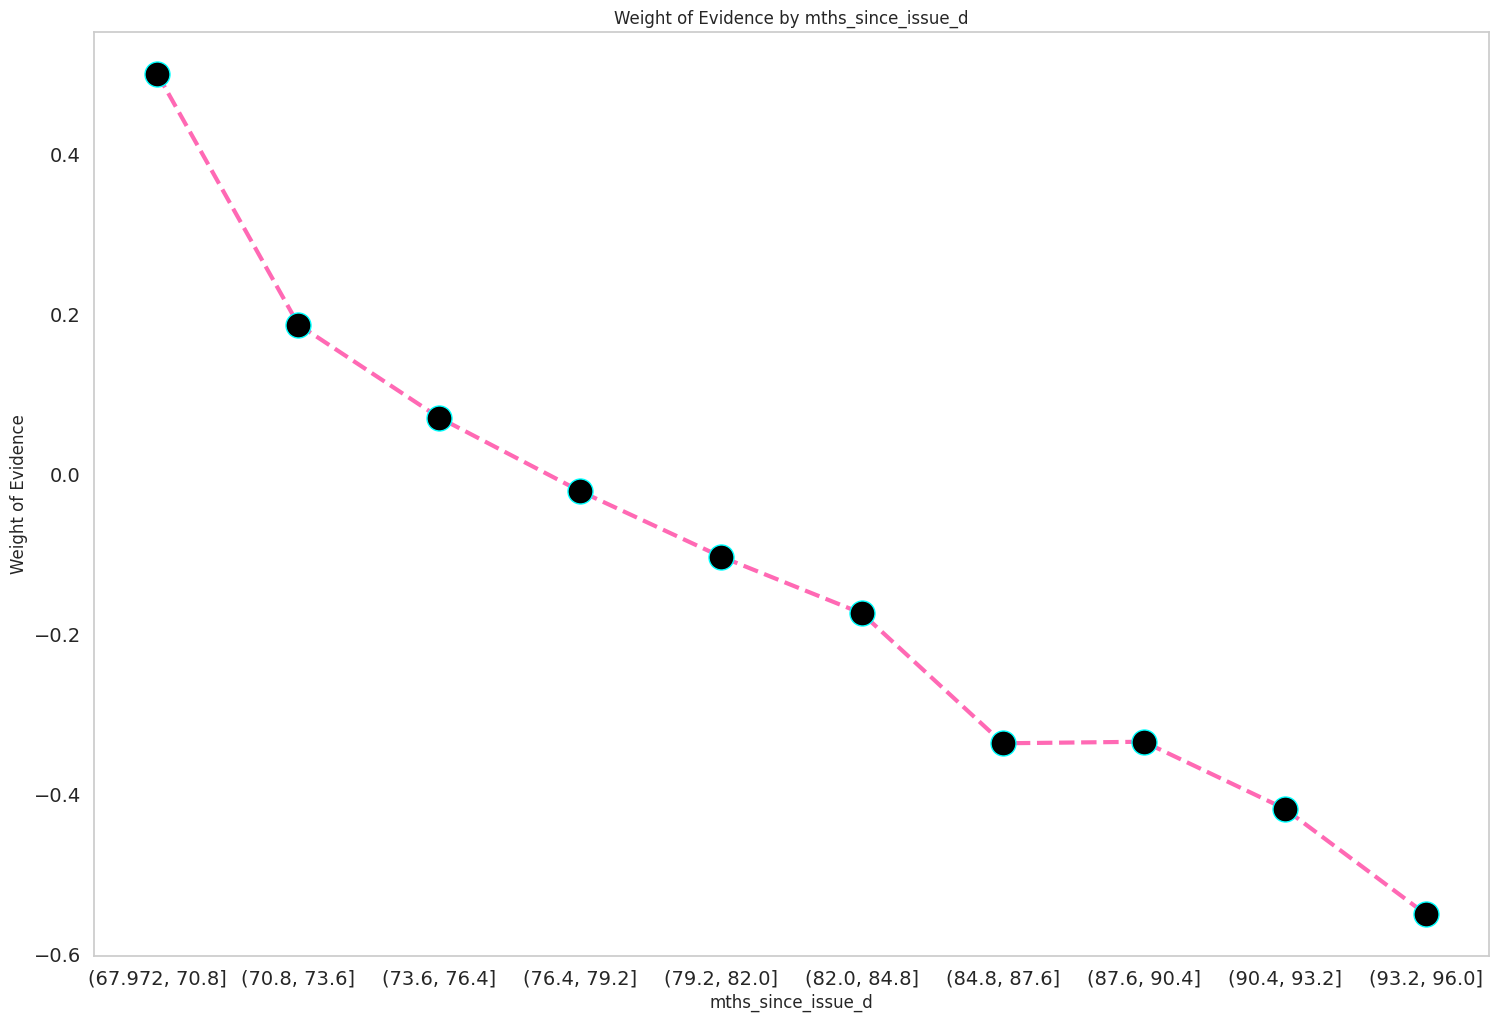

In [63]:
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
plot_by_woe(iss_df)

In [64]:
X.head()

term  int_rate grade home_ownership  annual_inc verification_status  \
42537    36      6.62     A       MORTGAGE    105000.0        Not Verified   
42538    36     13.53     B           RENT     40000.0     Source Verified   
42539    36      8.90     A       MORTGAGE     63000.0        Not Verified   
42541    36     12.85     B           RENT     88000.0        Not Verified   
42543    36      9.67     B       MORTGAGE    102000.0        Not Verified   

                  purpose addr_state    dti  inq_last_6mths  ...  \
42537  debt_consolidation         CT  14.05             1.0  ...   
42538  debt_consolidation         NM  16.94             0.0  ...   
42539  debt_consolidation         FL  16.51             0.0  ...   
42541  debt_consolidation         NC  10.02             0.0  ...   
42543  debt_consolidation         MA  15.55             0.0  ...   

        int_rate_factor  total_rec_int_factor  total_rev_hi_lim_factor  \
42537     (5.98, 8.006]      (1092.0, 2184.0]   (-9899.899, 100098.99]   
42538  (12.018, 14.024]      (1092.0, 2184.0]   (-9899.899, 100098.99]   
42539   (8.006, 10.012]      (1092.0, 2184.0]   (-9899.899, 100098.99]   
42541  (12.018, 14.024]      (2184.0, 3276.0]   (-9899.899, 100098.99]   
42543   (8.006, 10.012]      (1092.0, 2184.0]   (-9899.899, 100098.99]   

           total_pymnt_factor        dti_factor    annual_inc_factor  \
42537   (5640.912, 11246.134]  (11.997, 15.996]  (-3496.0, 153920.0]   
42538  (11246.134, 16851.356]  (15.996, 19.995]  (-3496.0, 153920.0]   
42539  (11246.134, 16851.356]  (15.996, 19.995]  (-3496.0, 153920.0]   
42541  (11246.134, 16851.356]   (7.998, 11.997]  (-3496.0, 153920.0]   
42543   (5640.912, 11246.134]  (11.997, 15.996]  (-3496.0, 153920.0]   

       inq_last_6mths_factor     tot_cur_bal_factor  \
42537          (-0.007, 1.0]  (-8000.078, 400003.9]   
42538          (-0.007, 1.0]  (-8000.078, 400003.9]   
42539          (-0.007, 1.0]  (-8000.078, 400003.9]   
42541          (-0.007, 1.0]  (-8000.078, 400003.9]   
42543          (-0.007, 1.0]  (-8000.078, 400003.9]   

       mths_since_last_credit_pull_d_factor      out_prncp_factor  
42537                         (54.96, 59.0]  (3189.877, 6379.754]  
42538                         (54.96, 59.0]   (-31.899, 3189.877]  
42539                         (54.96, 59.0]  (3189.877, 6379.754]  
42541                         (54.96, 59.0]  (3189.877, 6379.754]  
42543                         (54.96, 59.0]  (3189.877, 6379.754]  

[5 rows x 109 columns]

**13. Analyzing EAD variable**

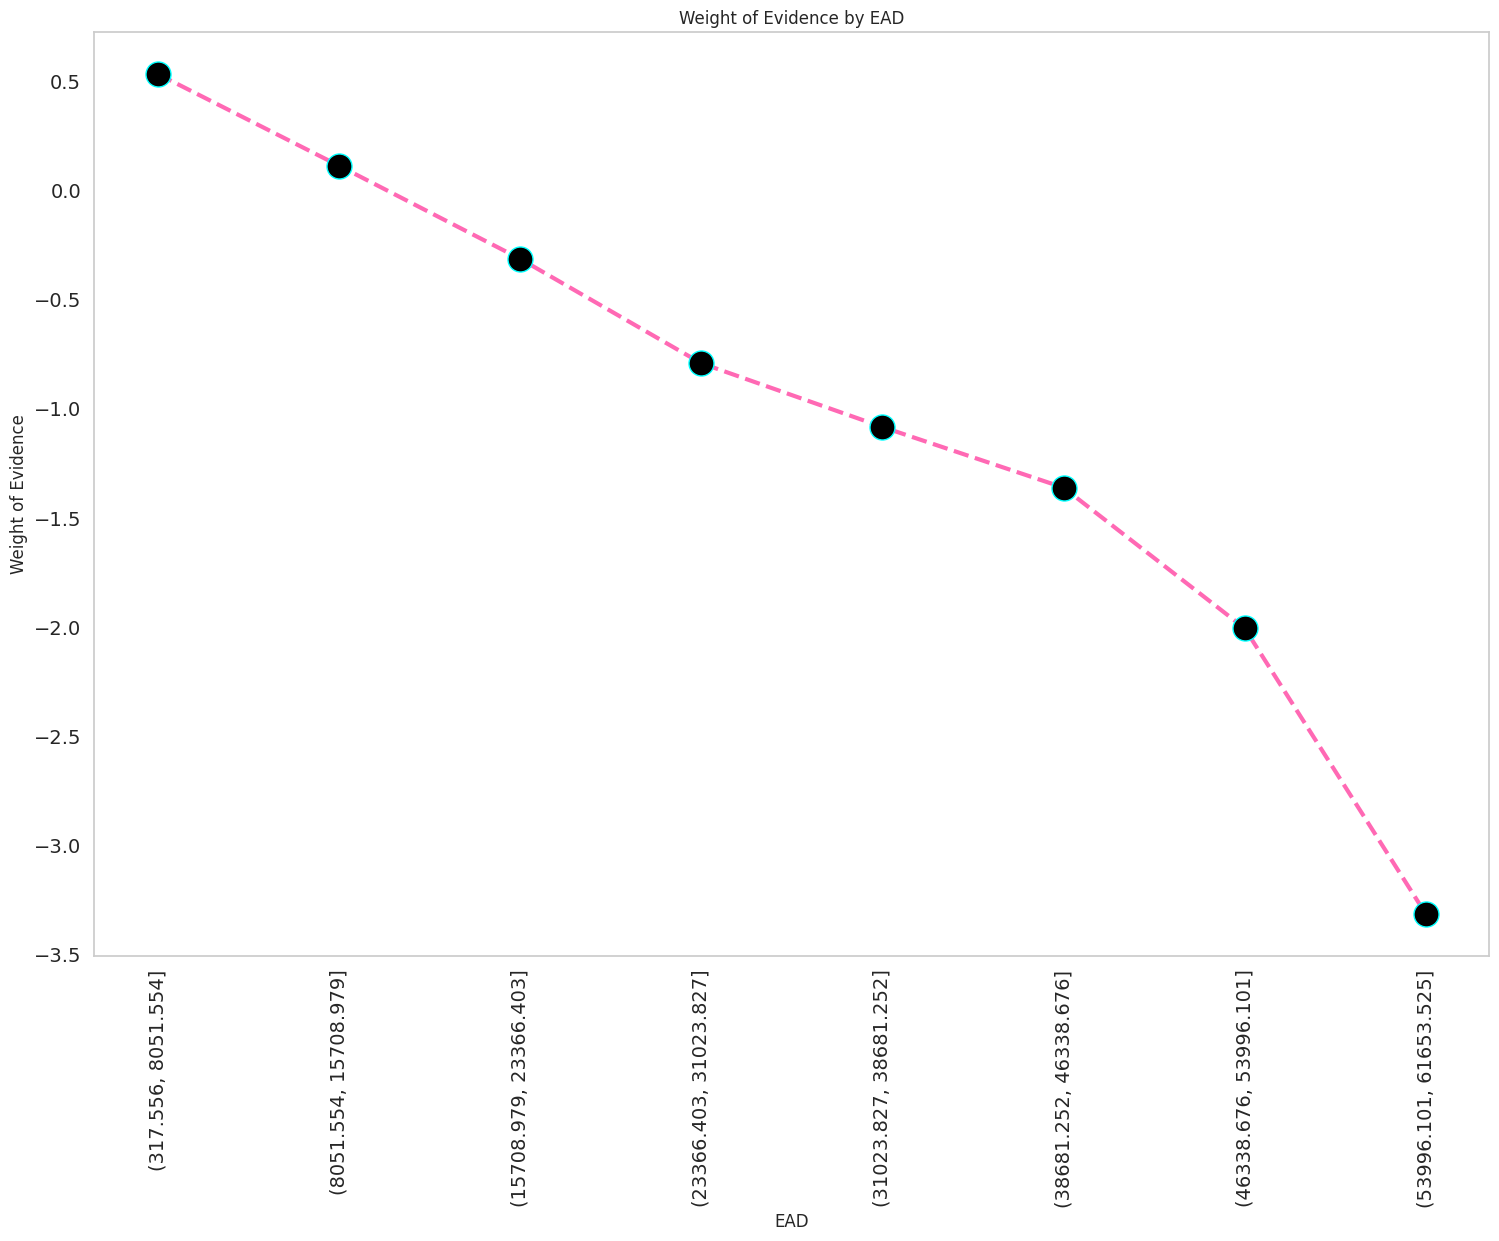

In [65]:
X['EAD'] = pd.cut(X['EAD'], 10)
iss_df = woe_continous(X, 'EAD', y)
plot_by_woe(iss_df, 90)

In [66]:
preprocess_data.loc[:, ]

term  int_rate grade home_ownership  annual_inc verification_status  \
42537     36      6.62     A       MORTGAGE    105000.0        Not Verified   
42538     36     13.53     B           RENT     40000.0     Source Verified   
42539     36      8.90     A       MORTGAGE     63000.0        Not Verified   
42541     36     12.85     B           RENT     88000.0        Not Verified   
42543     36      9.67     B       MORTGAGE    102000.0        Not Verified   
...      ...       ...   ...            ...         ...                 ...   
466277    36      7.90     A           RENT     90000.0            Verified   
466278    36     18.25     D           RENT     42000.0     Source Verified   
466282    60     16.99     D       MORTGAGE     46000.0            Verified   
466283    36      7.90     A            OWN     83000.0            Verified   
466284    36     19.20     D       MORTGAGE     46000.0            Verified   

                   purpose addr_state    dti  inq_last_6mths  ...  \
42537   debt_consolidation         CT  14.05             1.0  ...   
42538   debt_consolidation         NM  16.94             0.0  ...   
42539   debt_consolidation         FL  16.51             0.0  ...   
42541   debt_consolidation         NC  10.02             0.0  ...   
42543   debt_consolidation         MA  15.55             0.0  ...   
...                    ...        ...    ...             ...  ...   
466277  debt_consolidation         MD  10.33             0.0  ...   
466278            vacation         VA  11.57             0.0  ...   
466282  debt_consolidation         OH  25.65             2.0  ...   
466283         credit_card         CA   5.39             1.0  ...   
466284               other         CA  22.78             0.0  ...   

       addr_state:TX  addr_state:UT  addr_state:VA  addr_state:VT  \
42537              0              0              0              0   
42538              0              0              0              0   
42539              0              0              0              0   
42541              0              0              0              0   
42543              0              0              0              0   
...              ...            ...            ...            ...   
466277             0              0              0              0   
466278             0              0              1              0   
466282             0              0              0              0   
466283             0              0              0              0   
466284             0              0              0              0   

        addr_state:WA  addr_state:WI  addr_state:WV  addr_state:WY  \
42537               0              0              0              0   
42538               0              0              0              0   
42539               0              0              0              0   
42541               0              0              0              0   
42543               0              0              0              0   
...               ...            ...            ...            ...   
466277              0              0              0              0   
466278              0              0              0              0   
466282              0              0              0              0   
466283              0              0              0              0   
466284              0              0              0              0   

        initial_list_status:f  initial_list_status:w  
42537                       0                      1  
42538                       0                      1  
42539                       0                      1  
42541                       1                      0  
42543                       1                      0  
...                       ...                    ...  
466277                      1                      0  
466278                      1                      0  
466282                      1                      0  
466283    

# Creating New Features Based on WoE

In [67]:
# grade

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

# home_ownership

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'],
                                                    preprocess_data['home_ownership:NONE'],
                                                    preprocess_data['home_ownership:RENT'],
                                                    preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

#verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])
new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                             preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],
                                             preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                                                    preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                    preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
                                                   preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                                                   preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
#initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

#total_rec_int
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


#total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


#total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


#dti
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

#annual income
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

#inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

#tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

#mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

#mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)


new_df['EAD:<8051.554'] = np.where((preprocess_data['EAD']<=8051.554), 1,0)
new_df['EAD:8051.554-15708.979'] = np.where((preprocess_data['EAD']>8051.554)&(preprocess_data['EAD']<=15708.979), 1,0)
new_df['EAD:15708.979-23366.403'] = np.where((preprocess_data['EAD']>15708.979)&(preprocess_data['EAD']<=23366.403), 1,0)
new_df['EAD:23366.403-31023.827'] = np.where((preprocess_data['EAD']>23366.403)&(preprocess_data['EAD']<=31023.827), 1,0)
new_df['EAD:31023.827-38681.252'] = np.where((preprocess_data['EAD']>31023.827)&(preprocess_data['EAD']<=38681.252), 1,0)
new_df['EAD:38681.252-46338.676'] = np.where((preprocess_data['EAD']>38681.252)&(preprocess_data['EAD']<=46338.676), 1,0)
new_df['EAD:46338.676-53996.101'] = np.where((preprocess_data['EAD']>46338.676)&(preprocess_data['EAD']<=53996.101), 1,0)
new_df['EAD:>53996.101'] = np.where((preprocess_data['EAD']>53996.101), 1,0)

new_df['bad_loan'] = preprocess_data.loc[:, 'bad_loan']

In [68]:
#Displaying first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
42537        1        0        0        0        0        0        0   
42538        0        1        0        0        0        0        0   
42539        1        0        0        0        0        0        0   
42541        0        1        0        0        0        0        0   
42543        0        1        0        0        0        0        0   
42544        0        1        0        0        0        0        0   
42547        0        0        0        1        0        0        0   
42548        0        0        1        0        0        0        0   
42555        0        1        0        0        0        0        0   
42558        0        0        0        1        0        0        0   

       home_ownership:OWN  home_ownership:OTHER_NONE_RENT_ANY  \
42537                   0                                   0   
42538                   0                                   1   
42539                   0                                   0   
42541                   0                                   1   
42543                   0                                   0   
42544                   0                                   1   
42547                   0                                   0   
42548                   0                                   0   
42555                   0                                   1   
42558                   0                                   1   

       home_ownership:MORTGAGE  verification_status:NOT_VERIFIED  \
42537                        1                                 1   
42538                        0                                 0   
42539                        1                                 1   
42541                        0                                 1   
42543                        1                                 1   
42544                        0                                 0   
42547                        1                                 0   
42548                        1                                 1   
42555                        0                                 0   
42558                        0                                 1   

       verification_status:SOURCE_VERIFIED  verification_status:VERIFIED  \
42537                                    0                             0   
42538                                    1                             0   
42539                                    0                             0   
42541                                    0                             0   
42543                                    0                             0   
42544                                    0                             1   
42547                                    1                             0   
42548                                    0                             0   
42555                                    0                             1   
42558                                    0                             0   

       purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING  \
42537                                                  0            
42538                                                  0            
42539                                                  0            
42541                                                  0            
42543                                                  0            
42544                                                  0            
42547                                                  0            
42548                                                  0            
42555                                                  0            
42558                                                  0            

       purpose:OTHER_HOUSE_MEDICAL  purpose:WEDDING_VACATION  \
42537                            0                         0   
42538                   

In [69]:
new_df1 = new_df

Now we must remove 1 dummy variable for each original variable, otherwise we will get into the [dummy variable trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/). The dummy variables to be removed are those with the lowest WoE.

In [70]:
#dummy categories to drop
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                 'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
#col dropped
new_df.drop(columns=ref_categories, inplace=True, axis=1)

# Checking for Class Imbalance in the Fully Preprocessed Dataset

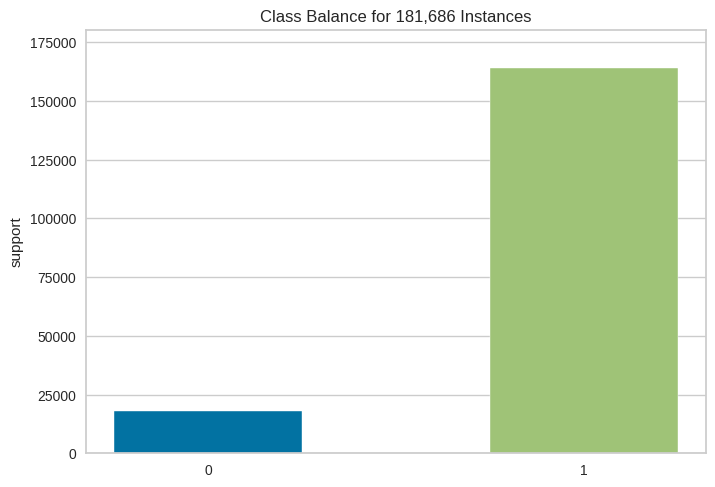

<Axes: title={'center': 'Class Balance for 181,686 Instances'}, ylabel='support'>

In [71]:
#check if class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='bad_loan', axis=1)
y = new_df['bad_loan']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

From the chart above, we see the individuals classified as bad borrowers have very few observations. This class imbalance can affect our model while training. To solve this problem, we will oversample the minority class.

# Splitting into Train and Test

In [72]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance for training dataset
y_train.value_counts()

1    131094
0     14254
Name: bad_loan, dtype: int64

# Oversampling Minority Class to Resolve Class Imbalance

In [73]:
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [74]:
#dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

1    131094
0    131094
Name: bad_loan, dtype: int64

# Building PD Models


##***1 - Logistic Regression***

In [75]:
#building logistic regression model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

LogisticRegression()

In [76]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.36      0.80      0.50      3570
           1       0.97      0.84      0.91     32768

    accuracy                           0.84     36338
   macro avg       0.67      0.82      0.70     36338
weighted avg       0.91      0.84      0.86     36338



In [77]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
392410                    1          0.943065           1
336827                    1          0.955011           1
386642                    1          0.418772           0
330499                    1          0.626696           1
384564                    0          0.756069           1

### Assessing Discriminatory Power of the PD Model (Logestic regression )

**1 A. ROC Curve**

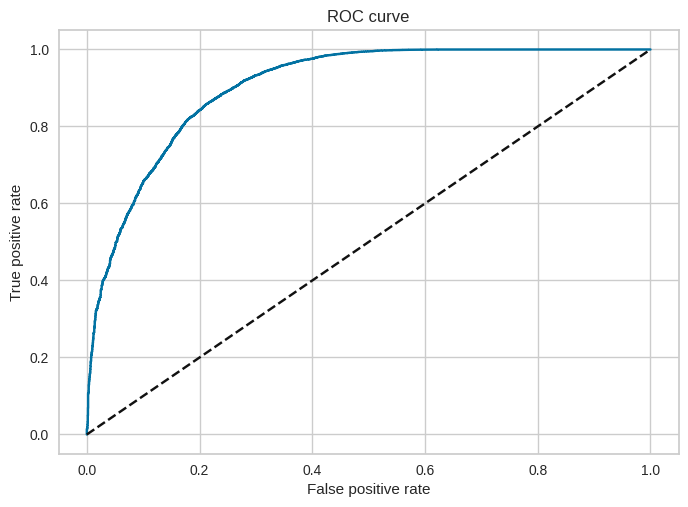

In [78]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

**1 B. Area under ROC Curve**

In [79]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.904786066648339

**2. Gini Index**

In [80]:
Gini = AUROC * 2 - 1
Gini

0.8095721332966781

**3A. Precision-Recall Curve**

If you want to know the details what is meant by **"No-Skill PR Curve"**, follow [this link](https://analyticsindiamag.com/complete-guide-to-understanding-precision-and-recall-curves/)

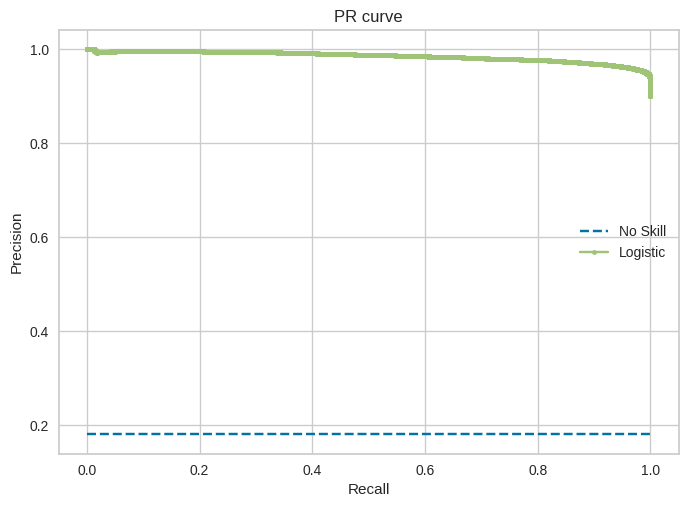

In [81]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

**3 B. Precision-Recall Score**

In [82]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.985723351872962

**4. Kolmogorov-Smirnov Statistic**

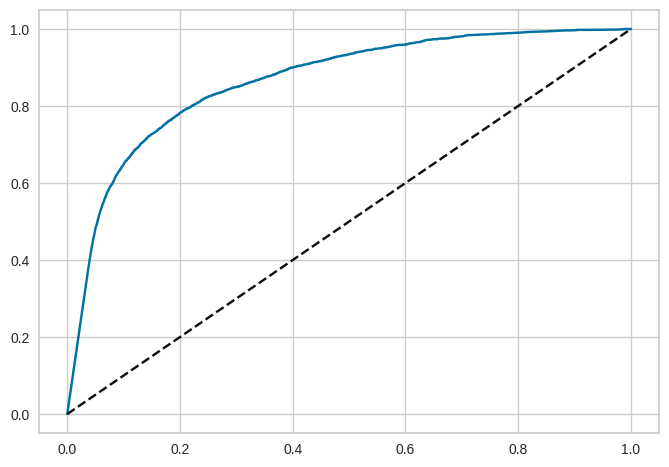

In [83]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

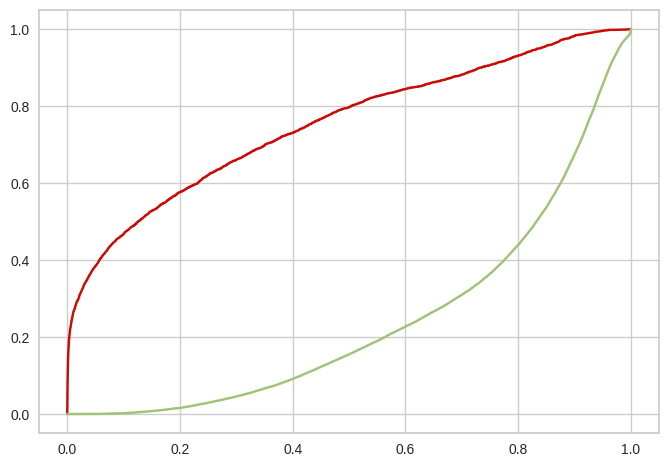

In [84]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [85]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.6462479107854079


##***2 - XG boost***

In [86]:
from xgboost import XGBClassifier
X_train_o.columns = [str(col).replace("[", "").replace("]", "").replace("<", "") for col in X_train_o.columns]
X_test.columns = [str(col).replace("[", "").replace("]", "").replace("<", "") for col in X_test.columns]
#building logistic regression model
model =   XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_train_o, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61      3570
           1       0.97      0.91      0.94     32768

    accuracy                           0.90     36338
   macro avg       0.74      0.85      0.77     36338
weighted avg       0.93      0.90      0.91     36338



In [88]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
392410                    1          0.917669           1
336827                    1          0.968053           1
386642                    1          0.944866           1
330499                    1          0.607964           1
384564                    0          0.522232           1

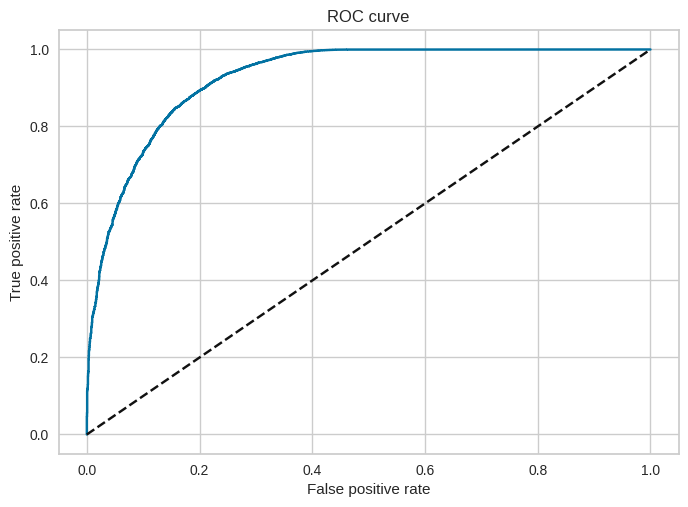

In [89]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [90]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.927538703469669

In [91]:
Gini = AUROC * 2 - 1
Gini

0.8550774069393381

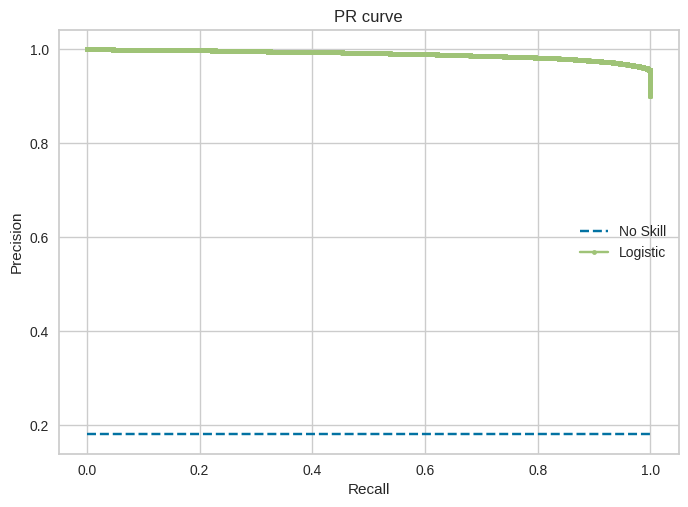

In [92]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [93]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9896228520994567

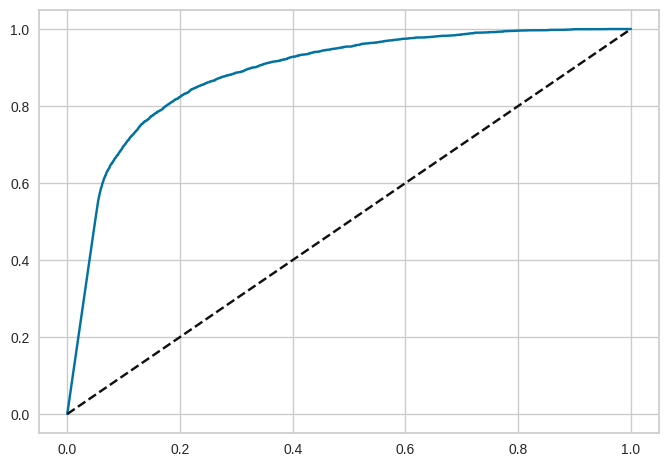

In [94]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

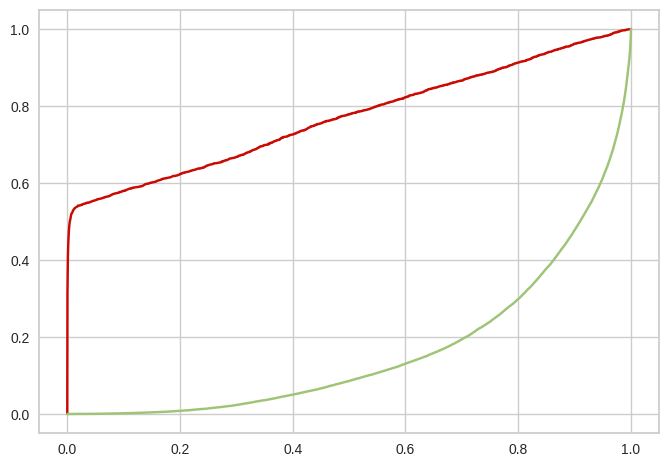

In [95]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [96]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.6940007399444152


##***3 - Extra trees classifier***

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
#building logistic regression model
model = ExtraTreesClassifier()
model.fit(X_train_o, y_train_o)

ExtraTreesClassifier()

In [98]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.57      0.72      3570
           1       0.96      1.00      0.98     32768

    accuracy                           0.96     36338
   macro avg       0.95      0.78      0.85     36338
weighted avg       0.96      0.96      0.95     36338



In [99]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
392410                    1              1.00           1
336827                    1              0.99           1
386642                    1              0.97           1
330499                    1              0.96           1
384564                    0              0.84           1

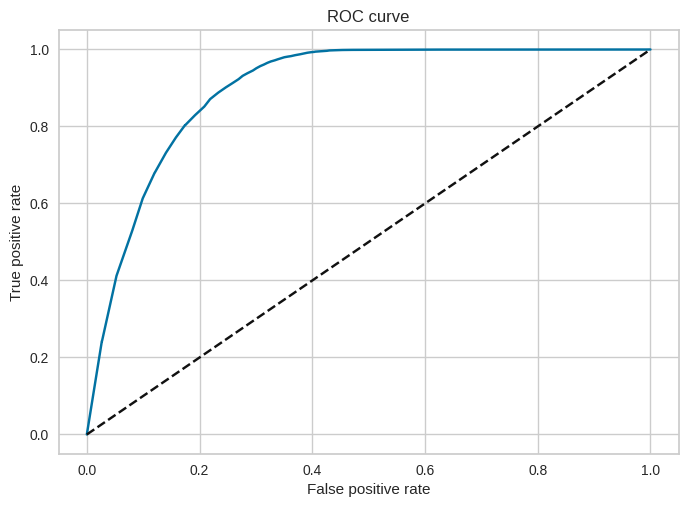

In [100]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [101]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.898021939488686

In [102]:
Gini = AUROC * 2 - 1
Gini

0.796043878977372

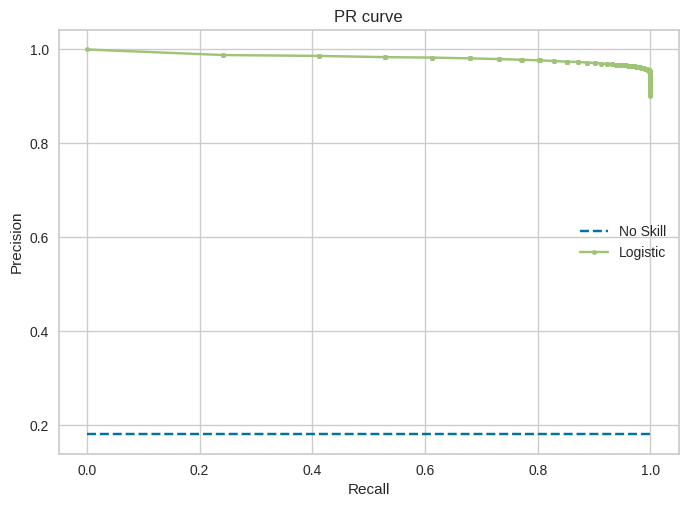

In [103]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [104]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9834845234225809

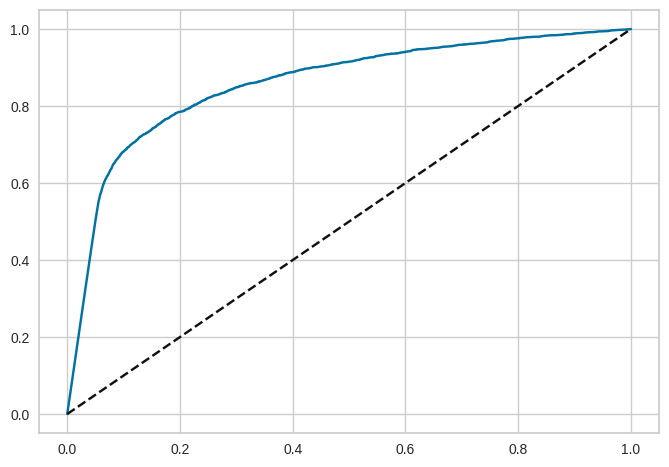

In [105]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

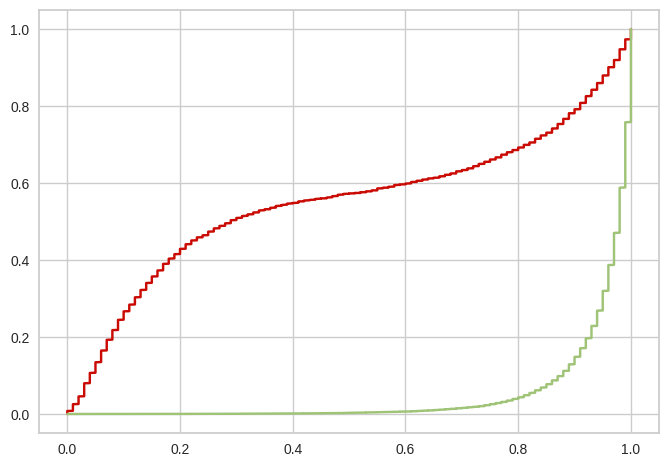

In [106]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [107]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.6565428832665879


##***4 - Random forest***

In [108]:
from sklearn.ensemble import RandomForestClassifier
#building logistic regression model
model = RandomForestClassifier()
model.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [109]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      3570
           1       0.96      0.99      0.98     32768

    accuracy                           0.95     36338
   macro avg       0.93      0.79      0.85     36338
weighted avg       0.95      0.95      0.95     36338



In [110]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
392410                    1              0.97           1
336827                    1              0.97           1
386642                    1              0.96           1
330499                    1              0.94           1
384564                    0              0.80           1

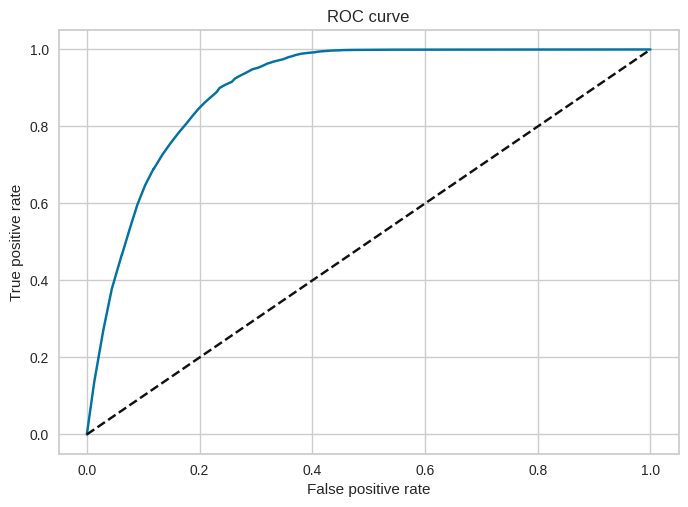

In [111]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [112]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.9008838942070969

In [113]:
Gini = AUROC * 2 - 1
Gini

0.8017677884141938

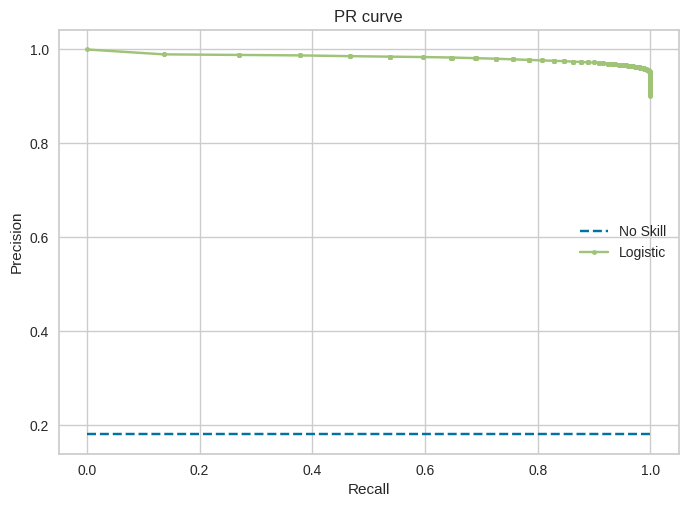

In [114]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [115]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9835264806365686

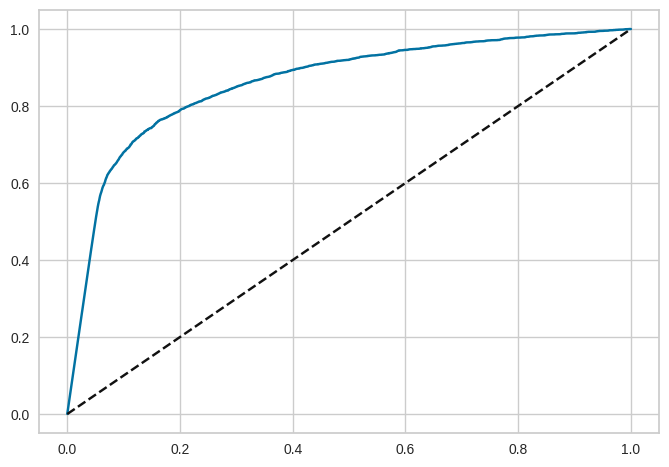

In [116]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

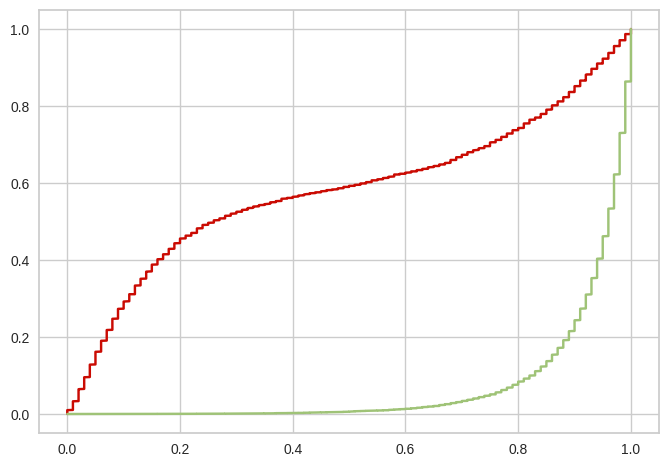

In [117]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [118]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.665061578830751


##***5 - Catboost***

In [119]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [120]:
from catboost import CatBoostClassifier
#building logistic regression model
model = CatBoostClassifier()
model.fit(X_train_o, y_train_o)

Learning rate set to 0.111092
0:	learn: 0.5852939	total: 128ms	remaining: 2m 7s
1:	learn: 0.5238428	total: 188ms	remaining: 1m 33s
2:	learn: 0.4985885	total: 246ms	remaining: 1m 21s
3:	learn: 0.4842627	total: 305ms	remaining: 1m 15s
4:	learn: 0.4768524	total: 367ms	remaining: 1m 12s
5:	learn: 0.4604672	total: 428ms	remaining: 1m 10s
6:	learn: 0.4526337	total: 490ms	remaining: 1m 9s
7:	learn: 0.4342438	total: 613ms	remaining: 1m 16s
8:	learn: 0.4259582	total: 733ms	remaining: 1m 20s
9:	learn: 0.4178300	total: 851ms	remaining: 1m 24s
10:	learn: 0.4112790	total: 971ms	remaining: 1m 27s
11:	learn: 0.4084709	total: 1.02s	remaining: 1m 24s
12:	learn: 0.4048013	total: 1.11s	remaining: 1m 24s
13:	learn: 0.4013998	total: 1.17s	remaining: 1m 22s
14:	learn: 0.3988196	total: 1.22s	remaining: 1m 20s
15:	learn: 0.3970108	total: 1.28s	remaining: 1m 18s
16:	learn: 0.3926254	total: 1.34s	remaining: 1m 17s
17:	learn: 0.3890276	total: 1.4s	remaining: 1m 16s
18:	learn: 0.3873666	total: 1.47s	remaining: 1m

In [121]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.52      0.77      0.62      3570
           1       0.97      0.92      0.95     32768

    accuracy                           0.91     36338
   macro avg       0.75      0.85      0.78     36338
weighted avg       0.93      0.91      0.92     36338



In [122]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
392410                    1          0.892693           1
336827                    1          0.959082           1
386642                    1          0.942527           1
330499                    1          0.677472           1
384564                    0          0.622738           1

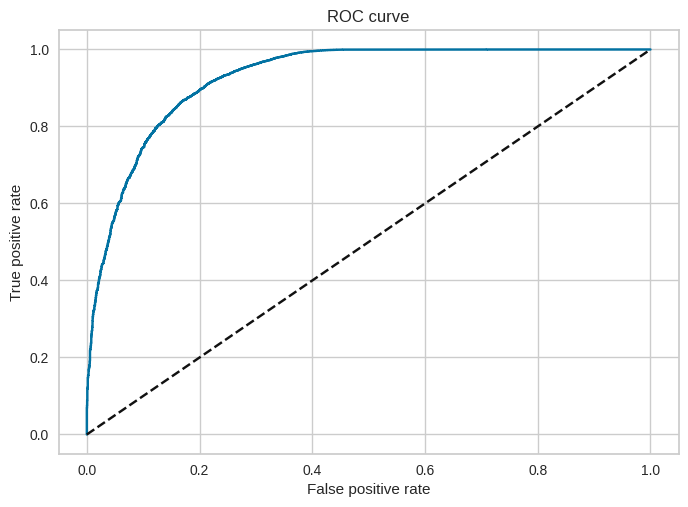

In [123]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [124]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.9276342012635133

In [125]:
Gini = AUROC * 2 - 1
Gini

0.8552684025270265

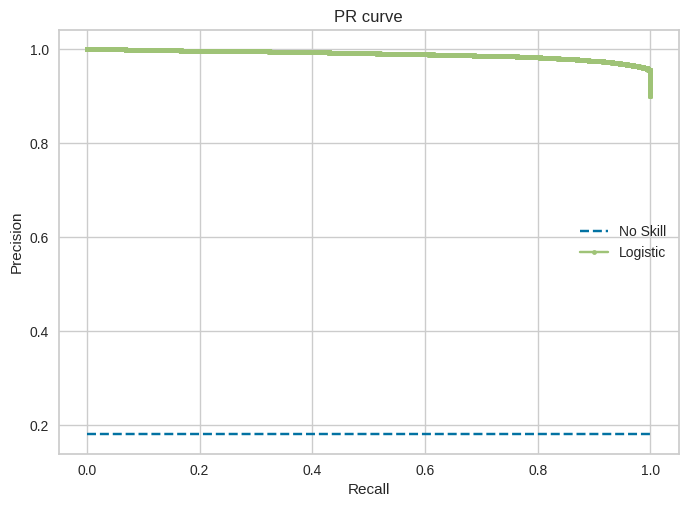

In [126]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [127]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9895427645604423

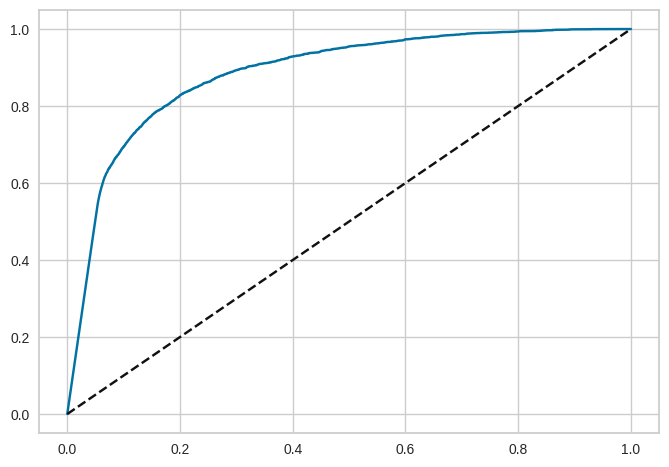

In [128]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

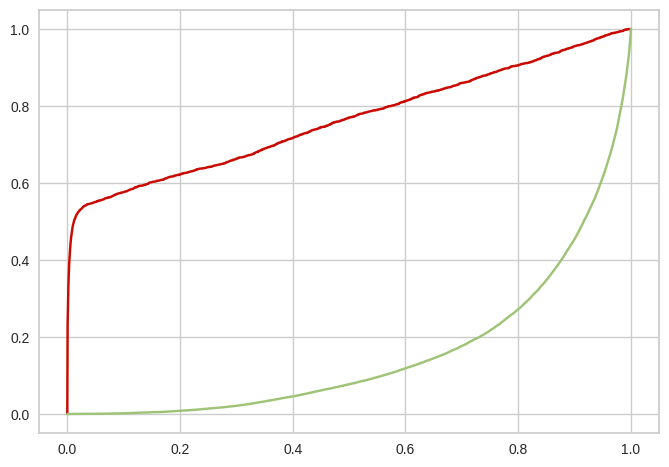

In [129]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [130]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.6965905624945291


#**dep**


###data prep func

In [131]:
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                ]

categorical_dummies = pd.concat(data_dummies1, axis=1)
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)




def data_prep(df):
  df['EAD'] = df['loan_amnt'] + df['total_rec_int'] + df['total_rec_late_fee'] + df['recoveries'] + df['collection_recovery_fee'] - df['out_prncp']
  #dropping irrelevant cols & cols with missing values

  columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
  df.drop(columns=columns_to_drop, inplace=True, axis=1)

  df.dropna(inplace=True)
  df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)
  emp_length_convert(df, 'emp_length')
  term_numeric(df, 'term')
  date_columns(df, 'issue_d')
  date_columns(df, 'last_pymnt_d')
  date_columns(df, 'last_credit_pull_d')
  date_columns(df, 'earliest_cr_line')
  #drop columns with low IV
  df.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq',
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)
  df = pd.concat([df, categorical_dummies], axis=1)
  preprocess_data=df
  # grade

  new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

  # home_ownership

  new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
  new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'],
                                                      preprocess_data['home_ownership:NONE'],
                                                      preprocess_data['home_ownership:RENT'],
                                                      preprocess_data['home_ownership:ANY']])
  new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

  #verification status
  new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
  new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
  new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

  # purpose of loan
  new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])
  new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
  new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
  new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
  new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


  # addr state
  new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                              preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],
                                              preprocess_data['addr_state:AL']])
  new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
  new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                                                      preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                      preprocess_data['addr_state:VA']])
  new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
  new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
  preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

  new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
                                                    preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                                                    preprocess_data['addr_state:IN']])

  new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
  new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
  new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
  new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
  new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
  new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                            preprocess_data['addr_state:MS']])
  new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                            preprocess_data['addr_state:DC']])
  #initial_list_status
  new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
  new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

  # term
  new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
  new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

  #total_rec_int
  new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
  new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
  new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
  new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


  #total_revol_hi_lim
  new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
  new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
  new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
  new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
  new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
  new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
  new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


  #total_pymnt
  new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
  new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
  new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
  new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
  new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
  #int_Rate

  new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
  new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
  new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
  new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
  new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
  new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
  new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
  new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
  new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


  #dti
  new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
  new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
  new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
  new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
  new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
  new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
  new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
  new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

  #annual income
  new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
  new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
  new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
  new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
  new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
  new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
  new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
  new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
  new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
  new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

  #inq_last_6mths
  new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
  new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
  new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
  new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

  #tot_cur_balance
  new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
  new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
  new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
  new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
  new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
  new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
  new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
  new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
  new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

  #mths_since_last_credit_pull_d
  new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
  new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
  new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

  #mths_since_issue_d_factor
  new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
  new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
  new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
  new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
  new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
  new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
  new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
  new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

  new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
  new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
  new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
  new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
  new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)


  new_df['EAD:<8051.554'] = np.where((preprocess_data['EAD']<=8051.554), 1,0)
  new_df['EAD:8051.554-15708.979'] = np.where((preprocess_data['EAD']>8051.554)&(preprocess_data['EAD']<=15708.979), 1,0)
  new_df['EAD:15708.979-23366.403'] = np.where((preprocess_data['EAD']>15708.979)&(preprocess_data['EAD']<=23366.403), 1,0)
  new_df['EAD:23366.403-31023.827'] = np.where((preprocess_data['EAD']>23366.403)&(preprocess_data['EAD']<=31023.827), 1,0)
  new_df['EAD:31023.827-38681.252'] = np.where((preprocess_data['EAD']>31023.827)&(preprocess_data['EAD']<=38681.252), 1,0)
  new_df['EAD:38681.252-46338.676'] = np.where((preprocess_data['EAD']>38681.252)&(preprocess_data['EAD']<=46338.676), 1,0)
  new_df['EAD:46338.676-53996.101'] = np.where((preprocess_data['EAD']>46338.676)&(preprocess_data['EAD']<=53996.101), 1,0)
  new_df['EAD:>53996.101'] = np.where((preprocess_data['EAD']>53996.101), 1,0)
  #dummy categories to drop
  ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                  'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                  'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
  #col dropped
  new_df.drop(columns=ref_categories, inplace=True, axis=1)

  return new_df

In [132]:
y_pred_test = model.predict_proba(X_test.iloc[[599]] )
print(y_pred_test[0][0])

0.010464172920244263


In [133]:
b=X_test.iloc[[599]]


In [134]:
b.iloc[[0]]

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
346504        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
346504                   0                        0   

        verification_status:NOT_VERIFIED  verification_status:SOURCE_VERIFIED  \
346504                                 1                                    0   

        purpose:OTHER_HOUSE_MEDICAL  purpose:WEDDING_VACATION  \
346504                            1                         0   

        purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE  purpose:CAR_CREDIT_CARD  \
346504                                        0                        0   

        addr_state:NY  addr_state:LA_NM_OK_NC_MO_MD_NJ_VA  addr_state:CA  \
346504              0                                   0              1   

        addr_state:AZ_MI_UT_TN_AR_PA  addr_state:RI_OH_KY_DE_MN_SD_MA_IN  \
346504                             0                                   0   

        addr_state:GA_WA  addr_state:WI_OR  addr_state:TX  \
346504                 0                 0              0   

        addr_state:IL_CT_MT  addr_state:CO_SC  addr_state:KS_VT_AK_NS  \
346504                    0                 0                       0   

        addr_state:NH_WV_WY_DC  initial_list_status:W  term:36  \
346504                       0                      1        1   

        total_rec_int:1000-2000  total_rec_int:2000-9000  total_rec_int:>9000  \
346504                        0                        0                    0   

        total_rev_hi_lim:10000-20000  total_rev_hi_lim:20000-40000  \
346504                             1                             0   

        total_rev_hi_lim:40000-60000  total_rev_hi_lim:60000-80000  \
346504                             0                             0   

        total_rev_hi_lim:80000-100000  total_rev_hi_lim:100000  \
346504                              0                        0   

        total_pymnt:5000-11000  total_pymnt:11000-16000  \
346504                       0                        1   

        total_pymnt:16000-22000  total_pymnt:>22000  int_rate:7.484  \
346504                        0                   0               0   

        int_rate:7.484-9.548  int_rate:9.548-11.612  int_rate:11.612-13.676  \
346504                     0                      1                       0   

        int_rate:13.676-15.74  int_rate:15.74-17.804  int_rate:17.804-19.868  \
346504                      0                      0                       0   

        int_rate:7.19.868-21.932  dti:4  dti:4-8  dti:8-12  dti:12-16  \
346504                         0      1        0         0          0   

        dti:16-20  dti:20-23  dti:23-27  annual_inc:32000-50000  \
346504          0          0          0                       0   

        annual_inc:50000-60000  annual_inc:60000-75000  \
346504                       1                       0   

        annual_inc:75000-90000  annual_inc:90000-120000  \
346504                       0                        0   

        annual_inc:120000-135000  annual_inc:135000-150000  \
346504                         0                         0   

        annual_inc:>150000  inq_last_6mths:1  inq_last_6mths:1-2  \
346504                   0                 0                   0   

        inq_last_6mths:2-4  tot_cur_bal:40000-80000  tot_cur_bal:80000-120000  \
346504                   1                        0                         0   

        tot_cur_bal:120000-160000  tot_cur_bal:160000-200000  \
346504                          0                          0   

        tot_cur_bal:200000-240000  tot_cur_bal:240000-320000  \
346504                          0                          0   

        tot_cur_bal:320000-400000  tot_cur_bal:>400000  \
346504                          0                    0   

        mths_since_last_credit_pull_d:65  mths_since_last_credit_pull_d:65-76  \
346504                                 1             

In [135]:
#data_prep(data.iloc[[11294]]).iloc[[1]] #42537

In [136]:
#PD=model.predict_proba(data_prep(data.iloc[[1]]).iloc[[0]])
#print( f'{PD[0][0]*100:.3f}%')

In [137]:
#data['PD'] = data.apply(lambda row: model.predict_proba(data_prep(pd.DataFrame(row).T))[0][0], axis=1)


In [138]:
#data['PD'].max()

In [139]:
#data

In [140]:
data = pd.read_csv(r'/content/drive/MyDrive/data/loan_data_2007_2014.csv')

In [141]:
#test=data_prep_dep(data)

In [142]:
#test.shape

In [143]:
#test

In [144]:
pip install flask

In [145]:
pip install pyngrok

In [146]:
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
def data_prep_deploy(df):
  df['EAD'] = df['loan_amnt'] + df['total_rec_int'] + df['total_rec_late_fee'] + df['recoveries'] + df['collection_recovery_fee'] - df['out_prncp']
  #dropping irrelevant cols & cols with missing values
  columns_to_drop = ['recoveries', 'collection_recovery_fee',  'total_rec_late_fee','loan_amnt',]
  df.drop(columns=columns_to_drop, inplace=True, axis=1)
  emp_length_convert(df, 'emp_length')
  term_numeric(df, 'term')
  date_columns(df, 'issue_d')
  date_columns(df, 'last_pymnt_d')
  date_columns(df, 'last_credit_pull_d')
  date_columns(df, 'earliest_cr_line')
  #drop columns with low IV
  df.drop(columns=[  'mths_since_last_pymnt_d', 'emp_length'], axis=1, inplace=True)
  grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

  for grade_value in grades:
      df[f'grade:{grade_value}'] = (df['grade'] == grade_value).astype(int)

  df1=df.loc[:, 'grade:A':'grade:G']
  df1['home_ownership:OWN'] = (df['home_ownership'] == 'OWN').astype(int)
  df1['home_ownership:OTHER_NONE_RENT_ANY'] = (df['home_ownership'].isin(['OTHER', 'NONE', 'ANY', 'RENT'])).astype(int)
  df1['home_ownership:MORTGAGE'] = (df['home_ownership'] == 'MORTGAGE').astype(int)
  df1['verification_status:NOT_VERIFIED'] = (df['verification_status'] == 'Not Verified').astype(int)
  df1['verification_status:SOURCE_VERIFIED'] = (df['verification_status'] == 'Source Verified').astype(int)
  df1['verification_status:VERIFIED'] = (df['verification_status'] == 'Verified').astype(int)
  df1['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = (df['purpose'].isin(['small_business', 'renewable_energy', 'moving'])).astype(int)
  df1['purpose:OTHER_HOUSE_MEDICAL'] = (df['purpose'].isin(['other', 'house', 'medical'])).astype(int)
  df1['purpose:WEDDING_VACATION'] = (df['purpose'].isin(['wedding', 'vacation'])).astype(int)
  df1['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = (df['purpose'].isin(['home_improvement', 'major_purchase'])).astype(int)
  df1['purpose:CAR_CREDIT_CARD'] = (df['purpose'].isin(['car', 'credit_card'])).astype(int)
  df1['addr_state:NE_IA_NV_HI_FL_AL'] = (df['addr_state'].isin(['IA', 'NV', 'HI', 'FL', 'AL'])).astype(int)
  df1['addr_state:NY'] = (df['addr_state'] == 'NY').astype(int)
  df1['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = (df['addr_state'].isin(['LA', 'NM', 'OK', 'NC', 'MO', 'MD', 'NJ', 'VA'])).astype(int)
  df1['addr_state:CA'] = (df['addr_state'] == 'CA').astype(int)
  df1['addr_state:AZ_MI_UT_TN_AR_PA'] = (df['addr_state'].isin(['AZ', 'MI', 'UT', 'TN', 'AR', 'PA'])).astype(int)
  df1['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] = (df['addr_state'].isin(['RI', 'OH', 'KY', 'DE', 'MN', 'SD', 'MA', 'IN'])).astype(int)
  df1['addr_state:GA_WA'] = (df['addr_state'].isin(['GA', 'WA'])).astype(int)
  df1['addr_state:WI_OR'] = (df['addr_state'].isin(['WI', 'OR'])).astype(int)
  df1['addr_state:TX'] = (df['addr_state'] == 'TX').astype(int)
  df1['addr_state:IL_CT_MT'] = (df['addr_state'].isin(['IL', 'CT', 'MT'])).astype(int)
  df1['addr_state:CO_SC'] = (df['addr_state'].isin(['CO', 'SC'])).astype(int)
  df1['addr_state:KS_VT_AK_NS'] = (df['addr_state'].isin(['KS', 'VT', 'AK', 'NS'])).astype(int)
  df1['addr_state:NH_WV_WY_DC'] = (df['addr_state'].isin(['NH', 'WV', 'WY', 'DC'])).astype(int)
  df1['initial_list_status:F'] = (df['initial_list_status'] == 'f').astype(int)
  df1['initial_list_status:W'] = (df['initial_list_status'] == 'w').astype(int)
  df1['term:36'] = (df['term'] == 36).astype(int)
  df1['term:60'] = (df['term'] == 60).astype(int)
  df1['total_rec_int:<1000'] = (df['total_rec_int'] <= 1000).astype(int)
  df1['total_rec_int:1000-2000'] = ((df['total_rec_int'] > 1000) & (df['total_rec_int'] <= 2000)).astype(int)
  df1['total_rec_int:2000-9000'] = ((df['total_rec_int'] > 2000) & (df['total_rec_int'] <= 9000)).astype(int)
  df1['total_rec_int:>9000'] = (df['total_rec_int'] > 9000).astype(int)
  df1['total_rev_hi_lim:<10000'] = (df['total_rev_hi_lim'] <= 10000).astype(int)
  df1['total_rev_hi_lim:10000-20000'] = ((df['total_rev_hi_lim'] > 10000) & (df['total_rev_hi_lim'] <= 20000)).astype(int)
  df1['total_rev_hi_lim:20000-40000'] = ((df['total_rev_hi_lim'] > 20000) & (df['total_rev_hi_lim'] <= 40000)).astype(int)
  df1['total_rev_hi_lim:40000-60000'] = ((df['total_rev_hi_lim'] > 40000) & (df['total_rev_hi_lim'] <= 60000)).astype(int)
  df1['total_rev_hi_lim:60000-80000'] = ((df['total_rev_hi_lim'] > 60000) & (df['total_rev_hi_lim'] <= 80000)).astype(int)
  df1['total_rev_hi_lim:80000-100000'] = ((df['total_rev_hi_lim'] > 80000) & (df['total_rev_hi_lim'] <= 100000)).astype(int)
  df1['total_rev_hi_lim:100000'] = (df['total_rev_hi_lim'] > 100000).astype(int)
  df1['total_pymnt:<5000'] = (df['total_pymnt'] <= 5000).astype(int)
  df1['total_pymnt:5000-11000'] = ((df['total_pymnt'] > 5000) & (df['total_pymnt'] <= 11000)).astype(int)
  df1['total_pymnt:11000-16000'] = ((df['total_pymnt'] > 11000) & (df['total_pymnt'] <= 16000)).astype(int)
  df1['total_pymnt:16000-22000'] = ((df['total_pymnt'] > 16000) & (df['total_pymnt'] <= 22000)).astype(int)
  df1['total_pymnt:>22000'] = (df['total_pymnt'] > 22000).astype(int)
  df1['int_rate:7.484'] = (df['int_rate'] <= 7.484).astype(int)
  df1['int_rate:7.484-9.548'] = ((df['int_rate'] > 7.484) & (df['int_rate'] <= 9.548)).astype(int)
  df1['int_rate:9.548-11.612'] = ((df['int_rate'] > 9.548) & (df['int_rate'] <= 11.612)).astype(int)
  df1['int_rate:11.612-13.676'] = ((df['int_rate'] > 11.612) & (df['int_rate'] <= 13.676)).astype(int)
  df1['int_rate:13.676-15.74'] = ((df['int_rate'] > 13.676) & (df['int_rate'] <= 15.74)).astype(int)
  df1['int_rate:15.74-17.804'] = ((df['int_rate'] > 15.74) & (df['int_rate'] <= 17.804)).astype(int)
  df1['int_rate:17.804-19.868'] = ((df['int_rate'] > 17.804) & (df['int_rate'] <= 19.868)).astype(int)
  df1['int_rate:7.19.868-21.932'] = ((df['int_rate'] > 19.868) & (df['int_rate'] <= 21.932)).astype(int)
  df1['int_rate:21.932-26.06'] = ((df['int_rate'] > 21.932) & (df['int_rate'] <= 26.06)).astype(int)
  df1['dti:4'] = (df['dti'] <= 4).astype(int)
  df1['dti:4-8'] = ((df['dti'] > 4) & (df['dti'] <= 8)).astype(int)
  df1['dti:8-12'] = ((df['dti'] > 8) & (df['dti'] <= 12)).astype(int)
  df1['dti:12-16'] = ((df['dti'] > 12) & (df['dti'] <= 16)).astype(int)
  df1['dti:16-20'] = ((df['dti'] > 16) & (df['dti'] <= 20)).astype(int)
  df1['dti:20-23'] = ((df['dti'] > 20) & (df['dti'] <= 23)).astype(int)
  df1['dti:23-27'] = ((df['dti'] > 23) & (df['dti'] <= 27)).astype(int)
  df1['dti:27-40'] = ((df['dti'] > 27) & (df['dti'] <= 40)).astype(int)
  df1['annual_inc:32000'] = (df['annual_inc'] <= 32000).astype(int)
  df1['annual_inc:32000-50000'] = ((df['annual_inc'] > 32000) & (df['annual_inc'] <= 50000)).astype(int)
  df1['annual_inc:50000-60000'] = ((df['annual_inc'] > 50000) & (df['annual_inc'] <= 60000)).astype(int)
  df1['annual_inc:60000-75000'] = ((df['annual_inc'] > 60000) & (df['annual_inc'] <= 75000)).astype(int)
  df1['annual_inc:75000-90000'] = ((df['annual_inc'] > 75000) & (df['annual_inc'] <= 90000)).astype(int)
  df1['annual_inc:90000-120000'] = ((df['annual_inc'] > 90000) & (df['annual_inc'] <= 120000)).astype(int)
  df1['annual_inc:120000-135000'] = ((df['annual_inc'] > 120000) & (df['annual_inc'] <= 135000)).astype(int)
  df1['annual_inc:135000-150000'] = ((df['annual_inc'] > 135000) & (df['annual_inc'] <= 150000)).astype(int)
  df1['annual_inc:>150000'] = (df['annual_inc'] > 150000).astype(int)
  df1['inq_last_6mths:1'] = (df['inq_last_6mths'] <= 1).astype(int)
  df1['inq_last_6mths:1-2'] = ((df['inq_last_6mths'] > 1) & (df['inq_last_6mths'] <= 2)).astype(int)
  df1['inq_last_6mths:2-4'] = ((df['inq_last_6mths'] > 2) & (df['inq_last_6mths'] <= 4)).astype(int)
  df1['inq_last_6mths:4-7'] = ((df['inq_last_6mths'] > 4) & (df['inq_last_6mths'] <= 7)).astype(int)
  df1['tot_cur_bal:<40000'] = (df['tot_cur_bal'] <= 40000).astype(int)
  df1['tot_cur_bal:40000-80000'] = ((df['tot_cur_bal'] > 40000) & (df['tot_cur_bal'] <= 80000)).astype(int)
  df1['tot_cur_bal:80000-120000'] = ((df['tot_cur_bal'] > 80000) & (df['tot_cur_bal'] <= 120000)).astype(int)
  df1['tot_cur_bal:120000-160000'] = ((df['tot_cur_bal'] > 120000) & (df['tot_cur_bal'] <= 160000)).astype(int)
  df1['tot_cur_bal:160000-200000'] = ((df['tot_cur_bal'] > 160000) & (df['tot_cur_bal'] <= 200000)).astype(int)
  df1['tot_cur_bal:200000-240000'] = ((df['tot_cur_bal'] > 200000) & (df['tot_cur_bal'] <= 240000)).astype(int)
  df1['tot_cur_bal:240000-320000'] = ((df['tot_cur_bal'] > 240000) & (df['tot_cur_bal'] <= 320000)).astype(int)
  df1['tot_cur_bal:320000-400000'] = ((df['tot_cur_bal'] > 320000) & (df['tot_cur_bal'] <= 400000)).astype(int)
  df1['tot_cur_bal:>400000'] = (df['tot_cur_bal'] > 400000).astype(int)
  df1['mths_since_last_credit_pull_d:65'] = (df['mths_since_last_credit_pull_d'] <= 65).astype(int)
  df1['mths_since_last_credit_pull_d:65-76'] = ((df['mths_since_last_credit_pull_d'] > 65) & (df['mths_since_last_credit_pull_d'] <= 76)).astype(int)
  df1['mths_since_last_credit_pull_d:76'] = (df['mths_since_last_credit_pull_d'] > 76).astype(int)
  df1['mths_since_issue_d_:70.8'] = (df['mths_since_issue_d'] <= 70.8).astype(int)
  df1['mths_since_issue_d_:>70.8-73.6'] = ((df['mths_since_issue_d'] > 70.8) & (df['mths_since_issue_d'] <= 73.6)).astype(int)
  df1['mths_since_issue_d_:73.6-76.4'] = ((df['mths_since_issue_d'] > 73.6) & (df['mths_since_issue_d'] <= 76.4)).astype(int)
  df1['mths_since_issue_d_:>76.4-79.2'] = ((df['mths_since_issue_d'] > 76.4) & (df['mths_since_issue_d'] <= 79.2)).astype(int)
  df1['mths_since_issue_d_:>79.2-82'] = ((df['mths_since_issue_d'] > 79.2) & (df['mths_since_issue_d'] <= 82)).astype(int)
  df1['mths_since_issue_d_>82-84'] = ((df['mths_since_issue_d'] > 82) & (df['mths_since_issue_d'] <= 84)).astype(int)
  df1['mths_since_issue_d_:>84-90.4'] = ((df['mths_since_issue_d'] > 84) & (df['mths_since_issue_d'] <= 90.4)).astype(int)
  df1['mths_since_issue_d_:>90.4-96'] = ((df['mths_since_issue_d'] > 90.4) & (df['mths_since_issue_d'] <= 96)).astype(int)
  df1['out_prncp:3000'] = (df['out_prncp'] <= 3000).astype(int)
  df1['out_prncp:3000-6000'] = ((df['out_prncp'] > 3000) & (df['out_prncp'] <= 6000)).astype(int)
  df1['out_prncp:6000-10000'] = ((df['out_prncp'] > 6000) & (df['out_prncp'] <= 10000)).astype(int)
  df1['out_prncp:10000-12000'] = ((df['out_prncp'] > 10000) & (df['out_prncp'] <= 12000)).astype(int)
  df1['out_prncp:>12000'] = (df['out_prncp'] > 12000).astype(int)
  df1['EAD:8051.554'] = (df['EAD'] <= 8051.554).astype(int)
  df1['EAD:8051.554-15708.979'] = ((df['EAD'] > 8051.554) & (df['EAD'] <= 15708.979)).astype(int)
  df1['EAD:15708.979-23366.403'] = ((df['EAD'] > 15708.979) & (df['EAD'] <= 23366.403)).astype(int)
  df1['EAD:23366.403-31023.827'] = ((df['EAD'] > 23366.403) & (df['EAD'] <= 31023.827)).astype(int)
  df1['EAD:31023.827-38681.252'] = ((df['EAD'] > 31023.827) & (df['EAD'] <= 38681.252)).astype(int)
  df1['EAD:38681.252-46338.676'] = ((df['EAD'] > 38681.252) & (df['EAD'] <= 46338.676)).astype(int)
  df1['EAD:46338.676-53996.101'] = ((df['EAD'] > 46338.676) & (df['EAD'] <= 53996.101)).astype(int)
  df1['EAD:>53996.101'] = (df['EAD'] > 53996.101).astype(int)
  ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                  'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                  'annual_inc:32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:76', 'out_prncp:>12000']
  #col dropped
  df1.drop(columns=ref_categories, inplace=True, axis=1)







  return df1

In [150]:
from flask import Flask, render_template, request
from pyngrok import ngrok
from flask import url_for
app = Flask(__name__)
public_url =  ngrok.connect(5000).public_url
@app.route('/')
def index():
    mapdata = url_for('static', filename='mapdata.js')
    usmap = url_for('static', filename='usmap.js')
    select = url_for('static', filename='select.js')
    return render_template('index.html',mapdata=mapdata,select=select,usmap=usmap)  # Replace 'index.html' with the path to your HTML file

@app.route('/submit_form', methods=['POST'])
def submit_form():
    if request.method == 'POST':

        data = {
            'term': [request.form['term']],
            'loan_amnt': [float(request.form['loan_amnt'])],
            'emp_length': [request.form['emp_length']],
            'total_rec_late_fee': [float(request.form['total_rec_late_fee'])],
            'recoveries': [float(request.form['recoveries'])],
            'collection_recovery_fee': [float(request.form['collection_recovery_fee'])],
            'int_rate': [float(request.form['int_rate'])],
            'grade': [request.form['grade']],
            'home_ownership': [request.form['home_ownership']],
            'annual_inc': [float(request.form['annual_inc'])],
            'verification_status': [request.form['verification_status']],
            'issue_d': [request.form['issue_d']],
            'purpose': [request.form['purpose']],
            'addr_state': [request.form['addr_state']],
            'dti': [float(request.form['dti'])],
            'earliest_cr_line': [request.form['earliest_cr_line']],
            'inq_last_6mths': [float(request.form['inq_last_6mths'])],
            'initial_list_status': [request.form['initial_list_status']],
            'out_prncp': [float(request.form['out_prncp'])],
            'total_pymnt': [float(request.form['total_pymnt'])],
            'total_rec_int': [float(request.form['total_rec_int'])],
            'last_pymnt_d': [request.form['last_pymnt_d']],
            'last_credit_pull_d': [request.form['last_credit_pull_d']],
            'tot_cur_bal': [float(request.form['tot_cur_bal'])],
            'total_rev_hi_lim': [float(request.form['total_rev_hi_lim'])]
        }

        df = pd.DataFrame(data)
        # Fetch other form field values similarly
        test=data_prep_deploy(df)
        # Process the data (perform computations, machine learning predictions, etc.)
        # You can call your model or perform any operations here
        print(test.shape)
        PD=model.predict_proba(test)[0][0]
        EAD=float(request.form['loan_amnt']) + float(request.form['total_rec_int'])+ float(request.form['total_rec_late_fee']) + float(request.form['recoveries']) + float(request.form['collection_recovery_fee']) -float(request.form['out_prncp'])
        ECL= PD * EAD
        # Return the processed result as a response
        return render_template('index2.html', PD=PD, EAD=EAD, ECL=ECL)   # Modify this as needed

    return "Form submission failed"

if __name__ == '__main__':
  print(f"To acces the Gloable link please click {public_url}")
  app.run(debug=False)


To acces the Gloable link please click https://b01c-35-237-136-26.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:19] "GET /static/select.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:19] "GET /static/mapdata.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:19] "GET /static/usmap.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:20] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 13:59:21] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 14:00:53] "POST /submit_form HTTP/1.1" 200 -


(1, 96)


INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 14:00:53] "GET /submit_form HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 14:00:54] "GET /submit_form HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2023 14:00:54] "GET /submit_form HTTP/1.1" 405 -
